In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files
import string
import xml.etree.ElementTree as et

# VEST MO 2016
---

## VEST Documentation

### Election Results

#### Sources
Election results from the Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-mo/tree/master/2016).
#### Processing Part 1
Absentee,provisional, and mail ballots were reported countywide in nearly every county; these were distributed by candidate to precincts based on their share of the precinct-level reported vote.
#### Processing Part 2 (unclear whether this is for election results, shapefiles, or both)
Precinct mergers were made in the following counties to match county reporting units: Andrew, Audrain, Barry, Benton, Bollinger, Boone, Callaway, Camden, Cape Girardeau, Carroll, Carter, Cass, Christian, Clark, Cole, Cooper, Crawford, Dallas, Dekalb, Douglas, Dunklin, Franklin, Gentry, Greene, Grundy, Howard, Howell, Jackson, Jasper, Jefferson, Johnson, Linn, Livingston, Marion, Mercer, Mississippi, Moniteau, Morgan, New Madrid, Nodaway, Oregon, Osage, Pemiscot, Pettis, Phelps, Platte, Polk, Putnam, Ralls, Randolph, Ray, Ripley, St. Clair, St. Louis, Schuyler, Shannon, Shelby, Stone, Sullivan, Warren, Wayne, Webster, Worth.


### Shapefiles

#### Sources
1. Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.
2. Monroe County comes from the 2010 Census VTD release.
3. Platte County comes from the 2020 Census VTD release.
4. The following counties instead used maps or shapefiles sourced from the respective county governments: Audrain, Bates, Caldwell, Callaway, Camden, Cape Girardeau, Cedar, Cooper, Franklin, Greene, Jackson, Jasper, Jefferson, Laclede, Lafayette, Lawrence, Marion, McDonald, Miller, Nodaway, Osage, Ozark, Pemiscot, Pike, Randolph, Scott, Ste. Genevieve, Texas, Warren, Washington, Worth, Wright.
#### Processing Part 1 (unclear whether this is for election results, shapefiles, or both)
Precinct mergers were made in the following counties to match county reporting units: Andrew, Audrain, Barry, Benton, Bollinger, Boone, Callaway, Camden, Cape Girardeau, Carroll, Carter, Cass, Christian, Clark, Cole, Cooper, Crawford, Dallas, Dekalb, Douglas, Dunklin, Franklin, Gentry, Greene, Grundy, Howard, Howell, Jackson, Jasper, Jefferson, Johnson, Linn, Livingston, Marion, Mercer, Mississippi, Moniteau, Morgan, New Madrid, Nodaway, Oregon, Osage, Pemiscot, Pettis, Phelps, Platte, Polk, Putnam, Ralls, Randolph, Ray, Ripley, St. Clair, St. Louis, Schuyler, Shannon, Shelby, Stone, Sullivan, Warren, Wayne, Webster, Worth.
#### Processing Part 2 (unclear whether this is for election results, shapefiles, or both)
Additional modifications to reflect how election results were reported in 2016:

- **Audrain:** Add Vandalia City; Align Mexico precincts with municipal code  
- **Barry:** Add Monett City; Align Cassville with corporate boundary  
- **Barton:** Adjust Lamar ward boundaries to match city map  
- **Bollinger:** Adjust Patton/Sedgewickville to match county GIS  
- **Butler:** Align Poplar Bluff with corporate boundary and adjust wards to match city map  
- **Callaway:** Align Fulton, Holts Summit precincts with 2016 corporate boundaries  
- **Carroll:** Adjust Carrollton City wards to match voter file  
- **Cass:** Align Belton, Pleasant Hill, Raymore precincts with corporate boundaries; Adjust 37 Pleasant Prairie/25 West Peculiar Rural  
- **Chariton:** Adjust Salisbury ward boundaries to match city map  
- **Christian:** Revise Cassidy 1/Cassidy 2; Reverse Nixa City annexations into Rosedale 1A/1B, Union Chapel 1  
- **Clay:** Adjust Excelsior Springs, Kearney, Smithville precincts to match 2016 ward and corporate boundaries; Adjust KC 21-1/15, 21-1/17, 21-3/11, 21-4/6, 21-4/11, 21-5/7/24, 21-6/24, 21-7/20, 21-13/26, 21-14/23, 21-17/16, 21-17/26, 21-17/Platte 1, Gallatin 7/16, 10/13, 10/16, 11/15, 13/15, Kearney 3/Platte 2, Liberty 1/10, 6/13, 7/11, 11/14, Washington 1/3 to match voter file   
- **Clinton:** Align Atchison/Concord, Jackson/Lathrop with 2016 precinct split assignments  
- **Cole:** Adjust Marion Twp St Martins to include St Martins city in Jefferson Twp  
- **Crawford:** Move Benton Twp section of Leasburg precinct from Recklein to Leasburg  
- **Dade:** Realign Greenfield wards to match municipal code  
- **Dallas:** Split North Benton Inside/OCL; Align N/S Benton with Buffalo ward map  
- **Dent:** Split Boss precinct from R-4 precinct; Adjust R-2/R-3 boundary  
- **Dunklin:** Align Holcomb, Rives with township boundaries; Adjust Arbyrd/Senath; Align Kennett wards with city map  
- **Franklin:** Split Dry Branch between Stanton & St. Clair Out of Town  
- **Gasconade:** Align Hermann, Owensville, Rosebud with corporate boundaries and ward descriptions  
- **Howard:** Split Old Franklin & New Franklin  
- **Howell:** Align West Plains precincts with 2016 corporate boundary  
- **Iron:** Adjust Annapolis/Des Arc/Vulcan, Ironton/Pilot Knob  
- **Jasper:** Realign Carthage 2/3, Joplin 1/7, 10/13, 10/15, 13/22, Oronogo 1/2, Webb City 1/4 to match city ward maps  
- **Jefferson:** Split Festus Ward 4 P1/P2; Adjust Crystal City/Riverview  
- **Johnson:** Adjust Warrensburg NE/NW boundary to match county maps  
- **Lewis:** Split LaBelle Twp between LaBelle FS/Lewistown FS with PLSS grid  
- **Lincoln:** Align Moscow Mills, Troy with 2016 corporate boundaries; Adjust Briscoe/Troy Rural  
- **Linn:** Split Brookfield Township between Brookfield 1&2/3&4  
- **Livingston:** Align Chillicothe with 2016 corporate boundaries  
- **Macon:** Align Macon City wards with corporate boundaries  
- **Madison:** Align Fredericktown wards with corporate boundaries  
- **Marion:** Split Fabius-Smileyville/Taylor, Warren-Monroe City/Warren; Align Hannibal wards with voter file  
- **Miller:** Adjust all precinct boundaries to match voter file  
- **Mississippi:** Adjust Bertrand/East Prairie Rural; Align East Prairie City with corporate boundary  
- **Montgomery:** Align Bellflower/Middletown, Big Spring/Rhineland with voter file  
- **Morgan:** Adjust Versaille North/South boundary to match county GIS  
- **New Madrid:** Add New Madrid City wards; Add Big Prairie 4 precinct; Move Portageville Ward 1 to Portage 1  
- **Newton:** Align Staples precincts with Joplin City GIS boundaries; Align Neosho precincts with Neosho City GIS boundaries; Adjust Newtonia/Ritchey Wentworth  
- **Pettis:** Adjust Sedalia City wards to match city map  
- **Phelps:** Align St. James ward boundaries with city map
- **Pike:** Adjust Cuivre JL boundaries with Ashley NO, Buffalo E, Prairieville I
- **Platte:** Align Lake Waukomis, Parkville, Platte City, Riverside/Northmore, Weatherby Lake with corporate boundaries; Adjust Platte Hills/Park Hill, Seven Bridges/Shiloh
- **Polk:** Split Campbell/Jefferson precincts by school district
- **Pulaski:** Adjust Big Piney/St. Roberts, Laquey/Waynesville
- **Putnam:** Split Union Twp into NE/SW precincts to match county map
- **Ralls:** Replace Center/Liberty precincts with 2010 VTDs
- **Ray:** Adjust Richmond City wards, Homestead Village/Wood Heights/Lawson
- **Reynolds:** Realign precincts countywide to match voter file
- **Saline:** Split Nelson precinct from Hardeman precinct; Adjust Marshall Ward 2/3 boundary
- **St. Charles:** Adjust Brian/Ridgepoint, Civic/St. Paul, Harvester/Sycamore, Mamelle/Marina
- **St. Francois:** Align Desloge, Farmington, Park Hills with corporate boundaries and city ward maps; Adjust Bonne - - **Terre/Timberline, Patterson/Timberline, Leadwood/Park Hills to match voter file
- **St. Louis:** Add UNV044 precinct; Revise QUE047 precinct
- **Scott:** Adjust Haywood City/Morley, Sikeston Ward 1/McMullin/Vanduser
- **Shannon:** Align all precincts with county GIS and voter file
- **Shelby:** Adjust Jackson/North River to match voter file
- **Stoddard:** Align Advance, Bernie, Bloomfield, Dexter, Puxico with corporate boundaries; Adjust Advance/Leora, Bernie/Dexter/Pyle, Bloomfield/Gray Ridge
- **Stone:** Move Branson West from Ruth A to Ruth C; Adjust Ruth B City/Rural to match county GIS
- **Taney:** Adjust Boston Center/Walnut Shade; Align Branson wards with 2016 corporate boundary
- **Vernon:** Align Bronaugh/Moundville, Harwood/Schell City, Deerfield/NG Armory with voter file
- **Washington:** Adjust City Hall/Stony Point, Cruise/Richwoods to match county GIS

## Election Result Processing

### Get VEST file and FIPS dictionary ready

#### Load in VEST file

In [2]:
vest_mo_16 = gp.read_file("./raw-from-source/VEST/mo_2016/mo_2016.shp")

#### Create a FIPs dictionary for MO

In [3]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Missouri"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
mo_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Load and Clean Election Results

### Prepare to Pivot Election Results

In [4]:
#Load in Open Elections File
elections_2016 = pd.read_csv("./raw-from-source/Open_Elections/openelections-data-mo-master/2016/20161108__mo__general__precinct.csv")

#Filter down to the offices we need
office_list = ['President', 'U.S. Senate', 'Governor', 'Lieutenant Governor','Secretary of State', 'State Treasurer', 'Attorney General']
elections_2016 = elections_2016[elections_2016["office"].isin(office_list)]

In [5]:
#Create a list of candidates we need based on VEST's file
candidate_list = ["Donald J. Trump, Michael R. Pence","Roy Blunt","Eric Schmitt","Josh Hawley",
                 "John (Jay) Ashcroft","Eric Greitens","Mike Parson","Hillary Rodham Clinton, Timothy Michael Kaine",
                 "Jason Kander","Chris Koster","Teresa Hensley","Judy Baker","Russ Carnahan","Robin Smith","Chris Morrill",
                 "Gary Johnson, Bill Weld","Jonathan Dine","Steven R. Hedrick","Sean O'Toole","Jennifer Leach","Fred Ryman",
                 "Cisse W Spragins","Johnathan McFarland","Carol Hexem","Lester Benton (Les) Turilli, Jr.","Don Fitz",
                 "Jill Stein, Ajamu Baraka","Darrell L. Castle, Scott N. Bradley"]

#Filter the file down to just those candidates
elections_2016=elections_2016[elections_2016["candidate"].isin(candidate_list)]

In [6]:
#Make some basic changes to spellings of counties
#Note: Kansas City is NOT it's own county, but it is treated separately in the results, because it's absentees are stored elsewhere
county_name_changes_dict = {"De Kalb":"Dekalb","McDonald":"Mcdonald",
'St. Charles':"St Charles", 
'St. Clair':"St Clair",
'St. Francois':"St Francois",
'St. Louis':"St Louis",
'St. Louis City':"St Louis City",
'Ste. Genevieve':"Ste Genevieve",
"Kansas City":"KSC"}

#Change the county names
elections_2016["county"]=elections_2016["county"].map(county_name_changes_dict).fillna(elections_2016["county"])

#Map to the correct FIP
elections_2016["county"]=elections_2016["county"].map(mo_fips_dict).fillna(elections_2016["county"])

#Print out the FIPS to make sure they all are in the correct format
elections_2016["county"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', 'KSC', '103', '105',
       '107', '109', '111', '113', '115', '117', '121', '123', '125',
       '127', '119', '129', '131', '133', '135', '137', '139', '141',
       '143', '145', '147', '149', '151', '153', '155', '157', '159',
       '161', '163', '165', '167', '169', '171', '173', '175', '177',
       '179', '181', '195', '197', '199', '201', '203', '205', '183',
       '185', '187', '189', '510', '186', '207', '209', '211', '213',
       '215', '217', '219', '221', '223', '225', '227', '229'],
      dtype=object)

In [7]:
#Clean up the precinct column by striping the white space
elections_2016["precinct"]=elections_2016["precinct"].str.strip()

#Create a column to pivot one by concatenating the FIPS with the precinct
elections_2016["pivot_col"]=elections_2016["county"]+elections_2016["precinct"]

### Pivot Election Results

In [8]:
#Run the pivot
pivoted_2016 = pd.pivot_table(elections_2016,values=["votes"],index=["pivot_col"],columns=["candidate"],aggfunc=sum)

#Fill NA values w/ 0
pivoted_2016 = pivoted_2016.fillna(0)

#Clean the columns
pivoted_2016.reset_index(drop=False,inplace=True)
pivoted_2016.columns = pivoted_2016.columns.droplevel(0)

#Print the df to get a sense for it
print(pivoted_2016.head())

candidate                            Carol Hexem  Chris Koster  Chris Morrill  \
0                       001ABSENTEE         13.0         570.0           40.0   
1                       001BRASHEAR          4.0         245.0           28.0   
2                        001FEDERAL          0.0           0.0            0.0   
3          001NORTHEAST FIVE/BENTON         13.0         304.0           21.0   
4          001NORTHEAST FOUR/BENTON         20.0         427.0           42.0   

candidate  Cisse W Spragins  Darrell L. Castle, Scott N. Bradley  Don Fitz  \
0                      19.0                                  8.0       3.0   
1                       8.0                                  3.0      13.0   
2                       0.0                                  0.0       0.0   
3                       3.0                                  4.0       5.0   
4                      21.0                                  2.0      13.0   

candidate  Donald J. Trump, Michael R. Pence

In [9]:
#Rename the columns
pivoted_2016.columns = ["join_col","G16TREGHEX","G16GOVDKOS","G16SOSLMOR","G16GOVLSPR",
                        "G16PRECCAS","G16GOVGFIT",
                        "G16PRERTRU","G16GOVRGRE","G16TRERSCH",
                        "G16USSCRYM","G16PRELJOH",
                        "G16PREDCLI","G16USSDKAN",
                        "G16LTGGLEA","G16PREGSTE","G16SOSRASH"
                        ,"G16USSGMCF","G16USSLDIN","G16ATGRHAW","G16TREDBAK",
                        "G16GOVITUR","G16LTGRPAR","G16SOSDSMI",
                        "G16USSRBLU","G16LTGDCAR"
                        ,"G16TRELOTO","G16LTGLHED","G16ATGDHEN"]

In [10]:
#Add in a column with the state, county and precinct name
pivoted_2016["STATEFP"]="29"
pivoted_2016["COUNTYFP"]=pivoted_2016["join_col"].str[0:3]
pivoted_2016["NAME"]=pivoted_2016["join_col"].str[3:]

#Take a look at the df
print(pivoted_2016.head())

                   join_col  G16TREGHEX  G16GOVDKOS  G16SOSLMOR  G16GOVLSPR  \
0               001ABSENTEE        13.0       570.0        40.0        19.0   
1               001BRASHEAR         4.0       245.0        28.0         8.0   
2                001FEDERAL         0.0         0.0         0.0         0.0   
3  001NORTHEAST FIVE/BENTON        13.0       304.0        21.0         3.0   
4  001NORTHEAST FOUR/BENTON        20.0       427.0        42.0        21.0   

   G16PRECCAS  G16GOVGFIT  G16PRERTRU  G16GOVRGRE  G16TRERSCH  ...  \
0         8.0         3.0       816.0       762.0       775.0  ...   
1         3.0        13.0       638.0       551.0       610.0  ...   
2         0.0         0.0         3.0         0.0         0.0  ...   
3         4.0         5.0       435.0       428.0       442.0  ...   
4         2.0        13.0       400.0       397.0       387.0  ...   

   G16LTGRPAR  G16SOSDSMI  G16USSRBLU  G16LTGDCAR  G16TRELOTO  G16LTGLHED  \
0       754.0       450.0  

In [11]:
#Take a look at VEST's file
print(vest_mo_16.head())

#Reorder the election result df's columns to match VEST's
pivoted_2016 = pivoted_2016[['STATEFP', 'COUNTYFP', 'NAME','G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH',
       'G16PREGSTE', 'G16PRECCAS', 'G16USSRBLU', 'G16USSDKAN', 'G16USSLDIN',
       'G16USSGMCF', 'G16USSCRYM', 'G16GOVRGRE', 'G16GOVDKOS', 'G16GOVLSPR',
       'G16GOVGFIT', 'G16GOVITUR', 'G16LTGRPAR', 'G16LTGDCAR', 'G16LTGLHED',
       'G16LTGGLEA', 'G16ATGRHAW', 'G16ATGDHEN', 'G16TRERSCH', 'G16TREDBAK',
       'G16TRELOTO', 'G16TREGHEX', 'G16SOSRASH', 'G16SOSDSMI', 'G16SOSLMOR',"join_col"]]

#Create a join column in the VEST file
vest_mo_16["join_col"]=vest_mo_16['COUNTYFP']+vest_mo_16['NAME']

  STATEFP COUNTYFP                         NAME  G16PRERTRU  G16PREDCLI  \
0      29      189                CHE012/CHE041         480         389   
1      29      043                  Rosedale 1B        1081         360   
2      29      189                        AP028         260         355   
3      29      059                 Benton North         416         114   
4      29      095  KC 2003/2004/2005/2008/2010         875         962   

   G16PRELJOH  G16PREGSTE  G16PRECCAS  G16USSRBLU  G16USSDKAN  ...  \
0          22           8           5         456         429  ...   
1          61          16           8         930         511  ...   
2          24          10           7         199         406  ...   
3          26           5           1         344         184  ...   
4          60          19          18         852        1039  ...   

   G16ATGRHAW  G16ATGDHEN  G16TRERSCH  G16TREDBAK  G16TRELOTO  G16TREGHEX  \
0         542         353         543         330  

## Compare Election Results Totals

### Compare Total Votes

In [12]:
sum_var_1 = 0
sum_var_2 = 0
for i in ['G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH',
       'G16PREGSTE', 'G16PRECCAS', 'G16USSRBLU', 'G16USSDKAN', 'G16USSLDIN',
       'G16USSGMCF', 'G16USSCRYM', 'G16GOVRGRE', 'G16GOVDKOS', 'G16GOVLSPR',
       'G16GOVGFIT', 'G16GOVITUR', 'G16LTGRPAR', 'G16LTGDCAR', 'G16LTGLHED',
       'G16LTGGLEA', 'G16ATGRHAW', 'G16ATGDHEN', 'G16TRERSCH', 'G16TREDBAK',
       'G16TRELOTO', 'G16TREGHEX', 'G16SOSRASH', 'G16SOSDSMI', 'G16SOSLMOR']:
    sum_var_1 += np.sum(vest_mo_16[i])
    sum_var_2 += np.sum(pivoted_2016[i])
print(sum_var_1)
print(sum_var_2)

19418450
19418450.0


### Compare Race Totals

In [13]:
races=['G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH',
       'G16PREGSTE', 'G16PRECCAS', 'G16USSRBLU', 'G16USSDKAN', 'G16USSLDIN',
       'G16USSGMCF', 'G16USSCRYM', 'G16GOVRGRE', 'G16GOVDKOS', 'G16GOVLSPR',
       'G16GOVGFIT', 'G16GOVITUR', 'G16LTGRPAR', 'G16LTGDCAR', 'G16LTGLHED',
       'G16LTGGLEA', 'G16ATGRHAW', 'G16ATGDHEN', 'G16TRERSCH', 'G16TREDBAK',
       'G16TRELOTO', 'G16TREGHEX', 'G16SOSRASH', 'G16SOSDSMI', 'G16SOSLMOR']

for race in races:
    diff_val = sum(vest_mo_16[race])-sum(pivoted_2016[race])
    if diff_val != 0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL")

G16PRERTRU: EQUAL
G16PREDCLI: EQUAL
G16PRELJOH: EQUAL
G16PREGSTE: EQUAL
G16PRECCAS: EQUAL
G16USSRBLU: EQUAL
G16USSDKAN: EQUAL
G16USSLDIN: EQUAL
G16USSGMCF: EQUAL
G16USSCRYM: EQUAL
G16GOVRGRE: EQUAL
G16GOVDKOS: EQUAL
G16GOVLSPR: EQUAL
G16GOVGFIT: EQUAL
G16GOVITUR: EQUAL
G16LTGRPAR: EQUAL
G16LTGDCAR: EQUAL
G16LTGLHED: EQUAL
G16LTGGLEA: EQUAL
G16ATGRHAW: EQUAL
G16ATGDHEN: EQUAL
G16TRERSCH: EQUAL
G16TREDBAK: EQUAL
G16TRELOTO: EQUAL
G16TREGHEX: EQUAL
G16SOSRASH: EQUAL
G16SOSDSMI: EQUAL
G16SOSLMOR: EQUAL


### More Detailed Vote Comparisons

In [14]:
#Check to make sure that the join_col in both files is unique

print(pivoted_2016["join_col"].value_counts())
print(vest_mo_16["join_col"].value_counts())

189QUE13, 15, 24, 41, 43    1
KSCW18 P1                   1
107ABSENTEE                 1
01925                       1
01931                       1
                           ..
510W 06 P 06                1
03719 POLK                  1
133EAST PRAIRIE CITY        1
189CLA19, 20                1
207ADVANCE 2                1
Name: join_col, Length: 3237, dtype: int64
009Wheaton                   1
095KC 1011                   1
189MR019/MR022               1
03723 Pleasant Hill Rural    1
095Blue 02-06/02-07          1
                            ..
071Gerald Ward 2             1
043Union Chapel 2            1
223Mill Spring               1
179Lesterville               1
013Butler No. 4              1
Name: join_col, Length: 3273, dtype: int64


### Add some zero-vote precincts from VEST's file to the recreated file

In [15]:
empty_prec_to_create = ['189AP218', '189MR200', '189MHT219', '510STL 12-7', '189BON208', '189CHE212', '189MR209', '189GRA202', '189NW215', '189AP207', '189BON210', '189JEF202', '189QUE209', '189WH203', '189LC200', '189NW213', '189NW203', '189QUE205', '189CC205', '189NRW202', '189NW202', '189LEM208', '189QUE210', '189AP206', '189MER207', '189MR211', '189NRW200', '189AP217', '189MR205', '189MHT214', '189CHE203', '189UNV206', '189WH208', '189NW206', '189CLA203', '189QUE208', '189FLO207', '510STL 25-7', '189NOR208', '189AP230', '189SPL208', '189NRW205', '189FER208', '189AP225', '189LEM202', '510STL 28-3', '189MHT206', '189QUE201', '189CLA206', '189LEM201', '189NW211', '189FLO200', '189QUE202', '189BON204', '189CLA205', '189NW207', '189MHT211', '189NOR204', '189CON202', '189MHT222', '189CON204', '189SPL201', '189NW201', '189CHE214', '189HAD200', '095Van Buren 05', '189NOR222', '189LC203', '189MR204', '189MR207', '189MR212', '189CHE200', '189NOR218', '189AP211', '189NW220', '189CLA200', '189MHT220', '189CC202', '189CON212', '510STL 10-12', '189MHT200', '189NOR202', '189AP215', '189CON213', '189UNV205', '189NW226', '189LC209', '189CLA201', '189CLA202', '189GRA210', '189AP200', '189MID201', '189NW205', '510STL 13-5', '189MER215', '095Prairie 58', '189NOR213', '189MR210', '189BON206', '189FER207', '189MR206', '189AP203', '189AP233', '189CC203', '189QUE203', '189MR213', '189WH200', '189JEF200', '189MHT216', '189MHT208', '189QUE213', '189NW217', '189NRW201', '189NW229', '095Van Buren 06', '189UNV201', '510STL 10-13', '510STL 27-9', '189BON205', '189LAF205', '189GRA206', '189MHT213', '189MR202', '189NOR200', '510STL 14-10', '189TSF201', '189CC221', '189NW216', '189NW219', '189MER214', '189MHT212', '189HAD201', '510STL 10-11', '189LC204', '189MER204', '189LAF200', '095Prairie 63', '189NW210', '189QUE204', '189AP201', '189SPL207', '189MHT203', '189MID202', '189NW209', '189NW225', '189CC208', '189MER202', '189BON202', '189CHE215', '189BON203', '189MHT223', '189NW212', '189CHE204', '189WH202', '189CON205', '189MER200', '189BON200', '189NOR201', '189MER219', '189AP202', '189QUE211', '189NOR203', '189MID204', '189MHT207', '189MER213', '189NW208', '189JEF205', '189UNV208', '189BON207', '189BON211', '189FLO205', '189AP216', '189FLO209', '189MER210', '189NRW203', '189GRA201', '189NW200', '189AP232', '189SF200', '031Scott City', '189FER206', '189AP208', '189GRA209', '189NW214', '189FLO201', '189NW227', '189MER209', '189MID200', '189NW224', '189LEM200', '189AP237', '189NRW204', '189QUE207', '189QUE200', '189LEM205', '189WH201', '189CC214', '189AP214', '189LAF207', '510STL 10-8', '189CON206', '189MR203', '189UNV202', '189NW204', '189CC201', '189CON200', '189LEM204', '189SPL202']
unmatched_empty_vest_precs = vest_mo_16[vest_mo_16["join_col"].isin(empty_prec_to_create)]
unmatched_empty_vest_precs=unmatched_empty_vest_precs[list(pivoted_2016.columns)]
pivoted_2016 = pivoted_2016.append(unmatched_empty_vest_precs)

### Deal with the countywide votes in the recreated file

#### Make a df with the countywide votes and their totals

In [16]:
#Create a list of the all the different names used for these types of votes
#These were find in comparing the names present in both files
filter_out_list = ["PROVISIONAL","PROVISIONAL/MILITARY","INTERSTATE","INTERSTATE FORMER RESIDENT","INTRASTATE",
                   "INTRASTATE NEW RESIDENT","FEDERAL","FEDERAL/STATE","ABSENTEE","WRITE-INS",
                  "CENTRAL 1","ABSENTEE INTRASTATE","WRITE IN","CENTRAL POLLING LOCATION","CENTRAL POLL",
                  "MILITARY","MULTI-PRECINCT COLLECTION","DRE","ABSENTEE ","CUMULATIVE","UMOCVA",
                  "NEW RESIDENT","TRANSFER","INTERSTATE01","WRITE INS","INTRASTATE02","INTRASTATE01"]

#Create a df of just these precincts
to_dole_out = pivoted_2016[pivoted_2016["NAME"].isin(filter_out_list)]

#Create a new df with the county-by-county totals of these precincts and reset the index 
to_dole_out_totals = pd.DataFrame(to_dole_out.groupby(["COUNTYFP"]).sum())
to_dole_out_totals.reset_index(inplace=True,drop=False)


#### Filter out the countywide precincts from the original dataframe and get the precinct-level vote totals by county

In [17]:
#Filter out the countywide votes from the dataframe so we can iterate over just the remaining precincts and add votes
filtered_election = pivoted_2016[~pivoted_2016["NAME"].isin(filter_out_list)]

#Create a df with the county-by-county sums of precinct-level votes, this will be used in the allocation, clean the index
precinct_specific_totals = pd.DataFrame(filtered_election.groupby(["COUNTYFP"]).sum())
precinct_specific_totals.reset_index(inplace=True,drop=False)
filtered_election.reset_index(inplace=True,drop=True)

#Look at both dfs to get a sense for what they show
print(precinct_specific_totals.head())
print(to_dole_out_totals.head())

  COUNTYFP  G16PRERTRU  G16PREDCLI  G16PRELJOH  G16PREGSTE  G16PRECCAS  \
0      001      5211.0      2994.0       393.0       137.0        42.0   
1      003      6231.0      1837.0       310.0        58.0        28.0   
2      005      1915.0       490.0        95.0        12.0         4.0   
3      007      6560.0      2324.0       339.0        71.0        56.0   
4      009     10334.0      2400.0       310.0        64.0        56.0   

   G16USSRBLU  G16USSDKAN  G16USSLDIN  G16USSGMCF  ...  G16LTGGLEA  \
0      4828.0      3655.0       183.0        94.0  ...       213.0   
1      5223.0      2866.0       197.0        78.0  ...       238.0   
2      1727.0       650.0        68.0        16.0  ...        61.0   
3      5348.0      3398.0       292.0       153.0  ...       245.0   
4      9090.0      3474.0       353.0       166.0  ...       325.0   

   G16ATGRHAW  G16ATGDHEN  G16TRERSCH  G16TREDBAK  G16TRELOTO  G16TREGHEX  \
0      5506.0      3128.0      5284.0      3010.0       2

#### Allocate the countywide votes

In [18]:
races=['G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH',
       'G16PREGSTE', 'G16PRECCAS', 'G16USSRBLU', 'G16USSDKAN', 'G16USSLDIN',
       'G16USSGMCF', 'G16USSCRYM', 'G16GOVRGRE', 'G16GOVDKOS', 'G16GOVLSPR',
       'G16GOVGFIT', 'G16GOVITUR', 'G16LTGRPAR', 'G16LTGDCAR', 'G16LTGLHED',
       'G16LTGGLEA', 'G16ATGRHAW', 'G16ATGDHEN', 'G16TRERSCH', 'G16TREDBAK',
       'G16TRELOTO', 'G16TREGHEX', 'G16SOSRASH', 'G16SOSDSMI', 'G16SOSLMOR']

#Create some new columns for each of these races to deal with the allocation
for race in races:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    filtered_election.loc[:,add_var]=0.0
    filtered_election.loc[:,rem_var]=0.0
    filtered_election.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in filtered_election.iterrows():
    #No countywide votes for 510
    if row["COUNTYFP"]!="510":
        for race in races:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #Grab the county
            county_id = row["COUNTYFP"]
            #Get the denominator for the allocation (the precinct vote totals)
            denom = precinct_specific_totals.loc[precinct_specific_totals["COUNTYFP"]==county_id][race]
            #Get one of the numerators, how many countywide votes to allocate
            numer = to_dole_out_totals.loc[to_dole_out_totals["COUNTYFP"]==county_id][race]
            #Get the vote totals for this race in this precinct
            val = filtered_election.at[index,race]
            #Get the vote share, the precincts % of total precinct votes in the county times votes to allocate
            vote_share = (float(val)/float(denom))*float(numer)
            filtered_election.at[index,add_var] = vote_share
            #Take the decimal remainder of the allocation
            filtered_election.at[index,rem_var] = vote_share%1
            #Take the floor of the allocation
            filtered_election.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by county            
first_allocation = pd.DataFrame(filtered_election.groupby(["COUNTYFP"]).sum())

#Now we want to iterate county by county to work on rounding
county_list = list(to_dole_out_totals["COUNTYFP"].unique()) 

#Iterate over the counties
for county in county_list:
    for race in races:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals["COUNTYFP"]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in filtered_election.loc[filtered_election["COUNTYFP"]==county][rem_var].nlargest(to_go).index:
            filtered_election.at[index,add_var] = np.ceil(filtered_election.at[index,add_var])

#Iterate over every race again
for race in races:
    add_var = race+"_add"
    #Round every allocation down
    filtered_election.loc[:,add_var]=np.floor(filtered_election.loc[:,add_var])
    #Add every allocation to the total
    filtered_election.loc[:,race]+=filtered_election.loc[:,add_var]

#Filter back down to the original columns
filtered_election = filtered_election[list(pivoted_2016.columns)]

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

#### Check the allocation by making sure the vote totals still equal one another

In [19]:
races=['G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH',
       'G16PREGSTE', 'G16PRECCAS', 'G16USSRBLU', 'G16USSDKAN', 'G16USSLDIN',
       'G16USSGMCF', 'G16USSCRYM', 'G16GOVRGRE', 'G16GOVDKOS', 'G16GOVLSPR',
       'G16GOVGFIT', 'G16GOVITUR', 'G16LTGRPAR', 'G16LTGDCAR', 'G16LTGLHED',
       'G16LTGGLEA', 'G16ATGRHAW', 'G16ATGDHEN', 'G16TRERSCH', 'G16TREDBAK',
       'G16TRELOTO', 'G16TREGHEX', 'G16SOSRASH', 'G16SOSDSMI', 'G16SOSLMOR']


for race in races:
    diff_val = sum(vest_mo_16[race])-sum(filtered_election[race])
    if diff_val!=0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL")

G16PRERTRU: EQUAL
G16PREDCLI: EQUAL
G16PRELJOH: EQUAL
G16PREGSTE: EQUAL
G16PRECCAS: EQUAL
G16USSRBLU: EQUAL
G16USSDKAN: EQUAL
G16USSLDIN: EQUAL
G16USSGMCF: EQUAL
G16USSCRYM: EQUAL
G16GOVRGRE: EQUAL
G16GOVDKOS: EQUAL
G16GOVLSPR: EQUAL
G16GOVGFIT: EQUAL
G16GOVITUR: EQUAL
G16LTGRPAR: EQUAL
G16LTGDCAR: EQUAL
G16LTGLHED: EQUAL
G16LTGGLEA: EQUAL
G16ATGRHAW: EQUAL
G16ATGDHEN: EQUAL
G16TRERSCH: EQUAL
G16TREDBAK: EQUAL
G16TRELOTO: EQUAL
G16TREGHEX: EQUAL
G16SOSRASH: EQUAL
G16SOSDSMI: EQUAL
G16SOSLMOR: EQUAL


#### Add the Kansas City Precincts Back to Appropriate County (were separated out for the absentee allocation)

In [20]:
cleaning_columns_map = {'KSC':"095"}
filtered_election["COUNTYFP"] = filtered_election["COUNTYFP"].map(cleaning_columns_map).fillna(filtered_election["COUNTYFP"])

### Compare County Totals

In [21]:
diff_counties = []

for i in races:
    diff = filtered_election.groupby(["COUNTYFP"]).sum()[i]-vest_mo_16.groupby(["COUNTYFP"]).sum()[i]
    print(i)
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    print(diff[diff != 0].to_string(header=False))
    print("")

G16PRERTRU
Series([], )

G16PREDCLI
Series([], )

G16PRELJOH
Series([], )

G16PREGSTE
Series([], )

G16PRECCAS
Series([], )

G16USSRBLU
Series([], )

G16USSDKAN
Series([], )

G16USSLDIN
Series([], )

G16USSGMCF
Series([], )

G16USSCRYM
Series([], )

G16GOVRGRE
Series([], )

G16GOVDKOS
Series([], )

G16GOVLSPR
Series([], )

G16GOVGFIT
Series([], )

G16GOVITUR
Series([], )

G16LTGRPAR
Series([], )

G16LTGDCAR
Series([], )

G16LTGLHED
Series([], )

G16LTGGLEA
Series([], )

G16ATGRHAW
Series([], )

G16ATGDHEN
Series([], )

G16TRERSCH
Series([], )

G16TREDBAK
Series([], )

G16TRELOTO
Series([], )

G16TREGHEX
Series([], )

G16SOSRASH
Series([], )

G16SOSDSMI
Series([], )

G16SOSLMOR
Series([], )



### Attempt to join the two dataframes to compare precinct-by-precinct

In [22]:
join_attempt_one = pd.merge(vest_mo_16,filtered_election,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

left_only     3014
right_only    3014
both           259
Name: _merge, dtype: int64


### Change names in the VEST file

In [23]:
#Define a name change dictionary, this was found by checking votes and then manually verifying each change
source_vest_names_dict = {'001RURAL BENTON/BENTON': '001Rural Benton', '001NOVINGER': '001Novinger', '001SOUTHEAST TWO/BENTON': '001Southeast 2', '001BRASHEAR': '001Brashear', '001NORTHEAST SIX/BENTON': '001Northeast 6', '001NORTHEAST FIVE/BENTON': '001Northeast 5', '001NORTHEAST FOUR/BENTON': '001Northeast 4', '001SOUTHWEST ONE/BENTON': '001Southwest 1', '001SOUTHEAST THREE/BENTON': '001Southeast 3', '001TSU/BENTON': '001Truman State University', '003BEEL/JG/CC': '003John Glenn/Country Club/Beeler', '003NE/SE': '003Savannah Northeast/Southeast', '003NW/SW': '003Savannah Northwest/Southwest', '003BOLCK/ROS/WP': '003Platte West/Rosendale/Bolckow', '003LINCOLN': '003Lincoln', '003CLAY/FILLMORE': '003Fillmore/Clay', '003ROCHESTER': '003Rochester', '003HELENA': '003Helena', '003WEST MONROE': '003Monroe West', '003EPLATTE/EEMPIRE': '003Platte East/Empire East', '003EAST MONROE': '003Monroe East', '005ROCK PORT': '005Rock Port', '005TARKIO': '005Tarkio', '005FAIRFAX': '005Fairfax', '005WESTBORO': '005Westboro', '005WATSON': '005Watson', '007MEXICO 2-3-4': '007Mexico No. 2/3/4', '007COMMUNITY': '007Community', '007MEXICO 6': '007Mexico No. 6', '007VANDALIA': '007Vandalia', '007MEXICO 1': '007Mexico No. 1', '00710 THOMPSON': '007Thompson', '007SOUTH FORK': '007South Fork', '007MEXICO 5': '007Mexico No. 5', '0074 MARTINSBURG': '007Martinsburg', '0074-H': '007Salt River/Wilson', '00711 FRIENDSHIP': '007Friendship', '0071 E CUIVRE': '007East Cuivre', '007RUSH HILL': '007Rush Hill/Benton City', '0073 LADDONIA': '007Laddonia', '0072 FARBER': '007Farber', '009MONETT CITY': '009Monett', '009CASSVILLE RURAL/MINERAL': '009Cassville Rural/Mineral', '009CASSVILLE-CITY': '009Cassville City', '009PURDY/MCDOWELL': '009McDowell/Purdy', '009SHELL KNOB': '009Shell Knob', '009OZARK/CRANE CREEK': '009Ozark/Crane Creek', '009EXETER': '009Exeter', '009WASHBURN/ASH': '009Washburn/Ash', '009KINGS PRAIRIE/PLESANT RIDGE': '009Kings Prairie/Pleasant Ridge', '009WHEATON': '009Wheaton', '009MONETT RURAL/CAPPS CREEK': '009Monett/Capps Creek', '009SELIGMAN': '009Seligman', '009ROARING RIVER': '009Roaring River', '009GOLDEN': '009Golden', '009BUTTERFIELD/MCDONALD': '009McDonald/Butterfield', '009JENKINS': '009Jenkins', '011LAMAR/RICHLAND': '011Lamar/Richland', '011CITY 1 & 2': '011City 1&2', '011CITY 3 & 4': '011City 3&4', '011BARTON CITY/LEROY/OZARK': '011Barton City/Leroy/Ozark', '011CENTRAL/NASHVILLE/NORTHFORK': '011Central/Nashville/NorthFork', '011DOYLESPORT/MILFORD/NEWPORT/UNION': '011DoylesPort/Milford/Newport/Union', '011GOLDEN CITY': '011Golden City', '011SOUTHWEST': '011Southwest', '013ADRIAN SOUTH (2)': '013Adrian South', '013ADRIAN NORTH (1)': '013Adrian North', '013BUTLER 3 (8)': '013Butler No. 3', '013BUTLER 2 (7)': '013Butler No. 2', '013BUTLER 1 (6)': '013Butler No. 1', '013BUTLER 4 (9)': '013Butler No. 4', '013RICH HILL SOUTH (14)': '013Rich Hill South', '013RICH HILL NORTH (13)': '013Rich Hill North', '013BALLARD (5)': '013Ballard', '013HUME (12)': '013Hume', '013AMSTERDAM (4)': '013Amsterdam', '013DREXEL (10)': '013Drexel', '013HUDSON (11)': '013Hudson', '013AMORET (3)': '013Amoret', '013ROCKVILLE (15)': '013Rockville', '015LINDSEY': '015Lindsey', '015WILLIAMS': '015Williams', '015FRISTOE / ALEXANDER': '015Fristoe/Alexander', '015WHITE': '015White', '015TOM': '015Tom', '015COLE': '015Cole', '015UNION': '015Union', '017MARBLE HILL #2': '017Lutesville/Marble Hill', '017PATTON': '017Patton', '017ZALMA': '017Zalma', '017SEDGEWICKVILLE': '017Sedgewickville', '017SCOPUS': '017Scopus', '017DRUM-DONGOLA': '017Drum Dungola', '017HURRICANE': '017Hurricane', '017SITZE': '017Sitze', '197': '1907', '01909&11': '01909/11', '198': '1908', '01910&12': '01910/12', '01935&43': '01935/43', '0195E&5P': '0195E/5P', '01918&19': '01918/19', '0195N&36': '0195N/36', '0195I&5M': '0195I/5M', '01932&42': '01932/42', '0193E&3H': '0193E/3H', '0191K&2K': '0191K/2K', '0192B&40': '0192B/40', '0193N&41': '0193N/41', '0196D&28': '0196D/28', '0192C&3G&3L&45': '0192C/3G/3L/45', '0194G&37': '0194G/37', '0193I&3J': '0193I/3J', '0195D&5G': '0195D/5G', '0192F&2G': '0192F/2G', '0192L&20': '0192L/20', '0194H&4N': '0194H/4N', '0193M&34': '0193M/34', '0196C&6H': '0196C/6H', '0196E&6M': '0196E/6M', '0191I&6F': '0191I/6F', '0195C&44': '0195C/44', '0191E&6B': '0191E/6B', '0194F&4I&5A': '0194F/4I/5A', '0191F&1J&1L': '0191F/1J/1L', '0196I&6L': '0196I/6L', '021OUR LADY OF GUADALUPE CHURCH': '021Our Lady of Guadalupe Church', '021THE EVOLUTION UNITED METHODIST CHURCH': '021The Evolution United Methodist Church', '021FREDERICK BOULEVARD BAPTIST CHURCH': '021Frederick Boulevard Baptist Church', '021THE KEYS CHRISTIAN FELLOWSHIP': '021The Keys Christian Fellowship', '021BIBLE BAPTIST TEMPLE': '021Bible Baptist Temple', '021ASHLAND UNITED METHODIST CHURCH': '021Ashland United Methodist Church', '021FAITH UNITED CHURCH': '021Faith United Church', '021WESLEY UNITED METHODIST CHURCH': '021Wesley United Methodist Church', '021ST PETER LUTHERAN CHURCH': '021St. Peter Lutheran Church', '021BROOKDALE STUDENT MINISTRY': '021Brookdale Student Ministry', '021HUFFMAN UNITED METHODIST CHURCH': '021Huffman United Methodist Church', '021WYATT PARK CHRISTIAN CHURCH': '021Wyatt Park Christian Church', '021SAVANNAH AVE BAPTIST CHURCH': '021Savannah Avenue Baptist Church', '021WILLOWBROOK COMMUNITY CENTER': '021Willowbrook Community Center', '021COPELAND BAPTIST CHURCH': '021Copeland Baptist Church', '021FAUCETT LIONS CLUB': '021Faucett Lions Club', '021GRACE EVANGELICAL CHURCH': '021Grace Evangelical Church', '021PONY EXPRESS MUSEUM': '021Pony Express Museum', '021CENTRAL ASSEMBLY OF GOD': '021Central Assembly of God', '021FRAZIER/JACKSONS': '021Frazier Baptist Church', '021AGENCY METHODIST CHURCH': '021Agency Methodist Church', '021ST JOSEPH CITY HALL': '021St. Joseph City Hall', '021DEKALB COMMUNITY CENTER': '021DeKalb Community Center', '021RUSHVILLE MASONIC LODGE': '021Rushville Masonic Lodge', '021ST JOSEPH CATHOLIC CHURCH': '021St. Joseph Catholic Church', '023POPLAR BLUFF WARD 4': '023Poplar Bluff Ward 4', '023TWIN SPRINGS': '023Twin Springs', '023OAK GROVE': '023Oak Grove', '023MOARK': '023Moark', '023POPLAR BLUFF WARD 2': '023Poplar Bluff Ward 2', '023HILLVIEW': '023Hillview', '023LAKE ROAD': '023Lake Road', '023KINYON': '023Kinyon', '023POPLAR BLUFF WARD 1': '023Poplar Bluff Ward 1', '023POPLAR BLUFF WARD 5': '023Poplar Bluff Ward 5', '023WAPPAPELLO': '023Wappapello', '023SALE BARN': '023Sale Barn', '023HENDRICKSON': '023Hendrickson', '023CANE CREEK': '023Cane Creek', '023BROSELEY': '023Broseley', '023POPLAR BLUFF WARD 3': '023Poplar Bluff Ward 3', '023FISK': '023Fisk', '023QULIN': '023Qulin', '023NEELYVILLE': '023Neelyville', '023OAK BRIER': '023Oak Brier', '023WALTON CHAPEL': '023Walton Chapel', '023FAGUS': '023Fagus', '023OGLESVILLE': '023Oglesville', '023ROMBAUER': '023Rombauer', '023COON ISLAND': '023Coon Island', '025GRANT': '025Grant', '025FAIRVIEW/ DAVIS': '025Davis/Fairview', '025HAM II': '025Hamilton II', '025KIDDER CITY HALL': '025Kidder', '025GOMER/HAM I': '025Gomer/Hamilton I', '025MIRABILE/ ROCKFORD': '025Mirabile/Rockford', '025KINGSTON FIRST BAPTIST CHURCH': '025Kingston', '025LINCOLN': '025Lincoln', '025BRECKENRIDGE MASONIC LODGE': '025Breckenridge', '025NEW YORK SCHOOL': '025New York', '027CEDAR CITY/HOLTS SUMMIT COUNTY': '027Holts Summit Rural/Cedar City', '027FULTON EAST & WEST': '027East/West Fulton', '027HOLTS SUMMIT 1/HOLTS SUMMIT 2': '027Holts Summit No. 1&2', '027NEW BLOOMFIELD': '027New Bloomfield', '027FULTON WARD 1 & 2': '027Fulton No. 1&2', '027MILLERSBURG': '027Millersburg', '027AUXVASSE': '027Auxvasse', '027CARRINGTON/GUTHRIE': '027Carrington/Guthrie', '027FULTON WARD 3': '027Fulton No. 3', '027HAMS PRAIRIE': '027Hams Prairie', '027TEBBETTS': '027Tebbetts', '027FULTON WARD 4': '027Fulton No. 4', '027CALWOOD': '027Calwood', '027HATTON': '027Hatton', '027WILLIAMSBURG': '027Williamsburg', '027MC CREDIE': '027McCredie', '027MOKANE': '027Mokane', '027STEPHENS': '027Stephens', '027SHAMROCK': '027Shamrock', '027PORTLAND': '027Portland', '027DIXIE': '027Dixie', '027READSVILLE': '027Readsville', '029OSAGE BEACH 1, 2, & 3': '029Osage Beach 1/2/3', '029HORSESHOE BEND': '029Horseshoe Bend', '029CAMDENTON 3 & HA HA TONKA': '029Camdenton 3/Ha Ha Tonka', '029SUNRISE BEACH 2 & 3 AND WILSON': '029Wilson Bend/Sunrise Beach 2&3', '029CAMDENTON #1': '029Camdenton 1', '029CAMDENTON #2': '029Camdenton 2', '029MACKS CREEK': '029Macks Creek', '029LINN CREEK': '029Linn Creek', '029SUNRISE BEACH #1': '029Sunrise Beach 1', '029GREENVIEW': '029Greenview', '029DECATURVILLE': '029Decaturville', '029ROACH': '029Roach', '029CLIMAX SPRINGS': '029Climax Springs', '029BARNUMTON': '029Barnumton', '029STOUTLAND': '029Stoutland', '029FREEDOM': '029Freedom', '029HILLHOUSE': '029Hillhouse', '029SUNNYSLOPE': '029Sunny Slope', '029MONTREAL': '029Montreal', '031BYRD 5 & 6': '031Byrd No. 5/6', '031FRUITLAND PRECINCT': '031Fruitland', '031BYRD 3 PRECINCT': '031Byrd No. 3', '031PRECINCT 4B': '031Cape 4B', '031BYRD 1 PRECINCT': '031Byrd No. 1', '031BYRD 2 PRECINCT': '031Byrd No. 2', '031PRECINCT 5A': '031Cape 5A', '031BYRD 4 PRECINCT': '031Byrd No. 4', '031PRECINCT 3A': '031Cape 3A', '031PRECINCT 6A': '031Cape 6A', '031PRECINCT 4C': '031Cape 4C', '031GORDONVILLE PRECINCT': '031Gordonville', '031HANOVER PRECINCT': '031Hanover', '031PRECINCT 1': '031Cape 1', '031PRECINCT 5B': '031Cape 5B', '031NELL HOLCOMB PRECINCT': '031Nell Holcomb', '031MILLERSVILLE PRECINCT': '031Millersville', '031PRECINCT 6C': '031Cape 6C', '031CAMPSTER PRECINCT': '031Campster/Pecan Grove', '031BURFORDVILLE PRECINCT': '031Burfordville', '031DELTA PRECINCT': '031Delta', '031OAK RIDGE PRECINCT': '031Oak Ridge', '031PRECINCT 2A': '031Cape 2A', '031POCAHONTAS PRECINCT': '031Pocahontas', '031NEW WELLS PRECINCT': '031New Wells', '031WHITEWATER PRECINCT': '031Whitewater', '031BROWN OWL PRECINCT': '031Brown Owl', '031ORIOLE PRECINCT': '031Neelys Landing/Oriole', '031FRIEDHEIM PRECINCT': '031Friedheim', '031PRECINCT 6B': '031Cape 6B', 
                          '031PRECINCT 3B':'031Cape 3B','031PRECINCT 2B': '031Cape 2B', '031PRECINCT 4A': '031Cape 4A', '033CARROLLTON WARD 2/WARD 3': '033Carrollton Ward 2/3', '033CARROLLTON WARD IV PRECINCT': '033Carrollton Ward 4', '033EGYPT 1/EGYPT 2/PRAIRIE': '033Prairie/Egypt', '033CARROLLTON WARD I PRECINCT': '033Carrollton Ward 1', '033MOSS CREEK/WAKENDA/SUGARTREE/TROTTER': '033Trotter/Moss Creek/Wakenda/Sugartree', '033LESLIE/VAN HORN': '033Leslie/Van Horn', '033HILL/STOKES MOUND': '033Stokes Mound/Hill', '033HURRICANE PRECINCT': '033Hurricane', '033COMBS/EUGENE': '033Combs/Eugene', '033RIDGE/ROCKFORD': '033Ridge/Rockford', '033WASHINGTON/FAIRFIELD': '033Washington/Fairfield', '033DEWITT PRECINCT': '033Dewitt', '035ELLSINORE': '035Colemansville/Ellsinore', '035VAN BUREN': '035Van Buren', '035GRANDIN': '035Grandin', '035FREMONT': '035Fremont', '035EASTWOOD': '035Eastwood', '035HUNTER': '035Hunter', '03729 WINNEBAGO': '03729 Winnebago', '03726 WEST PECULIAR CITY': '03726 West Peculiar City', '03747 RAYMORE-WARD 1': '03747 Raymore Ward 1', '03734 RAYMORE-WARDS 3 & 4': '03734 Raymore Wards 3 & 4', '03710 GRAND RIVER RURAL': '03710 Grand River Rural', '03735 RAYMORE-WARD 4': '03735 Raymore Ward 4', '03725 WEST PECULIAR RURAL': '03725 West Peculiar Rural', '03721 PLEASANT HILL EAST': '03721 Pleasant Hill East', '03720 PLEASANT HILL': '03720 Pleasant Hill', '03742 BELTON-WARD 3': '03742 Belton SW Ward 3', '03732 RAYMORE-WARD 2': '03732 Raymore Ward 2', '03738 BELTON-WARD 1': '03738 Belton NE Ward 1', '03733 RAYMORE-WARD 2': '03733 Raymore Ward 2', '03740 BELTON-WARD 2': '03740 Belton NW Ward 2', '0373, 15, 17 GARDEN CITY, CAMP B, INDEX': '03703 Garden City/15 Camp Branch/17 Index', '0374,5, AUSTIN, ARCHIE': '03704 Austin/05 Archie', '03739 BELTON-WARD 1': '03739 Belton NE Ward 1', '03711 HARRISONVILLE W1': '03711 Harrisonville Ward 1', '03731 RAYMORE-WARD 3': '03731 Raymore Ward 3', '03719 POLK': '03719 Polk', '03736 MT PLEASANT RURAL': '03736 Mt Pleasant Rural', '03744 BELTON-WARD 4': '03744 Belton SW Ward 4', '03714 HARRISONVILLE W4': '03714 Harrisonville Ward 4', '03712 HARRISONVILLE W2': '03712 Harrisonville Ward 2', '03728 BIG CREEK RURAL': '03728 Big Creek Rural', '03746 EAST CREEK': '03746 East Creek', '03722 PLEASANT HILL': '03722 Pleasant Hill', '03730 RAYMORE RURAL': '03730 Raymore Rural', '03709 DOLAN': '03709 Dolan', '03724 PECULIAR RURAL': '03724 Peculiar Rural', '03741 BELTON-WARD 2': '03741 Belton NW Ward 2', '03727 UNION': '03727 Union', '03713 HARRISONVILLE W3': '03713 Harrisonville Ward 3', '03737 PLEASANT PRAIRIE': '03737 Pleasant Prairie', '03707 DREXEL': '03707 Drexel', '03743 BELTON-WARD 3': '03743 Belton SW Ward 3', '03716 EAST LYNNE': '03716 East Lynne', '03745 BELTON-WARD 4': '03745 Belton SE Ward 4', '03723 PLEASANT HILL RURAL': '03723 Pleasant Hill Rural', '03708 WEST DOLAN': '03708 West Dolan', '03702 DAYTON': '03702 Dayton', '03701 SHERMAN': '03701 Sherman', '03706 EVERETT': '03706 Everett', '03718 GUNN CITY': '03718 Gunn City', '039BOX 2': '039Box No. 2', '039BOX 1': '039Box No. 1', '039SOUTH LINN': '039South Linn', '039NORTH LINN': '039North Linn', '039WASHINGTON - CAPLINGER MILLS': '039Washington', '039BENTON - JERICO SPRINGS': '039Benton', '039MADISON - BEAR CREEK': '039Madison', '039JEFFERSON': '039Jefferson', '039CEDAR SPRINGS': '039Cedar', '041SALISBURY 1': '041Salisbury No. 1', '041BRUNSWICK': '041Brunswick', '041SALISBURY 2': '041Salisbury No. 2', '041KEYTESVILLE': '041Keytesville', '041MENDON': '041Mendon', '041WAYLAND (1414)': '041Wayland', '041BEE BRANCH  (0101)': '041Bee Branch', '041CLARK (0505)': '041Clark', '041MUSSELFORK (1010)': '041Musselfork', '041YELLOW CREEK': '041Yellow Creek', '041CHARITON': '041Chariton', '041CUNNINGHAM': '041Cunningham', '043EAST FINLEY': '043East Finley', '043UNION CHAPEL #2 - OUTSIDE CITY': '043Union Chapel 2', '043NORTHVIEW': '043Northview 1', '043CASSIDY 2': '043Cassidy 2', '043WEST FINLEY': '043West Finley', '043UNION CHAPEL  #1 - INSIDE CITY': '043Union Chapel 1', '043N GALLOWAY': '043North Galloway', '043RIVERSIDE 2': '043Riverside 2', '043POLK': '043Polk', '043RIVERSIDE 1': '043Riverside', '043CASSIDY 1': '043Cassidy 1', '043ROSEDALE   #1A - INSIDE CITY': '043Rosedale 1A', '043LINCOLN 1': '043Lincoln', '043ROSEDALE #2 - OUTSIDE CITY': '043Rosedale 2', '043WEST BENTON / LINDEN': '043West Benton/Linden', '043ROSEDALE 1B': '043Rosedale 1B', '043GARDEN GROVE': '043Garden Grove', '043MCCRACKEN': '043Mccracken', '043SPARTA': '043Sparta', '043NORTHVIEW 2': '043Northview 2', '043S GALLOWAY': '043South Galloway/Saddlebrooke', '043LINCOLN 2': '043Lincoln 2', '043E BENTON / BRUNER': '043East Benton/Bruner', '043N LINN': '043North Linn', '043CHADWICK / S. LINN / GARRISON / SENECA': '043Garrison/Chadwick/South Linn/Seneca', '043LEAD HILL / OLDFIELD': '043Lead Hill/Oldfield', '045SEVER LIBRARY': '045Lincoln', '045KAHOKA FIRE STATION': '045Jackson1&2/Jefferson/Madison/Union', '045WAYLAND FIRE STATION': '045Clay/Des Moines 1&2/Vernon', '045WYACONDA COMMUNITY CENTER': '045Wyaconda No. 2/Washington', '045LURAY': '045Wyaconda No. 1/Folker', '045REVERE FIRE STATION': '045Sweet Home/Grant', '049SHOAL': '049Shoal - Cameron', '049LATHROP': '049Lathrop - Lathrop', '049JACKSON': '049Jackson - Holt', '049CONCORD': '049Concord - Concord', '049ATCHISON': '049Atchison - Gower', '049HARDIN': '049Hardin - Trimble', '051LI/TAO': '051Liberty Township Taos', '051OS/WAR': '051Osage Township Wardsville', '0514-1': '051JC-Ward 4 Precinct 1', '0514-2': '051JC-Ward 4 Precinct 2', '051JE/SCS': '051Jefferson Township Scott Station', '051JE/APF': '051Jefferson Township Apache Flats', '051MA/STM': '051Marion Township St Martins', '051JE/CCG': '051Jefferson Township CC General', '0513-3': '051JC-Ward 3 Precinct 3', '051JE/JCF': '051Jefferson Township JC Fair', '051CL/BRA': '051Clark Township Brazito', '0511-3': '051JC-Ward 1 Precinct 3', '0515-1': '051JC-Ward 5 Precinct 1', '0513-1': '051JC-Ward 3 Precinct 1', '0515-2': '051JC-Ward 5 Precinct 2', '0511-2': '051JC-Ward 1 Precinct 2', '051MO/RUS': '051Moreau Township Russellville', '0513-2': '051JC-Ward 3 Precinct 2', '051CL/EUG': '051Clark Township Eugene', '051MA/CEN': '051Marion Township Centertown', '0512-2': '051JC-Ward 2 Precinct 2', '0512-3': '051JC-Ward 2 Precinct 3', '051OS/STT': '051Osage Township St. Thomas', '0511-1': '051JC-Ward 1 Precinct 1', '051MO/LOH': '051Moreau Township Lohman', '051JE/EXR': '051Jefferson Township Expressway Rental', '0515-3': '051JC-Ward 5 Precinct 3', '0511-Feb': '051JC-Ward 2 Precinct 1', '053BOONVILLE WARD 3': '053Boonville Ward 3', '053BOONVILLE WARD 2': '053Boonville Ward 2', '053BOONVILLE WARD 4': '053Boonville Ward 4', '053PILOT GROVE': '053Pilot Grove', '053BOONVILLE WARD 1': '053Boonville Ward 1', '053PRAIRIE HOME': '053Prairie Home', '053OTTERVILLE': '053Otterville', '053KELLY': '053Kelly', '053BLACKWATER': '053Blackwater', '053CLARKS FORK': '053Clarks Fork', '055CUBA': '055Recklein Auditorium', '055STEELVILLE': '055Steelville Community Building', '0553-BOURBON (BR)': '055Bourbon Community Center', '05517-SULLIVAN (SU)': '055Sullivan Community Building', '05513-LEASBURG (LE)': '055Leasburg First Southern Baptist Church', '0555-CHERRYVILLE (CH)': '055Cherryville Fire Station', '0557-DAVISVILLE (DA)': '055Davisville American Legion Hall', '057EVERTON COMM BLDG': '057Polk/South & Smith R-4/Pilgrim & Rock Prairie', '057SMALL COURTROOM': '057South & Smith R-4/Washington/West Center/S. Ward City/S. Sac', "057RECORDER'S OFFICE": '057Polk/East Center/N. Ward City/Pilgrim & Rock Prairie', '057AMERICAN LEGION': '057Grant & Smith R-1/East Lockwood/E. Ward City', '057DADEVILLE COMM BLDG': '057Polk/North Morgan & South Morgan', '057LOCKWOOD LIBRARY': '057West Lockwood/W. Ward City/Marion', '057ARCOLA LIONS CLUB': '057North & North Sac', '057SYLVANIA COMM BLDG': '057Cedar & Ernest', '059SOUTH BENTON - CITY': '059Benton South', '059JACKSON': '059Jackson', '059NORTH BENTON - OCL': '059Benton North OCL', '059SHERIDAN': '059Sheridan', '059WILSON': '059Wilson', '059GRANT': '059Grant', '059WASHINGTON': '059Washington', '059NORTH BENTON - CITY': '059Benton North', '059JASPER': '059Jasper', '059LINCOLN': '059Lincoln', '059MILLER/SHERMAN': '059Sherman/Miller', '061GALLATIN': '061Gallatin', '061ALTAMONT': '061Altamont', '061JAMESPORT': '061Jamesport', '061WINSTON': '061Winston', '061PATTONSBURG': '061Pattonsburg', '061JAMESON': '061Jameson', '063JUNE CONLEY BUILDING': '063Grant/Dallas/West Camden/Middle Camden', '063GRAND RIVER': '063Grand River', '063SOUTH WASHINGTON': '063South Washington', '063COLFAX': '063Colfax', '063POLK': '063Polk', '063NORTH WASHINGTON': '063North Washington', '063ADAMS': '063Adams', '063SHERMAN': '063Sherman', '065SPRING CREEK - EAST': '065Spring Creek East', '065WEST - CITY HALL': '065Spring Creek West', '065R1 - R1 SCHOOL': '065R-1', '065R3 - R3 SCHOOL': '065R-3', '065R2 - R2 SCHOOL': '065R-2', '065R4 - R4 SCHOOL': '065R-4', '065BOSS-UNITED MAC. CHURCH': '065Boss', '065BUNKER-BUNKER HIGH SCH': '065Bunker', '067AVA COMM. CNTR': '067Benton No. 2', '067GOODHOPE NAZARENE CHURCH': '067Buchanan/Campbell/Washington', '067AMERICAN LEGION': '067Benton No. 1', '067SQUIRES COMMUNITY BUILDING': '067Walls/Spring Creek', '067BRUSHYKNOB CHURCH': '067Clay/Champion/McMurtrey', '067STAR CHAPEL CHURCH': '067Brown/Boone', '067CAROL BOEDDEKER - GENET HOME': '067Spencer/Lincoln', '067VANZANT COMMUNITY BUILDING': '067Cass/Bryan', '067GENTRY CHURCH': '067Findley', '067HIGHWAY NAZARENE CHURCH': '067Miller', '067BETHANY BAPTIST CHURCH': '067Jackson/Brush Creek', '067PLEASANT HOME CHURCH': '067Wood/Clinton', '067EASTERN DO. CO. COMM. BLDG': '067Richland/McKinley', '069MALDEN': '069Malden Ward 1 & 2/Malden Ward 3 & Rural/Malden Ward 4', '069CAMPBELL': '069Campbell Ward 1/Campbell Ward 2 & Rural', '069KENNETT WARD 4-INDEPENDENCE': '069Kennett Ward 4', '069KENNETT WARD 5-INDEPENDENCE': '069Kennett Ward 5', '069INDEP. RURAL': '069Independence Rural', '069SENATH': '069Senath', 
                          '069KENNETT WARD 1-INDEPENDENCE': '069Kennett Ward 1', '069CLARKTON': '069Clarkton', '069KENNETT WARD 3-INDEPENDENCE': '069Kennett Ward 3', '069HOLCOMB': '069Holcomb', '069KENNETT WARD 2-INDEPENDENCE': '069Kennett Ward 2', '069HORNERSVILLE': '069Hornersville', '069CARDWELL': '069Cardwell', '069SUNNYVALE UNION': '069Sunnyvale', '069ARBYRD': '069Arbyrd', '069GLENNONVILLE': '069Glennonville', '069RIVES': '069Rives', '069CARUTH-CLAY': '069Caruth', '071ST CLAIR OUT OF TOWN/CE': '071St Clair Out Of Town/Parkway Village/Dry Branch', '071VILLA RIDGE/BO': '071Villa Ridge', '071WASHINGTON WARD 2/WA': '071Washington Ward 2', '071PACIFIC 2-3': '071Pacific Ward 2/3', '071WASHINGTON WARD 3/WA': '071Washington Ward 3', '071WASHINGTON WARD 1/WA': '071Washington Ward 1', '071PRAIRIE DELL/CE': '071Prairie Dell', '071WASHINGTON WARD 4/WA': '071Washington Ward 4', '071KRAKOW/UN': '071Krakow', '071UNION WARD 4/UN': '071Union Ward 4', '071ROBERTSVILLE/CA': '071Robertsville', '071GRAY SUMMIT/BO': '071Gray Summit', '071CATAWISSA/CA': '071Catawissa', '071LUEBBERING/PR': '071Luebbering', '071ZIEGENMEYER/SJ': '071Ziegenmeyer', '071UNION WARD 2/UN': '071Union Ward 2', '071UNION OUT OF TOWN/UN': '071Union Out Of Town', '071CLOVER BOTTOM EAST/SJ': '071Clover Bottom East', '071UNION WARD 1/UN': '071Union Ward 1', '071BEAUFORT-LYON/LY': '071Beaufort-Lyon', '071STANTON/ME': '071Stanton/Charmwood/Dry Branch', '071UNION WARD 3/UN': '071Union Ward 3', '071SULLIVAN WARD 2/ME': '071Sullivan Ward 2', '071ST ALBANS/BO': '071St Albans', '071JEFFRIESBURG/UN': '071Jeffriesburg', '071SOUTH POINT/SJ': '071South Point', '071ELMONT / JAPAN': '071Japan/Elmont', '071DUEMLER/PR': '071Duemler', '071LABADIE/BO': '071Labadie', '071SULLIVAN OUT OF TOWN/ME': '071Miramiguoa/Oak Grove/Sullivan Out Of Town', '071ST CLAIR WARD 1/CE': '071St Clair Ward 1', '071ST CLAIR WARD 2/CE': '071St Clair Ward 2', '071GILDEHAUS/UN': '071Gildehaus', '071EXCELSIOR / YEATES': '071Excelsior/Yeates', '071LYON/LY': '071Lyon', '071PACIFIC OUT OF TOWN/BO': '071Pacific Out Of Town', '071DETMOLD / JAEGERS SHOP': '071Detmold/Jaegers Shop', '071SULLIVAN WARD 1/ME': '071Sullivan Ward 1', '071GERALD OUT OF TOWN/BN': '071Gerald Out Of Town', '071BERGER': '071Berger Ward 1/Berger Ward 2/Berger Out Of Town', '071NEW HAVEN WARD 2/NH': '071New Haven Ward 2', '071NEW HAVEN WARD 1/NH': '071New Haven Ward 1', '071PACIFIC WARD 1/BO': '071Pacific Ward 1', '071LESLIE O.T. & VILLAGE': '071Leslie Village/Leslie Out Of Town', '071SPRING BLUFF/BN': '071Spring Bluff', '071BEAUFORT-UNION/UN': '071Pea Ridge/Beaufort/Union', '071CLOVER BOTTOM WEST/SJ': '071Clover Bottom West', '071GERALD WARD 1/BN': '071Gerald Ward 1', '071SULLIVAN WARD 3/ME': '071Sullivan Ward 3', '071GERALD WARD 2/BN': '071Gerald Ward 2', '073RURAL CANAAN': '073Rural Canaan', '073BLAND 1 & 2/CANAAN': '073Canaan/Bland Ward Nos. 1 & 2', '073LITTLE BERGER': '073Little Berger', '073OWENSVILLE WARD 1': '073Owensville Ward No. 1', '073HERMANN WARD 2': '073Hermann Ward No. 2', '073OWENSVILLE WARD 2': '073Owensville Ward No. 2', '073TAYLOE': '073Tayloe', '073HERMANN WARD 1': '073Hermann Ward No. 1', '073THIRD CREEK': '073Third Creek', '073BOULWARE': '073Boulware', '073SWISS': '073Swiss', '073DRAKE': '073Drake', '073REDBIRD': '073Redbird', '073ROSEBUD': '073Rosebud Ward Nos. 1 & 2', '073GASCONADE/STOLPE': '073Stolpe/Gasconade', '073MORRISON/RURAL MORRISON': '073Morrison Ward Nos. 1 & 2 & Rural', '075ATHENS NORTH & SOUTH': '075Athens South/Athens North', '075COOPER EAST & WEST': '075Cooper East/Cooper West', '075JACKSON EAST & WEST': '075Jackson West/Jackson East', '075MILLER BERLIN': '075Miller/Berlin', '075WILSON ALANTHUS': '075Wilson/Alanthus', '075BOGLE GENTRY': '075Bogle/Gentry', '075MILLER MC FALL': '075Miller/McFall', '075HUGGINS CARMACK': '075Huggins/Carmack', '075COOPER DARLINGTON': '075Darlington', '075HOWARD LONE STAR': '075Howard/Lone Star', '077WILSON C/CW': '077Wilson C/CW', '0772ND CMP A': '0772nd Campbell A/C', '077MURRAY': '077Murray', '077N REPUBLIC': '077North Republic', '07711/1ST CAMPBELL': '07711/1st Campbell', '077BATTLEFIELD-A': '077Battlefield A', '07729-A': '07729A/29B/29C', '077E REPUBLIC': '077East Republic', '077CLAY C': '077Clay C', '077BATTLEFIELD-B': '077Battlefield B', '07735-B': '07735B', '077CHEROKEE': '077Cherokee', '0772ND CMP B': '0772nd Campbell B/CN', '0772ND JACK': '0772nd Jackson', '07734AC': '07734A/34C', '07732-AC/38AB': '07732A/32C/38A/38B', '0771ST CENTER': '0771st Center', '0772ND FKLN': '0772nd Franklin', '07731-ABC': '07731A/31B/31C', '077W REPUBLIC': '077West Republic', '07739-C': '07739C', '07739-B': '07739B', '07739-A': '07739A', '07742-B': '07742B/42C', '077WASHINGTON': '077Washington', '077WILSON A': '077Wilson A', '07742-A': '07742A', '0771ST JACK': '0771st Jackson', '0772ND N CMP': '0772nd N Campbell', '07741-A': '07741A/41B', '077TAYLOR': '077Taylor', '0772ND ROBB': '0772nd Robberson', '077BRKLN': '077Brookline', '07740-A': '07740A/40B', '0773RD N CMP A': '0773rd N Campbell A', '0771ST N CMP': '0771st N Campbell', '077CLAY B': '077Clay B', '07737-A': '07737A/37B', '07727-B': '07727B/27C', '0771ST BOONE': '0771st/2nd Boone', '07730-A': '07730A/30B', '07736-A/N. CAMP B': '07736A/3rd N Campbell B', '07732-B': '07732B', '077POND CREEK': '077Pond Creek', '0777-A': '0777A/7C', '0773RD CENTER': '0773rd Center', '07726-A': '07726A/26B/26C', '07716-A': '07716A/16B/27A', '0771ST ROBBERSON-A': '0771st Robberson A/B', '07735-A': '07735A', '0775-A': '0775A/6A', '0771ST FKLN': '0771st Franklin', '07722-A': '07722A/22B', '07716-C': '07716C', '07744-B': '07744B/44C', '07734-B': '07734B', '07733-A': '07733A/33B', '0779-A': '0779A/9B', '077E CLAY A': '077East Clay A', '077WALNUT GRV': '077Walnut Grove', '077CASS': '077Cass', '0771-A': '0771A/1B/1C', '0775-B': '0775B/6B', '07712-A': '07712A/12B', '07720-A': '07720A/20B', '07744-A': '07744A', '07745-A': '07745A', '0777-B': '0777B', '07737-C': '07737C', '07745-B': '07745B', '0774-A': '0774A/4B', '07722-C': '07722C', '0772-A': '0772A/2B', '0773-B': '0773B', '0773-A': '0773A', '079FIRST BAPTIST CHURCH': '079Trenton Ward 4/Jackson', '079COURTHOUSE': '079Trenton Ward 1/Jefferson', '079FIRST CHRISTIAN CHURCH': '079Trenton Ward 3', '079NCMC': '079Trenton Ward 2', '079EDINBURG': '079Madison/Taylor', '079LAREDO': '079Wilson/Marion', '079TINDALL': '079Lincoln/Harrison', '079GALT': '079Liberty/Myers', '079SPICKARD': '079Washington/Franklin', '081BETHANY': '081Bethany', '081EAGLEVILLE': '081Eagleville', '081RIDGEWAY': '081Ridgeway', '081CAINSVILLE': '081Cainsville', '081NEW HAMPTON': '081New Hampton', '081GILMAN CITY': '081Gilman City', '083BENSON CENTER': '083Benson Center', '083WINDSOR': '083Windsor', '083CLINTON 01': '083Clinton 1', '083URICH PRECINCT': '083Urich', '083LEESVILLE': '083Leesville', '083SPRINGFIELD/TEBO': '083Springfield/Tebo', '083OSAGE': '083Osage', '083BEAR CREEK/DEEPWATER': '083Bearcreek/Deepwater', '083FAIRVIEW': '083Fairview', '085PITTSBURG': '085Pittsburg', '085PRESTON': '085Preston', '085ELKTON': '085Elkton', '085WHEATLAND': '085Wheatland', '085WEAUBLEAU': '085Weaubleau', '085HERMITAGE': '085Hermitage', "085CARSON'S CORNER": "085Carson's Corner", '085CROSS TIMBERS/JORDAN': '085Cross Timbers-Jordan', '085PLEASANT RIDGE': '085Pleasant Ridge', '085QUINCY': '085Quincy', '087CENTRAL': '087Central', '087SOUTHEAST': '087Southeast', '087NORTHEAST': '087Northeast', '087NORTHWEST': '087Northwest', '087SOUTHWEST': '087Southwest', '087WEST': '087West', '089RICHMOND/FAYETTE': '089Richmond', '089CHARITON/GLASGOW': '089Chariton', '089FRANKLIN/NEW FRANKLIN': '089New Franklin', '089PRAIRIE/ARMSTRONG': '089Burton/Prairie', '089BONNE FEMME/BALDRIDGE': '089Bonne Femme', '089MONITEAU/GRACE FELLOWSHIP': '089Moniteau', '089BOONSLICK/BOONESBORO': '089Boonslick', '089FRANKLIN/OLD FRANKLIN': '089Old Franklin', '091HOWELL 5': '091Howell No. 5', '091GOLDSBERRY': '091Goldsberry', '091HOWELL 1': '091Howell No. 1', '091HOWELL 2': '091Howell No. 2', '091WILLOW SPRINGS 2': '091Willow Springs No. 2', '091WILLOW SPRINGS 1': '091Willow Springs No. 1', '091HOWELL 6': '091Howell No. 6', '091SPRING CREEK': '091Spring Creek', '091DRY CREEK': '091Dry Creek', '091HOWELL 4': '091Howell No. 4', '091BENTON 2': '091Benton No. 2', '091HOWELL 3': '091Howell No. 3', '091SISSON': '091Sisson', '091HUTTON VALLEY': '091Hutton Valley', '091SOUTH FORK': '091South Fork', '091HOWELL 7 & MYATT 2': '091Myatt 2/Howell No. 7', '091BENTON 1': '091Benton No. 1', '091CHAPEL': '091Chapel', '091MYATT 1': '091Myatt 1', '091SILOAM SPRINGS': '091Siloam Springs', '093ARCADIA': '093Arcadia', '093IRONTON': '093Ironton', '093VIBURNUM': '093Viburnum', '093ANNAPOLIS': '093Annapolis', '093BELLEVIEW': '093Belleview', '093PILOT KNOB': '093Pilot Knob', '093GHERMANVILLE': '093Ghermanville', '093DES ARC': '093Des Arc', '093VULCAN': '093Vulcan', '097CARL JUNCTION 3/CARL JUNCTION 4': '097Carl Junction 3/Carl Junction 4', '097CARL JUNCTION 1/CARL JUNCTION 2': '097Carl Junction 1/Carl Junction 2', '097JOPLIN 15/CENTRAL CITY': '097Joplin 15/Central City', '097JOPLIN 2/3': '097Joplin 2/Joplin 3', '097ORONOGO 2': '097Oronogo 2', '097CENTENNIAL/GEM/REEDS': '097Centennial/Gem/Reeds', '097WEBB CITY 3': '097Webb City 3', '097JOPLIN 22/24': '097Joplin 22/Joplin 24', '097TUCKAHOE': '097Tuckahoe', '097REX': '097Rex', '097JOPLIN 4': '097Joplin 4', '097WEBB CITY 4': '097Webb City 4', '097CARTHAGE 4': '097Carthage 4', '097CARTERVILLE WARDS 1,2,3,4': '097Carterville Wards 1-4', '097MONITOR': '097Monitor', '097JOPLIN 23': '097Joplin 23', '097WEBB CITY 1': '097Webb City 1', '097CARTHAGE 5': '097Carthage 5', '097SARCOXIE 1/2/LARUSSELL': '097Sarcoxie 1-2/La Russell', '097JOPLIN 10/11': '097Joplin 10/Joplin 11', '097WEBB CITY 2': '097Webb City 2', '097ZINCITE': '097Zincite', '097ORONOGO 1': '097Oronogo 1', '097JOPLIN 26': '097Joplin 26', '097JOPLIN 5/JOPLIN 7': '097Joplin 5/Joplin 7', '097CARTHAGE 3': '097Carthage 3', '097NORTH MADISON': '097Madison North', '097JOPLIN 1/JOPLIN 8': '097Joplin 1/Joplin 8', '097JOPLIN 16/18': '097Joplin 16/Joplin 18',
                          '097EAST JACKSON': '097Jackson East', '097ALBA/NECK CITY/PURCELL': '097Alba/Neck City/Purcell', '097JOPLIN 13': '097Joplin 13', '097CARTHAGE 2': '097Carthage 2', '097DUENWEG': '097Duenweg', '097JOPLIN 25': '097Joplin 25', '097WEST JACKSON': '097Jackson West', '097JASPER': '097Jasper', '097JOPLIN 12/14': '097Joplin 12/Joplin 14', '097MARION': '097Marion', '097PINE/PRAIRIE STAR': '097Pine/Prairie Star', '097SOUTH MADISON': '097Madison South', '097CARTHAGE 1': '097Carthage 1', '097LINCOLN/SHERIDAN': '097Lincoln/Sheridan', '097ASBURY/MEDOC/WACO': '097Asbury/Medoc/Waco', '097MCDONALD': '097McDonald', '097LAKESIDE': '097Lakeside', '099ST. JOSEPH RECREATION CTR': '099Miller/Mastodon', '099VICTORY CHURCH YOUTH CTR': '099Mapaville/Marble Springs', '099SECKMAN MIDDLE SCHOOL': '099Imperial', '099ALL GODS CHILDRENS CAMP': '099Peaceful Village/High Ridge/Parkdale', '099MURPHY ELEMENTARY SCH': '099Murphy', '099BIG RIVER VFW POST': '099Byrnesville/Cedar Hill Lakes', '099RIDGEWOOD MIDDLE SCHOOL': '099Romaine Creek', "099ST PAUL'S LUTHERAN CHURCH": '099Otto', '099ARNOLD VFW': '099Arnold W-3', '099DANBY RUSH TOWER SCHOOL': '099Jefferson R7', '099NEW HOPE UN METH CHURCH': '099Arnold W-2', '099BRENNAN WOODS ELEM SCH': '099Brennan', '099WINDSOR LIBRARY - JC': '099Barnhart', '099GEORGE GUFFEY ELEM SCH': '099Springdale', '099AMERICAN LEGION POST': '099Windsor/Kimmswick W 1-2', '099HILLSBORO CIVIC CENTER': '099Goldman', '099SIMPSON ELEMENTARY SCH': '099Maxville', '099PEVELY CITY HALL': '099Pevely W 1-4', '099ARNOLD RECREATION CTR': '099Arnold W-4', '099FOX C6 ROY WILDE SERVICE CTR': '099Arnold W-1', '099ATHENA ELEMENTARY SCH': '099Athena/Olympian Village', '099HILLSBORO CHRISTIAN CHURCH': '099Raintree', '099ANTONIA MIDDLE SCHOOL': '099Antonia', '099NORTHWEST EARLY CHILDHOOD CTR': '099House Springs', '099NW STUDENT SERVICES CTR': '099Byrnes Mill W 1-3/Northwest', '099TRANSFORMATION METHODIST CHURCH': '099Dulin Creek/Scotsdale', '099HERCULANEM AMVETS POST': '099Herculaneum W 1-3', '099MISSISSIPPI RIVER EAGLES': '099Crystal City W 1-4', '099SUNRISE SCHOOL': '099Sunrise', '099MAPLE GROVE SCHOOL': '099Grubville', '099WOODRIDGE MIDDLE SCHOOL': '099North Jefferson', '099ST JOSEPH HILL INFIRMARY': '099Rockwood', '099NORTHWEST HIGH SCHOOL': '099Cedar Hill', '099DE SOTO ELKS LODGE': '099De Soto W 2&3', '099FESTUS CITY HALL': '099Festus W-2', '099FAITH BAPTIST CHURCH': '099Festus W-4 P-2/Airport', '099GRANDRIVER MIDDLE SCHOOL': '099Ware', '099FESTUS PUBLIC LIBRARY': '099Festus W-3/Riverview', '099REDEEMER LUTHERAN CHURCH': '099Vineland', '099CLYDE HAMRICK SCHOOL': '099Jefferson Heights', '099VICTORIA BAPTIST CHURCH': '099Victoria', '099SALVATION ARMY': '099Flamm City', '099LONEDELL SCHOOL': '099Lonedell', '099HILLSBORO CITY HALL': '099Hillsboro W 1-4', '099FESTUS MIDDLE SCHOOL': '099Festus W-4 P-1/Festus Outside', '099MERAMEC HEIGHTS ELEM SCH': '099Meramec Heights', '099SALINE VALLEY FIREHOUSE': '099Saline', '099HEMATITE CHRISTIAN CHURCH': '099Hematite', '099AMVETS POST 48': '099De Soto W 1&4', '099CIA SCHOOL': '099Oakvale', '099DE SOTO KC HALL': '099Valle', '099PACIFIC FIREHOUSE 3': '099Meramec Valley/Lake Tekakwitha', '099EUREKA FIREHOUSE': '099Hoene Springs', '099FESTUS KC HALL': '099Festus W-1/American Legion', '099PLATTIN METHODIST CHURCH': '099Plattin', '101NS HOLDEN/ROSE HILL/KINGSVILLE': '101NS Holden/Rose Hill/Kingsville', '101PITTSVILLE': '101Pittsville', '101WBG SE-1/MONT': '101Warrensburg SE-1/Montserrat', '101WBG SE-2/NE': '101Warrensburg SE-2/NE', '101KNOB NOSTER/LOWLAND': '101Knob Noster/Lowland', '101WBG SW/NW': '101Warrensburg SW/NW', '101CENTERVIEW/COLUMBUS': '101Centerview/Columbus', '101HAZEL HILL/SIMPSON': '101Hazel Hill/Simpson', '101POST OAK/JEFFERSON': '101Post Oak/Jefferson', '101CHILHOWEE': '101Chilhowee', '103EDINA': '103Edina', '103KNOX CITY': '103Knox City', '103HURDLAND': '103Hurdland', '103NOVELTY': '103Novelty', '103BARING': '103Baring', '103NEWARK': '103Newark', '105COMMUNITY BAPTIST CHURCH': '105Spring Hollow 1 & 2', '105SOUTHERN HEIGHTS CHURCH': '105East Lebanon 2B', '105FREEDOM CHURCH OF THE NAZARENE': '105West Lebanon 1D/Friendship', '105LEBANON CITY HALL': '105West Lebanon 2/Phillipsburg 2', '105WALLACE BUILDING': '105East Lebanon 1', '105NATIONAL GUARD ARMORY': '105Washington', '105LACLEDE COUNTY SHRINE BLDG': '105West Lebanon 1', '105MILLS BUILDING': '105East Lebanon 2A', '10504 SLEEPER': '105Maysmith/Sleeper', '105CONWAY COMMUNITY CENTER': '105Conway', '105LEBANON LACLEDE CO. LIBRARY': '105Oakland', '105PHILLIPSBURG CHRISTIAN CHURCH': '105Phillipsburg 1', '105DRYNOB MAINTENANCE': '105Gasconade', '105TRINITY FULL GOSPEL CHURCH': '105Eldridge', '105PINE CREEK BAPTIST CHURCH': '105Nebo', '107SOUTH ODESSA/LAKE LAFAYETTE': '107S Odessa/Lake Lafayette', '107HIGGINSVILLE': '1071st/2nd/3rd Higginsville & W. Davis', '107BATES CITY/FERG SCHOOL': '107Bates City', '107NORTH ODESSA/EAST ODESSA': '107N Odessa/E Odessa', '107LEXINGTON 1ST/2ND/3RD/4TH/RURAL LEXINGTON': '107Lexington Wards No. 1 & 2', '107AULLVILLE-CONCORDIA': '107Concordia/Aullville', '107ALMA & EAST DAVIS': '107Alma & E. Davis', '107WELLINGTON': '107Wellington', '107WAVERLY': '107Waverly 1st/2nd/East & West', '107NAPOLEON': '107Napoleon', '107MAYVIEW': '107Mayview', '107CORDER': '107Corder', '107DOVER': '107Dover', '107JKV': '107John Knox Village', '109BUCK PRAIRIE': '109Buck Prairie', '109FOREST PARK': '109Forest Park', '109SW AURORA': '109Aurora Southwest', '109N MT VERNON': '109Mt. Vernon North', '109SE AURORA': '109Aurora Southeast', '109PIERCE CITY': '109Pierce City', '109SE MT VERNON': '109Mt. Vernon Southeast', '109SW MT VERNON': '109Mt. Vernon Southwest', '109N AURORA': '109Aurora North', '109OZARK': '109Ozark', '109LINCOLN': '109Lincoln', '109TURNBACK': '109Turnback', '109SPRING RIVER': '109Spring River', '109MT PLEASANT': '109Mt. Pleasant', '109VINEYARD': '109Vineyard', '109FREISTATT': '109Freistatt', '109HOBERG': '109Hoberg', '109GREEN': '109Green', '109RED OAK': '109Red Oak', '111CANTON': '111Immanuel Methodist Church', '111EWING/DURHAM': '111Ewing R-4 Fire Station', '111LAGRANGE/UNION': '111LaGrange City Hall', '111LEWISTOWN': '111Lewistown Fire Station', '111MONTICELLO/LYON/REDDISH': '111Monticello Courthouse', '111LABELLE': '111LaBelle Fire Station', '113MOSCOW MILLS': '113Moscow Mills Rural', '113BIRKHEAD': '113Birkhead', '113TROY CITY-3': '113Troy No. 3', '113WINFIELD': '113Winfield', '113FOLEY': '113Foley', '113TROY RURAL': '113Troy Rural', '113BRUSSELS': '113Brussels', '113HAWK POINT': '113Hawk Point', '113OLD MONROE': '113Old Monroe', '113TROY CITY-1': '113Troy No. 1', '113TROY CITY-2': '113Troy No. 2', '113ELSBERRY': '113Elsberry', '113ZOAR': '113Zoar', '113BRISCOE': '113Briscoe', '113MOSCOW MILLS CITY': '113Moscow Mills City', '113MILLWOOD': '113Millwood', '113NEW HOPE': '113New Hope', '113WHITESIDE': '113Whiteside', '113SILEX': '113Silex', '115MARCELINE 1, 2, 3, 4': '115Marceline', '115BROOKFIELD 1 AND 2': '115Brookfield 1&2', '115BROOKFIELD 3 AND 4': '115Brookfield 3&4', '115CLAY/PARSON CREEK': '115Clay/Parsons Creek', '115JEFFERSON': '115Jefferson', '115BUCKLIN': '115Bucklin', '115LOCUST CREEK': '115Locust Creek', '115BAKER/ N SALEM': '115North Salem/Baker', '115ENTERPRISE/GRANTSVILLE': '115Grantsville/Enterprise', '115YELLOW CREEK': '115Yellow Creek', '115BENTON SOUTH': '115Benton South', '115JACKSON': '115Jackson', '115BENTON NORTH': '115Benton North', '1171ST WARD CHILLICOTHE-CITY': '117Chillicothe Ward No. 1', '117CHILLICOTHE TWP/RICH HILL TWP': '117Chillicothe/Rich Hill', '1174TH WARD CHILLICOTHE-CITY': '117Chillicothe Ward No. 4', '1172ND WARD CHILLICOTHE-CITY': '117Chillicothe Ward No. 2', '1173RD WARD CHILLICOTHE-CITY': '117Chillicothe Ward No. 3', '117JACKSON TWP/SAMPSEL TWP': '117Sampsel/Jackson', '117BLUE MOUND TWP/MONROE TWP': '117Monroe/Blue Mound', '117FAIRVIEW TWP/GRAND RIVER TWP': '117Fairview/Grand River', '117CREAM RIDGE TWP/MEDICINE TWP': '117Cream Ridge/Medicine', '117GREEN TWP/MOORESVILLE TWP': '117Mooresville/Green', '117WHEELING TOWNSHIP': '117Wheeling', '119ANDERSON EAST/WEST': '119Anderson East', '119PINEVILLE NORTH/SOUTH': '119Pineville North/South', '119ERIE GOODMAN/ERIE MCNATT': '119Erie Goodman', '119CENTER/ELKHORN/RICHWOOD': '119Center', '119ELKRIVER EAST & WEST': '119Elkriver East', '119WHITE ROCK': '119Whiterock', '119MCMILLAN COY': '119McMillen Coy', '119PRAIRIE': '119Prairie', '119MOUNTAIN': '119Mountain', '119PINEVILLE LANAGAN': '119Pineville Lanagan', '119BUFFALO HART': '119Buffalo Hart', '119MCMILLAN TIFF': '119McMillen Tiff', '121MACON EXPO CENTER': '121Macon Expo Center', '121LAPLATA': '121LaPlata', '121BEVIER': '121Bevier', '121MACON WARD 1': '121Macon Ward 1', '121MACON WARD 2': '121Macon Ward 2', '121ATLANTA': '121Atlanta/Elmer', '121MACON WARD 4': '121Macon Ward 4', '121CALLAO': '121Callao', '121MACON WARD 3': '121Macon Ward 3', '121NEW CAMBRIA': '121New Cambria', '121ETHEL': '121Ethel', '123CASTOR': '123Castor', '123ST. FRANCOIS': '123St. Francis', '123WARD I (FREDERICKTOWN)': '123Fredericktown Ward 1', '123CENTRAL': '123Central', '123WARD III (FREDERICKTOWN)': '123Fredericktown Ward 3', '123WARD II (FREDERICKTOWN)': '123Fredericktown Ward 2', '123MARQUAND': '123Marquand', '125BELLE': '125Belle', '125VIENNA': '125Vienna', '125VICHY': '125Vichy', '125HAYDEN HEIGHTS': '125Hayden Heights', '125MASON RIDGE': '125Mason Ridge', '125SAFE': '125Safe', '125SANTEE': '125Santee', '125BRINKTOWN': '125Brinktown', '125HODGEVILLE': '125Hodgeville', '127LIBERTY/PALMYRA FARISCHON HALL': '127Liberty/Palmyra', '1276W AMERICAN LEGION POST HOME': '127Sixth Ward', '1275W-1P PRINCE AVE BCFH': '127Fifth Ward', '1274W-2P AD. COONTZ ARMORY': '127Fourth Ward', '1271W-2P FIRE STATION #3': '127First Ward Second Precinct', '1271W-1P HANN. EMERG. SERV.': '127First Ward First Precinct/First Ward Out Of City', '127MILLER/CLOVER ROAD CHRISTIAN CHURCH': '127Miller Township', '1273W-1P TRUE CHURCH': '127Third Ward', '127WARREN/MONROE CITY': '127Warren/Monroe City', 
                          '1272W-1P FIRST ASSEMBLY OF GOD': '127Second Ward First Precinct', '127UNION/PHILADELPHIA': '127Union/Philadelphia', '1272W-2P DOUGLASS COMM. SERV.': '127Second Ward Second Precinct', '127ROUND GROVE/EMERSON': '127Round Grove/Emerson', '127FABIUS/TAYLOR': '127Fabius/Taylor', '127FABIUS/SMILEYVILLE': '127Fabius/Smileyville', '127WARREN/WARREN': '127Warren/Warren', '127SOUTH RIVER/WEST ELY': '127South River/West Ely', '129MORGAN TWP HALL': '129Morgan', '129MERCER': '129Somerset/Marion/Lindley', '129HAL ENGLAND CENTER': '129Medicine/Madison/Washington/Harrison', '129RAVANNA': '129Ravanna', '131ELDON CITY': '131Eldon City', '131IBERIA': '131Iberia City & Rural', '131ELDON NORTH': '131Eldon North', '131LAKE OZARK': '131Lake Ozark', '131BRUMLEY': '131Brumley', '131TUSCUMBIA': '131Tuscumbia', '131ELDON SOUTH': '131Eldon South', '131KAISER': '131Kaiser', '131ST. ELIZABETH': '131St. Elizabeth', "131MARY'S HOME": '131Marys Home', '131OLEAN': '131Olean', '131ST. ANTHONY': '131St. Anthony', '133EAST PRAIRIE CITY': '133East Prairie Ward 1/Ward 2/Ward 3', '133EAST PRAIRIE RURAL': '133East Prairie Rural/Wolf Island/Dorena', '133CHARLESTON NORTH': '133Charleston Ward 1A/Ward 1B/Ward 2', '133BERTRAND': '133Bertrand Ward 1/Ward 2/Rural', '133CHARLESTON RURAL': '133Charleston Rural', '133CHARLESTON SOUTH': '133Charleston Ward 3/Ward 4', '133WYATT': '133Wilson City/Wyatt Ward 1/Ward 2/Rural', '133ANNISTON': '133Anniston Ward 1/Ward 2/Rural', '135TIPTON': '135Tipton/Fortuna', '135CALIFORNIA 1 & 2': '135California No. 1', '135WALKER WEST': '135Walker West', '135CALIFORNIA 3': '135California No. 3', '135MCGIRK': '135McGirk', '135JAMESTOWN': '135Jamestown/Lupus', '135HIGH POINT': '135High Point', '135HARMONY': '135Harmony', '135LATHAM': '135Latham', '135CLARKSBURG': '135Clarksburg', '137MONROE CITY VFW HALL': '137Monroe City 1 & 2 & 3/Indian Creek 4', '137MADISON COMMUNITY CENTER': '137Duncans Bridge 7 & 8/Madison 10 & 11', '137PARIS LIBRARY': '137Paris Rural 16', '137MONROE COUNTY COURTHOUSE': '137Granville 6/Paris 14 & 15', '137STOUTSVILLE COMMUNITY CENTER': '137North Fork 5/Florida 18/Stoutsville 19', '137MIDDLE GROVE SCHOOL': '137Union 12 & 13', '137SANTA FE 17 (SF17)': '137Santa Fe 17', '137HOLLIDAY 9 (HOLL9)': '137Holiday 9', '139MONTGOMERY': '139Montgomery', '139NEW FLORENCE 1-2-RURAL': '139New Florence', '139WELLSVILLE': '139Wellsville', '139JONESBURG 1-2-RURAL': '139Jonesburg', '139BELLFLOWER 1-2-3-RURAL': '139Bellflower', '139RHINELAND/MCKITTRICK': '139Rhineland/McKittrick', '139MIDDLETOWN 1-2-RURAL': '139Middletown', '139BIG SPRING/AMERICUS': '139Big Spring/Americus', '139HIGH HILL 1-2-RURAL': '139High Hill', '141LAURIE': '141Laurie', '141VERSAILLES SOUTH': '141Versailles South Fairgrounds South', '141STOVER': '141Stover North/Stover South', '141VERSAILLES NORTH': '141Versailles North Excelsior & Fairgrounds North', '141INDIAN CREEK': '141Indian Creek', '141WEBB': '141Webb', '141FLORENCE': '141Florence', '141GRAVOIS MILLS': '141Gravois Mills', '141BARNETT': '141Barnett I & II', '141SYRACUSE': '141Syracuse North & South', '143BIG PRAIRIE 4 (0204)': '143Big Prairie 4', '143PORTAGE 2 (0902)': '143Portage 2', '143PORTAGE 1 AND LESIEUR 1': '143Portage 1/Lesieur 1', '143NEW MADRID 2, 4 AND 5': '143New Madrid 2&4&5/Hough 1/St. John 1', '143ANDERSON 1 AND 2': '143Anderson 1&2', '143COMO 3 AND 4': '143Como 3&4', '143WEST 1 AND 2': '143West 1&2', '143BIG PRAIRIE 3 (0203)': '143Big Prairie 3', '143LEWIS 1, 2 AND 5': '143Lewis 1&2&5', '143BIG PRAIRIE 1 AND 2': '143Big Prairie 1&2', '143NEW MADRID 3 (0803)': '143New Madrid 3', '143NEW MADRID 1 (0801)': '143New Madrid 1', '143LAFONT 1, 2 AND 3': '143Lafont 1&2&3', '143COMO 1 AND 2': '143Como 1&2', '143WEST 3 AND 4': '143West 3&4', '143PORTAGE 3 (0903)': '143Portage 3', '143COMO 5 (0305)': '143Como 5', '143LEWIS 3 AND 4': '143Lewis 3&4', '145WEST NEOSHO  PRECINCT': '145West Neosho', '145DIAMOND  PRECINCT': '145Diamond', '145HORNET PRECINCT': '145Hornet', '145SENECA  PRECINCT': '145Seneca', '145GRANBY  PRECINCT': '145Granby', '145THURMAN  PRECINCT': '145Thurman', '145STAPLES #27 PRECINCT': '145Staples #27', '145NEOSHO #1  PRECINCT': '145Neosho #1', '145WESTVIEW  PRECINCT': '145Westview', '145EAST NEOSHO PRECINCT': '145East Neosho', '145CROWDER PRECINCT': '145Crowder', '145NEOSHO #4  PRECINCT': '145Neosho #4', '145NEOSHO #2 PRECINCT': '145Neosho #2', '145STAPLES WEST  PRECINCT': '145Staples West', '145REDING PRECINCT': '145Reding', '145STAPLES #21 PRECINCT': '145Staples #21', '145NEOSHO #3  PRECINCT': '145Neosho #3', '145STELLA  PRECINCT': '145Stella', '145STAPLES EAST PRECINCT': '145Staples East', '145FAIRVIEW  PRECINCT': '145Fairview', '145WENTWORTH  PRECINCT': '145Wentworth', '145RITCHEY PRECINCT': '145Ritchey', '145NEWTONIA PRECINCT': '145Newtonia', '147POLK A & D': '147Polk A', '147POLK B & C & W': '147Polk B', '147POLK E (MARYVILLE)': '147Polk E', '147JACKSON (RAVENWOOD)': '147Jackson', '147NODAWAY (BURL JCT)': '147Nodaway', '147JEFFERSON (CONCEPTION JCT)': '147Jefferson', '147HOPKINS (HOPKINS)': '147Hopkins', '147GRANT (BARNARD)': '147Grant', '147HUGHES (GRAHAM)': '147Hughes', '147WHITE CLOUD': '147White Cloud', '147UNION (PICKERING)': '147Union', '147MONROE (SKIDMORE)': '147Monroe', '147WASHINGTON (GUILFORD)': '147Washington', '147LINCOLN (ELMO)': '147Lincoln', '147ATCHISON (CLEARMONT)': '147Atchison', '147GREEN (QUITMAN)': '147Green', '147INDEPENDENCE (PARNELL)': '147Independence', '149THAYER': '149Thayer No. 2/Thayer No. 1', '149KING / PINEY / WOODSIDE': '149Woodside/King/Piney No. 1/Piney No. 2', '149BIG APPLE': '149Big Apple', '149COUCH / JEFF': '149Jeff/Couch', '149MOORE BLACKPOND': '149Moore & Blackpond', '149HIGHLAND': '149Highland', '149CEDAR BLUFF / MYRTLE': '149Cedar Bluff/Myrtle', '149JOHNSON OZARK': '149Johnson & Ozark', '149JOBE-BILLMORE': '149Jobe & Billmore', '151LOOSE CREEK': '151Loose Creek/Frankenstein/Bonnots Mill', '151WESTPHALIA': '151Westphalia/Folk', '151LINN 1 NORTH (ST GEORGE)': '151Linn 1 North (St. George)', '151LINN 2 SOUTH (ST JOHN METHODIST)': '151Linn 2 South (St. John)', '151BELLE': '151Belle', '151RICH FOUNTAIN': '151Rich Fountain', '151CHAMOIS': '151Chamois', '151FREEBURG': '151Freeburg', '151FREEDOM': '151Freedom/Hope/Cooper Hill', '151KOELTZTOWN': '151Koeltztown/Argyle', '151META': '151Meta', '153BRIDGES': '153Bridges', '153BIG CREEK': '153Big Creek', '153BAYOU I': '153Bayou', '153RICHLAND': '153Richland', '153BARREN FORK': '153Barren Fork', '153THORNFIELD': '153Thornfield', '153DAWT': '153Dawt', '153LICK CREEK': '153Lick Creek', '153JACKSON': '153Jackson', '153PONTIAC': '153Pontiac', '155STEELE/HOLLAND': '155Steele 1/2/Rural/Holland', '155CARUTHERSVILLE-3': '155Caruthersville 3', '155CARUTHERSVILLE-4': '155Caruthersville 4', '155CARUTHERSVILLE-1, 2': '155Caruthersville 1/2', '155HAYTI-2': '155Hayti 2', '155COOTER/TYLER': '155Cooter/Tyler', '155MCCARTY/COTTONWOOD': '155Cottonwood/McCarty', '155HAYTI-1/HAYTI HEIGHTS 1, 2, 3': '155Hayti 1/Hayti Heights 1/2/3', '155WARDELL/HOMESTOWN': '155Homestown/Wardell', '155BUTLER/CONCORD/GODAIR': '155Godair/Butler/Concord', '155DEERING/BRAGGADOCIO': '155Deering/Braggadocio', '155PASCOLA/BRAGG CITY': '155Bragg City/Pascola', '155VIRGINIA': '155Virginia', '157PERRYVILLE P-1': '157P-1', '157PERRYVILLE P-2': '157P-2', '157PERRYVILLE P-3': '157P-3', '157PERRYVILLE P-5': '157P-5', '157PERRYVILLE P-4': '157P-4', '157BREWER': '157Brewer', '157BIEHLE': '157Biehle', '157UNIONTOWN': '157Uniontown', '157ALTENBURG': '157Altenburg', '157YOUNT': '157Yount', '157SILVER LAKE': '157Silver Lake', '157FROHNA': '157Frohna', '157HIGHLAND': '157Highland', '157LONGTOWN': '157Longtown', '157BELGIQUE/SERENO': '157Belgique/Sereno', '157LITHIUM': '157Lithium', '157CROSSTOWN': '157Crosstown', '157FARRAR': '157Farrar', '1594TH WARD': '1594th Ward', '1593RD WARD': '1593rd Ward', '159PRAIRIE': '159Prairie', '159LAKE CREEK/SMITHTON EW/BROOKING PARK': '159Smithton W BP/Smithton E & W/Lake Creek', '1591ST WARD': '1591st Ward', '159GREEN RIDGE/WASHINGTON/ELK FORK': '159Green Ridge/Elk Fork/Washington', '159SEDALIA EAST': '159Sedalia East', '159FLAT CREEK': '159Flat Creek', '1592ND WARD': '1592nd Ward', '159BLACKWATER/LA MONTE': '159La Monte/Blackwater', '159HEATH CREEK/LONGWOOD': '159Longwood/Heath Creek', '159BOWLING GREEN': '159Bowling Green', '159CEDAR': '159Cedar', '159SEDALIA WEST': '159Sedalia West', '159DRESDEN': '159Dresden', '159HUGHESVILLE': '159Hughesville', '159HOUSTONIA': '159Houstonia', '161MILLER EAST': '161Miller/Rolla North', '161MERAMAC NORTH & SOUTH': '161Meramec/St. James 4&E&W', '161DAWSON': '161Dawson/St. James 1&2&3', '161ROLLA WARD 4': '161Rolla Ward No. 4', '161DILLON CENTRAL': '161Dillon Central', '161ROLLA WARD 3': '161Rolla Ward No. 3', '161EDGAR SPRINGS': '161Edgar Springs/Spring Creek', '161DILLON NORTH': '161Dillon North', '161COLD SPRINGS WEST': '161Cold Springs West', '161DILLON SOUTH': '161Dillon South', '161ROLLA WARD 2': '161Rolla Ward No. 2', '161ROLLA OUTSIDE SOUTH': '161Rolla Outside South', '161ROLLA WARD 5': '161Rolla Ward No. 5', '161DOOLITTLE WARD 1': '161Doolittle', '161ROLLA WARD 1': '161Rolla Ward No. 1', '161COLD SPRINGS EAST': '161Cold Springs East', '161ROLLA WARD 6': '161Rolla Ward No. 6', '161NEWBURG WARD 1': '161Newburg/Liberty', '161JEROME': '161Jerome', '163CUIVRE J-L': '163Cuivre JL', '163CUIVRE K': '163Cuivre K', '163PRAIRIEVILLE I': '163Prairieville I', '163ASHLEY NO/HARTFORD PQ': '163Ashley NO/Hartford PQ', '163CUIVRE M': '163Cuivre M', '163PENO V': '163Peno V', '163BUFFALO E': '163Buffalo E', '163CALUMET F': '163Calumet F', '163BUFFALO D': '163Buffalo D', '163BUFFALO C': '163Buffalo C', '163SPENCER T-U': '163Spencer TU', '163BUFFALO B': '163Buffalo B', '163INDIAN R-S': '163Indian RS', '16544 SEVEN BRIDGES': '165Seven Bridges 44', '16505 PARKVILLE': '165Parkville 5', '16502 PRAIRIE POINT': '165Prairie Point 2/Tiffany Springs 32', '16506 PAR 4': '165Par-4 6', '16504 HOUSTON LAKE': '165Houston Lake 4/Southeast 27', '16513 HAMPTON WEST': '165Hampton West 13', 
                          '16529 HOOVER': '165Hoover 29/Shiloh 43', '16514 PLATTE CITY': '165Platte City 14', '16534 BARRY EAST': '165Barry East 34', '16540 BARRY NORTH': '165Barry North 40', '16538 LINE CREEK': '165Line Creek 38', '16518 WESTON': '165Weston 18/Weston 19/Lakeview 20/Pisgah 22/Dye 21/Iatan 39', '16501 RIVERSIDE': '165Riverside 1/Northmoor 3', '16541 PARK HILL NORTH': '165Park Hill North 41', '16542 BARRY SOUTH': '165Barry South 42', '16507 PLATTE HILLS': '165Platte Hills 7/Hampton East 15', '16535 NORTHERN HEIGHTS': '165Northern Heights 35', '16530 FERRELVIEW': '165Ferrelview 30/Mid-Continent 31/Linkville 33', '16510 WEATHERBY LAKE': '165Weatherby Lake 10', '165EDGERTON': '165Edgerton 25/Ridgely 26', 
                          '16508 PLATTE WOODS': '165Platte Woods 8/Park Hill 36', '16511 EMBASSY': '165Embassy 11', '16523 NEW MARKET': '165New Market 23/Dearborn 24', '16527 CAMDEN POINT': '165Camden Point 27', '165BEVERLY': "165Beverly 16/Tracy 17/Settle's Station 28", '16509 LAKE WAUKOMIS': '165Lake Waukomis 9', '16512 FARLEY': '165Farley-Stillings 12', '167NORTHWEST MARION': '167Northwest Marion/Cliquot', '167NORTHEAST MARION': '167Northeast Marion', '167MOONEY': '167Mooney', '167SOUTHEAST MARION': '167Southeast Marion', '167SOUTHWEST MARION': '167Southwest Marion', '167JOHNSON': '167Johnson/Flemington/Campbell/Jefferson', '167NORTH BENTON': '167N&S Benton/S Greene', '167WEST LOONEY': '167West Looney/Wishart', '167EAST MADISON': '167E&W Madison/Campbell', '167EAST LOONEY': '167East Looney', '167NORTH GREENE': '167N Greene/McKinley/Jefferson', '167JACKSON': '167Jackson', '167UNION': '167Union', '169ST ROBERT': '169St. Robert', '169WAYNESVILLE': '169Waynesville', '169DIXON': '169Dixon', '169LAQUEY': '169Laquey', '169CROCKER': '169Crocker', '169RICHLAND': '169Richland', '169SWEDEBORG': '169Swedeborg', '169BIG PINEY': '169Big Piney', '171UNION NE': '171Union NE/Sherman/Richland', '171UNION SW': '171Wilson/Union SW/Jackson', '171EL ELM(WORTHINGTON/MARTINSTOWN': '171Elm', '171LI LINCOLN': '171Lincoln', '171LB LIBERTY': '171Liberty', '171YO YORK': '171York', '171GR GRANT': '171Grant', '171ME MEDICINE': '171Medicine', '173OAKWOOD': '173Oakwood', '173SAVERTON': '173Saverton', '173NEW LONDON': '173New London', '173PERRY': '173Perry', '173CENTER': '173Center', '173HASSARD': '173Hassard', '173LIBERTY': '173Liberty', '175YMCA': '175Moberly Ward 2-2/Moberly Ward 2-3', '175MACC': '175Moberly Ward 3-2/Moberly Ward 3-3', '175CAIRO': '175Jacksonville/Levicks Mill/Cairo', '175WESTRAN HIGHSCHOOL 2': '175Darksville/Mt. Airy/Salt Springs', '175FAMILY LIFE FELLOWSHIP': '175North Sugar Creek/Union', '175CENTRAL CHR COLLEGE': '175South Sugar Creek', '175RENICK': '175Renick', '175JEFFERSON AVE METH CHURCH': '175Moberly Ward 1-1/Moberly Ward 1-2', '175WESTRAN HIGHSCHOOL 1': '175Huntsville 1-4', '175MOBERLY CITY HALL': '175Moberly Ward 2-1/Moberly Ward 3-1', '175HIGBEE CITY HALL': '175Higbee/Yates', '175IMMANUEL BAPT CHURCH': '175Moberly Ward 4-2/Moberly Ward 4-1', '175CLARK': '175Clark', '175WESTRAN MIDDLE SCHOOL': '175Clifton Hill/Thomas Hill', '177LAWSON': '177Lawson', '177RICHMOND 1 & 2': '177Richmond 1&2', '177WOOD HEIGHTS': '177Wood Heights', '177RICHMOND 3 & 4': '177Richmond 3&4', '177ORRICK': '177Orrick', '177HOMESTEAD VILLIAGE': '177Homestead Village', '177HARDIN': '177Hardin', '177KNOXVILLE': '177Knoxville', '177RAYVILLE': '177Rayville', '177CAMDEN': '177Camden', '177MILLVILLE': '177Millville', '177STET': '177Stet', '177HENRIETTA': '177Henrietta', '179ELL 2': '179Ellington No. 2', '179ELL 1': '179Ellington No. 1', '179BUNKER': '179Bunker', '179LESTER': '179Lesterville', '179REDFORD': '179Redford', '179CENTER': '179Centerville', '179GARWOOD': '179Garwood', '179BLACK': '179Black', '179CORR & REYN': '179Corridon/Reynolds', '179WEBB CREEK': '179Webb Creek', '179OATES': '179Oates', '179BLUFFVIEW': '179Bluffview', '179DAGONIA': '179Dagonia', '181DONIPHAN P1 & P2, W. DONIPHAN, POYNOR AND CURRENT RIVER': '181Poynor/Current River/West Doniphan/Doniphan P1/Doniphan P2', 
                          '181WASHINGTON, FLATWOODS & JOHNSON P2': '181Flatwoods/Johnson P2/Washington', '181JORDAN/JOHNSON P1': '181Jordan/Johnson P1', '181THOMAS/VARNER (RII)': '181Thomas/Varner P2', '181HARRIS/VARNER': '181Harris/Varner P1', '181GATEWOOD/UNION': '181Gatewood/Union', '181SHIRLEY/PINE/KELLY': '181Shirley/Kelly/Pine', '183181 COMMUNITY': '183Community', '183187 FAIRVIEW': '183Fairview', '183214 HAWK RIDGE': '183Hawk Ridge', '183169 HIGHGROVE': '183Highgrove', '183227 WHITMOOR': '183Whitmoor', '183184 FLINT HILL': '183Flint Hill', '183199 REGATTA BAY': '183Regatta Bay', '183091 KATY TRAIL': '183Katy Trail', '183206 MONTICELLO': '183Monticello', '183085 SYCAMORE': '183Sycamore', '183197 FEISE': '183Feise', '183186 TWIN OAKS': '183Twin Oaks', '183154 WHEATFIELD': '183Wheatfield', '183210 FREYMUTH': '183Freymuth', '183229 CALLAWAY': '183Callaway', '183163 CIVIC': '183Civic', '183155 GREEN FOREST': '183Green Forest', '183001 KAMPVILLE': '183Kampville', '183173 TURTLE CREEK': '183Turtle Creek', '183162 ELKS': '183Elks', '183190 PEINE': '183Peine', '183200 NORMANDY': '183Normandy', '183228 SHOSHONE': '183Shoshone', '183165 ST. PAUL': '183St. Paul', '183086 ARLINGTON': '183Arlington', '183028 TREETOP': '183Treetop', '183100 MCCLAY': '183McClay', '183084 HARVESTER': '183Harvester', '183025 SHIREWOOD': '183Shirewood', '183107 OAK CREEK': '183Oak Creek', '183222 NEW MELLE': '183New Melle', '183111 WOODSTREAM': '183Woodstream', '183182 EVERGREEN': '183Evergreen', '183189 PIONEER': '183Pioneer', '183207 CARRIAGE HILLS': '183Carriage Hills', '183113 BRIARHILL': '183Briarhill', '183140 LAURA HILLS': '183Laura Hill', '183202 RIDGEPOINT': '183Ridgepoint', '183024 WILSHIRE': '183Wilshire', '183041 GOVERNMENT': '183Government', '183146 ST JUDE': '183St. Jude', '183014 LINCOLN': '183Lincoln', '183152 WOODGLEN': '183Woodglen', '183170 STARBUCK': '183Starbuck', '183102 TANGLEWOOD': '183Tanglewood', '183016 MONTCLAIR': '183Montclair', '183071 FAIRWAYS': '183Fairways', '183203 FIELDCREST': '183Fieldcrest', '183126 MEADOW VALLEY': '183Meadow Valley', '183159 HILLCREST': '183Hillcrest', '183147 COTTLEVILLE': '183Cottleville', '183062 ADAMS': '183Adams', '183015 WASHINGTON': '183Washington', '183183 FORISTELL': '183Foristell', '183132 COUNTRY HILL': '183Country Hill', '183231 WOLFRUM': '183Wolfrum', '183056 EDGEWOOD': '183Edgewood', '183208 TWIN CHIMNEYS': '183Twin Chimneys', '183166 MOUNT HOPE': '183Mount Hope', '183034 MCNAIR': '183McNair', '183194 AMBER MEADOWS': '183Amber Meadows', '183149 SUNNY HILL': '183Sunny Hill', '183128 FAIRMONT': '183Fairmount', '183185 JOSEPHVILLE': '183Josephville', '183087 RIVER BEND': '183River Bend', '183219 WESTFIELD': '183Westfield', '183226 HOPEWELL': '183Hopewell', '183124 RABBIT RUN': '183Rabbit Run', '183196 PHOENIX': '183Phoenix', '183106 SPENCER': '183Spencer', '183218 DUVALL': '183DuVall', '183217 KEYSTONE': '183Keystone', '183157 PATRIOT': '183Patriot', '183212 CANVAS COVE': '183Canvas Cove', '183234 WINDCASTLE': '183Windcastle', '183215 COACHMAN': '183Coachman', '183211 SUMMERSET': '183Summerset', '183063 ST ANDREWS': '183St. Andrews', '183129 PARKWOOD': '183Parkwood', '183144 FOX': '183Fox', '183036 SUN LAKE': '183Sun Lake', '183145 SALT LICK': '183Salt Lick', '183057 HANOVER': '183Hanover', '183221 WELDON SPRINGS': '183Weldon Spring', '183104 HI POINT': '183Hi Point', '183225 AUGUSTA': '183Augusta', '183205 BAYFIELD': '183Bayfield', '183131 SHADOW CREEK': '183Shadow Creek', '183153 ASPEN': '183Aspen', '183022 CHESHIRE': '183Cheshire', '183080 HERITAGE': '183Heritage', '183033 CANARY': '183Canary', '183148 WINDS': '183Winds', '183083 WOODCLIFF': '183Woodcliff', '183230 CLAYBROOK': '183Claybrook', '183167 MORNINGSIDE': '183Morningside', '183213 BRYAN': '183Bryan', '183143 ALL SAINTS': '183All Saints', '183193 DELMAR': '183Delmar', '183150 TIMBERWOOD': '183Timberwood', '183122 MID RIVERS': '183Mid Rivers', '183139 DISCOVERY': '183Discovery', '183101 GRAYBRIDGE': '183Graybridge', '183220 PITMAN': '183Pitman', '183021 TRUMAN': '183Truman', '183045 MAMELLE': '183Mamelle', '183156 OAKS': '183Oaks', '183130 LAKES': '183Lakes', '183160 HARMONY': '183Harmony', '183051 ST CLETUS': '183St. Cletus', '183198 CEDAR': '183Cedar', '183151 GLENGATE': '183Glengate', '183161 MONTBROOK': '183Montbrook', '183043 MARINA': '183Marina', '183121 ST MARYS': '183St. Marys', '183054 COVERDELL': '183Coverdell', '183103 CAVE SPRINGS': '183Cave Springs', '183031 SIBLEY': '183Sibley', '183047 COVILLI': '183Covilli', '183005 RIVERS': '183Rivers', '183004 ORCHARD FARM': '183Orchard Farm', '185OSCEOLA/POLK': '185Osceola/Polk', '185BUTLER': '185Butler', '185APPLETON': '185Appleton', '185DOYAL/DALLAS': '185Dallas/Doyal', '185COLLINS/WASHINGTON': '185Collins/Washington', '185SPEEDWELL/TABER': '185Speedwell/Taber', '185ROSCOE/CENTER': '185Center/Roscoe', '185JACKSON': '185Jackson', '185MONEGAW/OSAGE': '185Monegaw/Osage', '186NEW OFFENBERG': '186New Offenburg', '186KINSEY': '186Kinsey', '186SOUTH': '186Ste. Genevieve South', '186ZELL': '186Zell', '186NORTH': '186Ste. Genevieve North', '186SALEM': '186Salem', '186OZORA': '186Ozora', '186COMMUNITY CENTER': '186Ste. Genevieve 5', '186BLOOMSDALE': '186Bloomsdale', '186CHESTNUT RIDGE': '186Chestnut Ridge', '186COFFMAN': '186Coffman', '186ST MARY': "186St.Mary's", '187FARMINGTON 1': '187Farmington No. 1', '187BONNE TERRE': '187Bonne Terre', '187FARMINGTON 2': '187Farmington No. 2', '187DOE RUN': '187Doe Run', '187FARMINGTON 4': '187Farmington No. 4', '187PATTERSON': '187Patterson', '187FARMINGTON 3': '187Farmington No. 3', '187TERRE DU LAC': '187Terre Du Lac', '187PARK HILLS 3': '187Park Hills No. 3', '187PARK HILLS 1': '187Park Hills No. 1', '187PARK HILLS 4': '187Park Hills No. 4', '187DESLOGE 3': '187Desloge No. 3', '187LEADWOOD': '187Leadwood', '187BISMARCK': '187Bismarck', '187DESLOGE 2': '187Desloge No. 2', '187TIMBERLINE': '187Timberline', '187LIBERTYVILLE': '187Libertyville', '187DESLOGE 1': '187Desloge No. 1', '187BUSIEK': '187Busiek', '187KNOB LICK': '187Knob Lick', '187IRON MOUNTAIN': '187Iron Mountain', '187LEADINGTON': '187Leadington', '195MARSHALL 1': '195Marshall 1', '195MARSHALL 2': '195Marshall 2', '195SWEET SPRINGS': '195Sweet Springs', '195SLATER': '195Slater', '195MARSHALL 4': '195Marshall 4', '195MARSHALL 3': '195Marshall 3', '195BLACKBURN': '195Blackburn', '195BLACKWATER': '195Blackwater/Salt Fork', '195HERNDON': '195Herndon', '195MALTA BEND': '195Malta Bend', '195OREARVILLE': '195Orearville', '195MIAMI': '195Miami', '195HARDEMAN': '195Hardeman', '195NELSON': '195Nelson', '197LIBERTY/GLENWOOD': '197North Liberty/Coatsville/Glenwood/South Liberty', '197PRAIRIE': '197East Prairie/West Prairie', '197DOWNING': '197Coffey/Downing', '197GREENTOP': '197Greentop', '199W.J.-M-V-U': '199West Jeff/Union/Miller/Vest', '199E.J.-T': '199East Jeff/Tobin', '199T-ARB-J': '199Thomson/Arbela', '199HARRISON': '199Harrison', '199SANDHILL': '199Sand Hill', '199MT. P': '199Mt. Pleasant', '199THOM-GRA': '199Thomson/Granger', '201WARD 1-TRINITY GOSPEL CHURCH': '201Sikeston Ward 1/Rural', '201SCOTT CITY': '201Scott City', '201CHAFFEE': '201Chaffee', '201WARD 2-1ST CHRISTIAN': '201Sikeston Ward 2', '201BENTON': '201Benton', '201BLODGETT': '201Blodgett', '201MINER': '201Miner', '201ORAN': '201Oran', '201KELSO': '201Kelso', '201WARD 3-1ST ASSEMBLY OF GOD': '201Sikeston Ward 3', '201MORLEY': '201Morley', '201NEW HAMBURG': '201New Hamburg', '201COMMERCE': '201Commerce', '201WARD 4-FIRE STATION #1': '201Sikeston Ward 4', '201VANDUSER': '201Vanduser', '201DIEHLSTADT': '201Diehlstadt', '201MCMULLIN': '201McMullin', '201PERKINS': '201Perkins', '201HAYWOOD CITY': '201Haywood City', '203WINONA/BARTLETT': '203Winona', '203EMINENCE/DELAWARE': '203Eminence/Delaware', '203BIRCH TREE/BARTLETT/SPRING CREEK': '203Spring Creek/Birch Tree/Bartlett', '203SPRING VALLEY': '203Spring Valley', '203MONTIER 1 & 2': '203Montier I & II', '203NEWTON': '203Newton', '203MOORE': '203Moore', '205SHELBINA': '205Salt River/Lentner', '205CLARENCE': '205Clay/Jefferson', '205SHELBYVILLE': '205North River/Black Creek', '205BETHEL': '205Bethel/Tiger Fork', '205HUNNEWELL': '205Jackson', '205LEONARD': '205Taylor', '207DEXTER RURAL': '207Dexter Rural', '207BLOOMFIELD RURAL': '207Bloomfield Rural', '207DEXTER 2': '207Dexter Ward No. 2', '207DEXTER 1': '207Dexter Ward No. 1', '207PUXICO RURAL': '207Puxico Rural', '207BERNIE 2': '207Bernie City', '207DEXTER 3': '207Dexter Ward No. 3', '207ADVANCE 2': '207Advance City', '207BELL CITY 2': '207Bell City', '207ADVANCE RURAL': '207Advance Rural', '207BERNIE RURAL': '207Bernie Rural', '207BLOOMFIELD 1': '207Bloomfield Ward No. 1', '207LEORA': '207Leora', '207ESSEX 2': '207Essex', '207PUXICO 2': '207Puxico City', '207BLOOMFIELD 2': '207Bloomfield Ward No. 2', '207DUDLEY 2': '207Dudley', '207PYLE': '207Pyle', '207GRAY RIDGE': '207Gray Ridge', '207VINSON': '207Vinson', '209RUTH C': '209Ruth C', '209RUTH A': '209Ruth A', '209RUTH B RURAL': '209Ruth B Rural', '209RUTH B': '209Ruth B', '209PINE A': '209Pine A', '209GRANT / PIERCE': '209Grant/Pierce', '209FLAT CREEK A / FLAT CREEK B': '209Flat Creek A/B', '209PINE B': '209Pine B', '209HURLEY / UNION': '209Hurley/Union', '209WASHINGTON': '209Washington', '209CASS': '209Cass', '209RUTH C RURAL / SUNSET COVE': '209Ruth C Rural/Sunset Cove', '209MCKINLEY / PONCE DE LEON': '209McKinley/Ponce de Leon', '209WILLIAMS': '209Williams', '209LINCOLN': '209Lincoln', '209ALPINE': '209Alpine', '211GREEN CITY / PENNVILLE': '211Green City/Pennville', '211WEST POLK': '211West Polk/Asbury', '211SOUTH POLK / REGER': '211South Polk/Reger', '211NORTH POLK': '211North Polk', '211POLLOCK / BOYNTON': '211Pollock/Boynton', '211GREEN CASTLE': '211Green Castle', '211NEWTOWN': '211Newtown', '211WINIGAN': '211Winigan', '211HUMPHREYS / TAYLOR': '211Taylor/Humphreys', '211BROWNING 2': '211Browning', '211MYSTIC': '211Mystic', '211HARRIS': '211Harris', '211OSGOOD': '211Osgood', '211PLEASANT HILL': '211Pleasant Hill', '213NORTH BRANSON': '213North Branson', 
                          '213FORSYTH 2': '213Forsyth 2', '213BRANSON 3': '213Branson 3', '213BRANSON 2': '213Branson 2', '213MT. BRANSON': '213Mt Branson', '213HOLLISTER 1': '213Hollister 1', '213HOLLISTER 2': '213Hollister 2', '213BRANSON 1': '213Branson 1', '213WALNUT SHADE': '213Walnut Shade', '213HOLLISTER 3': '213Hollister 3', '213FORSYTH 1': '213Forsyth 1', '213KIRBYVILLE': '213Kirbyville', '213TANEYVILLE': '213Taneyville', '213SKYLINE': '213Skyline', 
                          '213MERRIAM WOODS': '213Merriam Woods', '213KISSEE MILLS': '213Kissee Mills', '213BOSTON CENTER': '213Boston Center', '213BRADLEYVILLE': '213Bradleyville', '213ROCKAWAY BEACH': '213Rockaway Beach', '213MARK TWAIN': '213Mark Twain', '213CEDARCREEK': '213Cedarcreek', '215HOUSTON': '215Piney/Cass II', '215LICKING': '215Boone/Lynch II/Sherrill', '215CABOOL': '215Cass I/Burdine/Sargent', 
                          '215ROBY': '215Roubidoux I & II', '215DUNN': '215Clinton', '215SUMMERSVILLE': '215Carroll/Current/Date', '215RAYMONDVILLE': '215Jackson/Ozark', '215SUCCESS': '215Lynch I/Upton I', '215FAIRVIEW': '215Morris/Upton II', '215CLEAR SPRINGS': '215Pierce', '217COURTHOUSE': '217Courthouse', '217FIRST BAPTIST CHURCH': '2171st Baptist Church', '217SHELDON': '217Sheldon Community Building', '217NATIONAL GUARD ARMORY': '217National Guard Armory', '217UNITED METHODIST CHURCH': '217United Methodist Church', '217HOME EC BUILDING': '217Home EC Building', '217MILO': '217Milo Fire Barn', '217SCHELL CITY': '217Schell City City Hall', '217HARWOOD': '217Harwood Town Hall', '217DEERFIELD': '217Deerfield Baptist Church', '217METZ': '217Rinehart Christian Church', '217MOUNDVILLE': '217Moundville Community Building', '217WALKER': '217Walker Community Building', '217VIRGIL': '217Virgil', '217BRONAUGH': '217Bronaugh School', '219HICKORY GROVE NORTH': '219Hickory Grove North', '219SOUTH ELKHORN/MACEDONIA': '219South Elkhorn/Macedonia', '219PENDLETON': '219Pendleton', '219WARRENTON WARD 2': '219Warrenton Ward 2', '219WARRENTON WARD 1': '219Warrenton Ward 1', '219HICKORY GROVE SOUTH': '219Hickory Grove South', '219DUTZOW': '219Dutzow', '219WARRENTON WARD 3': '219Warrenton Ward 3', '219WRIGHT CITY WARD 1': '219Wright City Ward 1', '219HOPEWELL': '219Hopewell', '219WRIGHT CITY WARD 2': '219Wright City Ward 2', '219MARTHASVILLE/SOUTHWEST': '219Marthasville', '219WEEKS': '219Weeks', '219NORTH ELKHORN': '219North Elkhorn', '219LAKE SHERWOOD': '219Lake Sherwood', '219HOLSTEIN/SMITH CREEK': '219Holstein/Smith Creek', '219INNSBROOK': '219Innsbrook', '219CONCORD HILL': '219Concord Hill', '219WALNUT GROVE': '219Walnut Grove', '219LAKEVIEW': '219Lakeview Estates', '219TRUESDALE': '219Truesdale', '219GORE CASE': '219Gore - Case', '221CITY HALL A': '221City Hall', '221OLD MINES': '221Old Mines', '221STONY POINT': '221Stony Point', '221COURTHOUSE A': '221Courthouse', '221CRUISE': '221Cruise', '221IRONDALE': '221Irondale', '221RICHWOODS': '221Richwoods', '221BELGRADE': '221Belgrade', '221EBO': '221Ebo', '221ALGIRE': '221Algire', '221CALEDONIA': '221Caledonia', '221SHIRLEY': '221Shirley', '221PLEASANT POINT': '221Pleasant Point', '223CLEARWATER FAMILY YOUTH': '223Peach Tree/Piedmont Ward 1/Ward 2', '223FAITH BAPTIST CHURCH': '223Wappapello/McGee/Shook', '223GREENVILLE': '223Coldwater/Greenville/Silva', '223PATTERSON': '223Patterson/Brunot/Smith Mill', '223WILLIAMSVILLE': '223Williamsville', '223MILL SPRING': '223Mill Spring', '223HWY MISSIONARY CHURCH': '223Cool Springs/Chaonia', '223LOWNDES': '223Lowndes/Hiram', '223TURKEY CREEK BAPTIST': '223Cascade/Clubb', '225BENTON': '225Benton', '225WASHINGTON + GRANT': '225Washington/Grant', '225EAST OZARK + NORTHVIEW A': '225East Ozark/Northview A', '225FINLEY - HAZELWOOD': '225Finley/Hazelwood', '225MARSHFIELD EAST': '225Marshfield East', '225FORDLAND': '225Fordland', '225MARSHFIELD WEST': '225Marshfield West', '225NIANGUA-UNION': '225Niangua/Union', '225JACKSON': '225Jackson', '225DIGGINS': '225Diggins', '225NORTHVIEW - B': '225Northview B', '225HIGH PRAIRIE': '225High Prairie', '227WEST FLETCHALL': '227West Fletchall', '227EAST FLETCHALL': '227East Fletchall', '227WEST UNION': '227West Union', '227SMITH': '227Smith', '227GREENE': '227Greene', '227MIDDLE FORK': '227Middlefork', '227ALLEN': '227Allen', '229MANSFIELD': '229Mansfield', '229MOUNTAIN GROVE SOUTH': '229Mountain Grove South', '229FAIRVIEW': '229Fairview', '229MOUNTAIN GROVE NORTH': '229Mountain Grove North', '229HARTVILLE': '229Hart', '229NORWOOD': '229Norwood', '229GROVESPRING': '229Grovespring', '229LITTLE CREEK': '229Little Creek', '229MANES': '229Manes', '189NRW16': '189NRW016', '189NOR34': '189NOR034', '189CC43': '189CC043', '189AP6': '189AP006', '095FORT OSAGE-01': '095Fort Osage 01', '189MER14, 19': '189MER014/MER019', '189OAK15': '189OAK015', '189LEM3, 16, 32, 33 OAK12 TSF7': '189LEM003/LEM016/LEM032/LEM033/OAK012/TSF007', '189OAK19': '189OAK019', '189WH9': '189WH009', '189MER17, 30': '189MER017/MER030', '189CHE20, 24, 25, 29, 35, 47': '189CHE020/CHE024/CHE025/CHE029/CHE035/CHE047', '189CHE13, 26': '189CHE013/CHE026', '189CHE21, 40 WH23': '189CHE021/CHE040/WH023', '189OAK21, 26': '189OAK021/OAK026', '189MER8, 10, 11, 41 WH37': '189MER008/MER010/MER011/MER041/WH037', '189MER1, 15, 24, 44': '189MER001/MER015/MER024/MER044', '189CHE5, 6, 7 55': '189CHE005/CHE006/CHE007/CHE055', '189TSF9, 20': '189TSF009/TSF020', '189MER7, 9, 13, 16, 18, 20, 46': '189MER007/MER009/MER013/MER016/MER018/MER020/MER046', '189OAK8, 22': '189OAK008/OAK022', '189CHE17, 34, 39 WH3': '189CHE017/CHE034/CHE039/WH003', '189MER27, 34 WH 45': '189MER027/MER034/WH045', '189WH13, 21': '189WH013/WH021', '189WH34, 43': '189WH034/WH043', '189MER23': '189MER023', '189WH19, 20, 22': '189WH019/WH020/WH022', '189TSF3': '189TSF003', '189TSF25, 26': '189TSF025/TSF026', '189QUE13, 15, 24, 41, 43': '189QUE013/QUE015/QUE024/QUE041/QUE043', '189M3412, 33, 39, 47, 48 WH33': '189MER012/MER033/MER039/MER047/MER048/WH033', '189MER37, 38': '189MER037/MER038', '189CHE19, 42, 45': '189CHE019/CHE042/CHE045', '189MR27': '189MR027', '189OAK17, 20': '189OAK017/OAK020', '189CHE15, 16': '189CHE015/CHE016', '189TSF16': '189TSF016', '189LAF37, 40, 41, 47': '189LAF037/LAF040/LAF041/LAF047', '189MER29, 45 QUE19': '189MER029/MER045/QUE019', '189OAK9, 24': '189OAK009/OAK024', '189OAK13': '189OAK013', '189MR6, 37, 49': '189MR006/MR037/MR049', '189CHE2, 28': '189CHE002/CHE028', '189MR8, 12, 15, 24, 33, 41, 47, 54': '189MR008/MR012/MR015/MR024/MR033/MR041/MR047/MR054', '189TSF13, 17': '189TSF013/TSF017', '189MR1, 5, 11, 28': '189MR001/MR005/MR011/MR028', '189LAF8, 11, 15': '189LAF008/LAF011/LAF015', '189MR25, 44': '189MR025/MR044', '189LAF46 MR3, 4': '189LAF046/MR003/MR004', '189CHE1, 36, 37': '189CHE001/CHE036/CHE037', '189LEM22, 24': '189LEM022/LEM024', '189CHE43, 46, 54 MER 2, 4, 5, 35': '189CHE043/CHE046/CHE054/MER002/MER004/MER005/MER035', '189TSF11, 12': '189TSF011/TSF012', '189WH8, 36': '189WH008/WH036', '189CHE8, 32, 33, 52': '189CHE008/CHE032/CHE033/CHE052', '189OAK4, 18, 25 TSF4': '189OAK004/OAK018/OAK025/TSF004', '189CON3, 41 TSF14': '189CON003/CON041/TSF014', '189LAF19, 23, 34': '189LAF019/LAF023/LAF024', '189CON25, 31, 48': '189CON025/CON031/CON048', '189OAK10, 27': '189OAK010/OAK027', '189CLA33, 42 45 JEF1': '189CLA033/CLA042/CLA045/JEF001', '189TSF24': '189TSF024', '189BON20, 35, 40 GRA10, 11, 12': '189BON020/BON035/BON040/GRA010/GRA011/GRA012', '189MER21, 36, WH1, 39, 42, 47': '189MER021/MER036/WH001/WH039/WH042/WH047', '189GRA5, 46': '189GRA005/GRA046', '189WH6, 40, 46': '189WH006/WH040/WH046', '189MER42': '189MER042', '189QUE35, 39': '189QUE035/QUE039', '189LAF2 MR14': '189LAF002/MR014', '189BON9': '189BON009', '189CHE18, 30': '189CHE018/CHE030', '189GRA28, 29, 32': '189GRA028/GRA029/GRA032', '189AP17, 23, 26, 42 NW14': '189AP017/AP023/AP026/AP042/NW014', '189CHE4, 9': '189CHE004/CHE009', '189OAK3, 23, 29': '189OAK003/OAK023/OAK029', '189LAF35, 39': '189LAF035/LAF039', '189CON1 GRA23, 30, 31, 34': '189CON001/GRA023/GRA030/GRA031/GRA034', '189MR19, 22': '189MR019/MR022', '189QUE7, 8, 11, 36, 46': '189QUE007/QUE008/QUE011/QUE036/QUE046', '189GRA22, 39': '189GRA022/GRA039', '189CHE11 WH27': '189CHE011/WH027', '189BON10': '189BON010', '189CON10, 53': '189CON010/CON053', '189BON15': '189BON015', '189MER25, 26': '189MER025/MER026', '189CLA3, 11, 52': '189CLA003/CLA011/CLA052', '189LAF9': '189LAF009', '189QUE21, 25, 28, 33, 34, 38': '189QUE021/QUE025/QUE028/QUE033/QUE034/QUE038', '189OAK11, 16': '189OAK011/OAK016', '189CC49, MHT50, 53': '189CC049/MHT050/MHT053', '189BON3, 28, 30, 38': '189BON003/BON028/BON030/BON038', '189NW3, 16, 31, 37': '189NW003/NW016/NW031/NW037', '189OAK7': '189OAK007', '189MHT10, 21, 25, 31, 33, 40': '189MHT010/MHT021/MHT025/MHT031/MHT033/MHT040', '189CC20, 26 MR2': '189CC020/CC026/MR002', '189LAF17, 18': '189LAF017/LAF018', '189CON5 GRA42': '189CON005/GRA042', '189BON13, 23, 26, 29': '189BON013/BON23/BON026/BON029', '189LEM15': '189LEM015', '189MR9, 29, 43': '189MR009/MR029/MR043', '189JEF19, 31': '189JEF019/JEF031', '189BON31, 32': '189BON031/BON032', '189MHT11, 23, 44, 58': '189MHT011/MHT023/MHT044/MHT058', '189NW41, 48': '189NW041/NW048', '189LAF14, 33': '189LAF014/LAF033', '189TSF19': '189TSF019', '189QUE10, 44, 49': '189QUE010/QUE044/QUE049', '189BON12': '189BON012', '189TSF6': '189TSF006', '189LAF25': '189LAF025', '189OAK5': '189OAK005', '189OAK2': '189OAK002', '189LAF6, 16': '189LAF006/LAF016', '189LEM23, 31': '189LEM023/LEM031', '189NW9, 22, 46': '189NW009/NW022/NW046', '189NW11, 20, 47': '189NW011/NW020/NW047', '189JEF32': '189JEF032', '189WH15, 24, 29': '189WH015/WH024/WH029', '189OAK1, 6': '189OAK001/OAK0006', '189MHT34': '189MHT034', '189LAF5, 48': '189LAF005/LAF048', '189LEM9, 17': '189LEM009/LEM017', '189TSF21': '189TSF021', '189MHT39 MR13, 52, 55': '189MHT039/MR013/MR052/MR055', '189QUE4, 23': '189QUE004/QUE023', '189JEF2, 37': '189JEF002/JEF037', '189MR30, 35': '189MR030/MR035', '189WH25': '189WH025', '189CHE27 2H4, 10, 12': '189CHE027/WH004/WH010/WH012', '189QUE29': '189QUE029', '189CC14, 55': '189CC014/CC055', '189MER22': '189MER022', '189CON4': '189CON004', '189LEM5, 30': '189LEM005/LEM030', '189LAF4': '189LAF004', '189NW1': '189NW001', '189BON6': '189BON006', '189MHT30, 36, 37, 38, 42, 45, 47+': '189MHT030/MHT036/MHT037/MHT038/MHT042/MHT045/MHT047/MHT052', '189TSF2': '189TSF002', '189GRA4, 36, 38': '189GRA004/GRA036/GRA038', '189LEM13': '189LEM013', '189JEF34, 35, 36': '189JEF034/JEF035/JEF036', '189QUE17, 20, 40, 42': '189QUE017/QUE20/QUE40/QUE42', '189GRA15': '189GRA015', '189LAF13, 38': '189LAF013/LAF038', '189GRA19': '189GRA019', '189MHT15 NW38, 53': '189MHT015/NW038/NW053', '189WH2, 5, 7, 26, 28': '189WH002/WH005/WH007/WH026/WH028', '189CON43': '189CON043', '189TSF18': '189TSF018', '189CHE12, 41': '189CHE012/CHE041', '189CON8, 27': '189CON008/CON027', '189LC15': '189LC015', '189LEM2': '189LEM002', '189LC24, 29 NW7': '189LC024/LC029/NW007',
                          '189LC2, 3': '189LC002/LC003', '189CON13, 49': '189CON013/CON049', '189NW19, 21, 33, 35': '189NW019/NW021/NW033/NW035', '189BON19 CLA15': '189BON019/CLA015', '189MHT9': '189MHT009', '189BON21': '189BON021', '189LAF7, 28, 34': '189LAF007/LAF028/LAF034', '189WH31': '189WH031', '189CC15 CLA16': '189CC015/CLA016', '189MR26, 36': '189MR026/MR036', '189QUE37': '189QUE037', '189CC6, 8, 41': '189CC006/CC008/CC041', '189GRA16': '189GRA016', '189FLO15 LC10': '189FLO015/LC010', '189JEF9, 11, 15': '189JEF009/JEF011/JEF015', '189LC11, 13, 23': '189LC011/LC013/LC023', '189QUE6': '189QUE006', '189LC6, 9': '189LC006/LC009', '189NW23, 34': '189NW023/NW034', '189CHE38, 49, 51 MER3': '189CHE038/CHE049/CHE051/MER003', '189BON1': '189BON001', '189CLA13, 14': '189CLA013/CLA014', '189FLO9': '189FLO009', '189FLO14': '189FLO014', '189MR58': '189MR058', '189CON21, 22': '189CON021/CON022', '189MR18, 20': '189MR018/MR020', '189CON18': '189CON018', '189BON37, 39': '189BON037/BON039', '189CON2 GRA40': '189CON002/GRA040', '189LEM11, 12, 18, 19, 20': '189LEM011/LEM012/LEM018/LEM019/LEM020', '189NW49': '189NW049', '189TSF8': '189TSF008', '189HAD1': '189HAD001', '189NW2': '189NW002', '189BON11, 33': '189BON011/BON033', '189LEM1': '189LEM001', '189LC8, 25, 31': '189LC008/LC025/LC031', '189LEM7': '189LEM007', '189BON27, 34': '189BON027/BON034', '189TSF22': '189TSF022', '189TSF15': '189TSF015', '189LEM10, 25, 26, 27, 28': '189LEM010/LEM025/LEM026/LEM027/LEM028', '189JEF10': '189JEF010', '189MR51': '189MR051', '189CC1, 10': '189CC001/CC010', '189JEF23, 30': '189JEF023/JEF030', '189CC2, 7 MHT13, 43': '189CC002/CC007/MHT013/MHT043', '189GRA14, 41': '189GRA014/GRA041', '189GRA18': '189GRA018', '189JEF6, 29': '189JEF006/JEF029', '189MR16': '189MR016', '189CON42': '189CON042', '189MID2, 31': '189MID002/MID031', '189FLO16': '189FLO016', '189QUE18, 30': '189QUE018/QUE030', '189GRA6, 27': '189GRA006/GRA027', '189LAF29': '189LAF029', '189CLA35': '189CLA035', '189CLA23': '189CLA023', '189MID5, 8': '189MID005/MID008', '189CC27, 39': '189CC027/CC039', '189MHT19': '189MHT019', '189CLA6': '189CLA006', '189GRA2, 9': '189GRA002/GRA009', '189NW40': '189NW040', '189FLO21, 27': '189FLO021/FLO027', '189CHE22': '189CHE022', '189CLA18, 37': '189CLA018/CLA037', '189BON8, 22': '189BON008/BON022', '189MID6, 43': '189MID006/MID043', '189QUE14, 22': '189QUE014/QUE022', '189CHE10': '189CHE010', '189CC23': '189CC023', '189GRA24, 37, 47': '189GRA024/GRA037/GRA047', '189MHT5': '189MHT005', '189JEF18, 24': '189JEF018/JEF024', '189BON5': '189BON005', '189CC18, 53': '189CC018/CC053', '189CON9': '189CON009', '189AP40, 46 MID46, 56': '189AP040/AP046/MID046/MID056', '189LAF32': '189LAF032', '189MHT12, 20, 48': '189MHT012/MHT020/MHT048', '189MID17, 29, 34, 37, 44, 45, 49+': '189MID017/MID029/MID034/MID037/MID044/MID045/MID049/MID051', '189FLO8': '189FLO008', '189JEF14': '189JEF014', '189JEF27': '189JEF027', '189MHT35': '189MHT035', '189FLO22, 29': '189FLO022/FLO029', '189HAD21, 26': '189HAD021/HAD026', '189CLA46, 48': '189CLA046/CLA048', '189LAF30': '189LAF030', '189HAD33': '189HAD033', '189HAD6, 7, 24': '189HAD006/HAD007/HAD024', '189GRA43, 44, 45, 48': '189GRA043/GRA044/GRA045/GRA048', '189CC8, 11, 16': '189CC009/CC011/CC016', '189LC5': '189LC005', '189MR45, 48': '189MR045/MR048', '189NW4, 8': '189NW004/NW008', '189LAF31': '189LAF031', '189SPL10, 27': '189SPL010/SPL027', '189MID14 NOR23': '189MID014/NOR023', '189NW13': '189NW013', '189LC28': '189LC028', '189LC17, 22': '189LC017/LC022', '189AP12, 32': '189AP012/AP032', '189MID4, 53': '189MID004/MID053', '189AP1, 2, 7, 43': '189AP001/AP002/AP007/AP043', '189CON11, 12, 16': '189CON011/CON012/CON016', '189MR40, 42, 46': '189MR040/MR042/MR046', '189CHE44 LAF1': '189CHE044/LAF001', '189NOR26': '189NOR026', '189CC19, 34': '189CC019/CC034', '189LEM21': '189LEM021', '189GRA26': '189GRA026', '189CLA10, 38, 39': '189CLA010/CLA038/CLA039', '189GRA17': '189GRA017', '189LC4 NW10': '189LC004/NW010', '189FLO2, 5': '189FLO002/FLO005', '189MHT14': '189MHT014', '189QUE31': '189QUE031', '189MR10, 17, 23': '189MR010/MR017/MR023', '189CON30': '189CON030', '189CLA25, 34, 36, 49': '189CLA025/CLA034/CLA036/CLA049', '189CLA19, 20': '189CLA019/CLA020', '189QUE1': '189QUE001', '189FLO11, 12': '189FLO011/FLO012', '189CLA40': '189CLA040', '189FER33, 38': '189FER033/FER038', '189HAD12': '189HAD012', '189AP5, 18, 21, 39': '189AP005/AP018/AP021/AP039', '189HAD2, 30': '189HAD002/HAD030', '189FER29 SPL9, 12, 20, 26': '189FER029/SPL009/SPL012/SPL020/SPL026', '189AP30, 31, 33': '189AP030/AP031/AP033', '189WH35': '189WH035', '189CHE3, 23': '189CHE003/CHE023', '189CC31': '189CC031', '189MHT22': '189MHT022', '189BON2': '189BON002', '189MR39, 56': '189MR039/MR056', '189CC3, 5': '189CC003/CC005', '189CC44': '189CC044', '189FLO4': '189FLO004', '189WH11': '189WH011', '189MHT4': '189MHT004', '189LAF44, 45 QUE26, 27': '189LAF044/LAF045/QUE026/QUE027', '189CON24, 44': '189CON024/CON044', '189LC21': '189LC021', '189CC12, 13, 22, 51 MID1, 13, 28+': '189CC012/CC013/CC022/CC051/MID001/MID013/MID028/MID039/MID040', '189JEF3, 4': '189JEF003/JEF004', '189SPL14, 24': '189SPL014/SPL024', '189FLO19, 24': '189FLO019/FLO024', '189MR21, 57': '189MR021/MR057', '189LC30': '189LC030/SPL008', '189UNV24, 29': '189UNV024/UNV029', '189TSF23': '189TSF023', '189MID15 NOR25, 43, 52': '189MID015/NOR025/NOR043/NOR052', '189AP28': '189AP028', '189FLO3': '189FLO003', 
                          '189CLA5, 43': '189CLA005/CLA043', '189SPL28': '189SPL028', '189LEM8': '189LEM008', '189MHT3, 16': '189MHT003/MHT016', '189JEF21': '189JEF021', '189CLA1': '189CLA001', '189UNV33, 39, 40': '189UNV033/UNV039/UNV040', '189AP9, 13, 25': '189AP009/AP013/AP025', '189CLA4, 7': '189CLA004/CLA007', '189NW12': '189NW012', '189MID12': '189MID012', '189FLO17 SPL18': '189FLO017/SPL018', '189FLO18, 23': '189FLO018/FLO023', '189GRA25': '189GRA025', '189MR7': '189MR007', '189AP49': '189AP049', '189MR38': '189MR038', '189QUE45 WH41': '189QUE045/WH041', '189JEF5': '189JEF005', '189CC42': '189CC042', '189MHT24 MR50': '189MHT024/MR050', '189CLA32': '189CLA032', '189FER12, 20, 31, 32': '189FER012/FER020/FER031/FER032', '189CON36, 38': '189CON036/CON038', '189MID9': '189MID009', '189JEF8': '189JEF008', '189MHT2': '189MHT002', '189CC57 MID24, 59': '189CC057/MID024/MID059', '189LC12, 32': '189LC012/LC032', '189CC33, 58': '189CC033/CC058', '189GRA33': '189GRA033', '189CC46, 52': '189CC046/CC052', '189FL031': '189FLO031', '189LAF12': '189LAF012', '189JEF16': '189JEF016', '189MR34': '189MR034', '189BON25': '189BON025', '189CON20, 50': '189CON020/CON050', '189LAF27 WH30': '189LAF027/WH030', '189NW18, 24, 25, 30': '189NW018/NW024/NW025/NW030', '189AP19': '189AP019', '189MHT54, 56': '189MHT054/MHT056', '189QUE12': '189QUE012', '189CON47, 52': '189CON047/CON052', '189FLO1 LC7, 20': '189FLO001/LC007/LC020', '189FER3, 13, 15, 44': '189FER003/FER013/FER015/FER044', '189AP14, 15, 16 NOR27, 31': '189AP014/AP015/AP016/NOR027/NOR31', '189CC25': '189CC025', '189HAD32': '189HAD032', '189AP22 MID7, 22': '189AP022/MID007/MID022', '189CLA50': '189CLA050', '189CHE48, 50': '189CHE048/CHE050', '189CON46': '189CON046', '189CC35': '189CC035', '189JEF17': '189JEF017', '189HAD13, 15, 20': '189HAD013/HAD015/HAD020', '189HAD28, 29': '189HAD028/HAD029', '189MHT27': '189MHT027', '189CLA30': '189CLA030', '189CLA2, 8': '189CLA002/CLA008', '189MHT8, 28': '189MHT008/MHT028', '189MER32': '189MER032', '189QUE16, 47, 48': '189QUE016/QUE047/QUE048', '189LAF36': '189LAF036', '189FER21, 34, 35': '189FER021/FER034/FER035', '189UNV23': '189UNV023', '189BON24': '189BON024', '189LC1 NW15': '189LC001/NW015', '189SPL13': '189SPL013', '189QUE9': '189QUE009', '189WH16': '189WH016', '189OAK14': '189OAK014', '189QUE5': '189QUE005', '189QUE2, 3': '189QUE002/QUE003', '189MID35': '189MID035', '189NW39, 51': '189NW039/NW051', '189CLA22, 51': '189CLA022/CLA051', '189CLA12, 26': '189CLA012/CLA026', '189LC14': '189LC014', '189UNV31': '189UNV031', '189CLA31': '189CLA031', '510W 17 P 05': '510STL 17-5', '189SPL15, 22': '189SPL015/SPL022', '510W 07 P 06': '510STL 7-6', '510W 07 P 04': '510STL 7-4', '189SF13, 14': '189SF013/SF014', '189SPL11': '189SPL011', '189FER17, 18, 19': '189FER017/FER018/FER019', '510W 26 P 03': '510STL 26-3', '189HAD16, 34, 35 UNV20': '189HAD016/HAD034/HAD035/UNV020', '189SPL2, 25': '189SPL002/SPL025', '189LC26 SPL6': '189LC026/SPL006', '510W 15 P 03': '510STL 15-3', '189SPL3': '189SPL003', '189NOR14, 16, 30, 50': '189NOR014/NOR016/NOR030/NOR050', '189SPL17, 23': '189SPL017/SPL023', '510W 12 P 05': '510STL 12-5', '510W 08 P 05': '510STL 8-5', '189SPL1': '189SPL001', '189SPL7': '189SPL007', '189SF15, 16': '189SF015/SF016', '189SF20 SPL5': '189SF020/SPL005', '189UNV1, 10, 17': '189UNV001/UNV010/UNV017', '189FER22': '189FER022', '510W 12 P 06': '510STL 12-6', '189UNV22, 35, 38, 42': '189UNV022/UNV035/UNV038/UNV042', '510W 08 P 04': '510STL 8-4', '510W 12 P 02': '510STL 12-2', '510W 07 P 05': '510STL 7-5', '510W 13 P 02': '510STL 13-2', '189FER37': '189FER037', '189HAD4, 17, 18': '189HAD004/HAD017/HAD018', '510W 18 P 01': '510STL 18-1', '510W 13 P 01': '510STL 13-1', '510W 15 P 02': '510STL 15-2', '510W 23 P 01': '510STL 23-1', '189AP38 NRW3, 4': '189AP038/NRW003/NRW004', '189SF7, 33': '189SF007/SF033', '189NRW7, 17': '189NRW007/NRW017', '510W 16 P 04': '510STL 16-4', '189NRW11, 13': '189NRW011/NRW013', '510W 06 P 07': '510STL 6-7', '189UNV27': '189UNV027', '189SF1, 2, 30': '189SF001/SF002/SF030', '189NOR5, 29': '189NOR005/NOR029', '189SF6, , 9': '189SF006/SF009', '510W 12 P 04': '510STL 12-4', '189UNV25, 26': '189UNV025/UNV026', '510W 16 P 02': '510STL 16-2', '189FER27, 41 NRW39': '189FER027/FER041/NRW039', '189FER9, 10, 28, 39 NRW9, 26': '189FER009/FER010/FER028/FER039/NRW009/NRW026', '510W 13 P 04': '510STL 13-4', '189UNV15, 16': '189UNV015/UNV016', '189NOR45, 48, 51': '189NOR045/NOR048/NOR051', '189FER2, 4, 6, 7, 25': '189FER002/FER004/FER006/FER007/FER025', '189NOR6, 7': '189NOR006/NOR007', '510W 10 P 01': '510STL 10-1', '189MID16, 41': '189MID016/MID041', '510W 14 P 04': '510STL 14-4', '510W 16 P 05': '510STL 16-5', '510W 16 P 03': '510STL 16-3', '189AP34 FER1, 26': '189AP034/FER001/FER026', '510W 17 P 06': '510STL 17-6', '189NOR11, 39, 40, 42': '189NOR011/NOR039/NOR040/NOR042', '189UNV4': '189UNV004', '510W 15 P 01': '510STL 15-1', '189UNV2, 36': '189UNV002/UNV036', '189NOR12, 13, 17, 18': '189NOR012/NOR013/NOR017/NOR018', '189AP3, 27 NRW2, 8, 15, 29': '189AP003/AP027/NRW002/NRW008/NRW015/NRW029', '189UNV14': '189UNV014', '510W 16 P 01': '510STL 16-1', '510W 28 P 08': '510STL 28-8', '189NOR15, 35, 49, 55': '189NOR015/NOR035/NOR049/NOR055', '510W 23 P 04': '510STL 23-4', '510W 04 P 02': '510STL 4-2', '510W 23 P 02': '510STL 23-2', '189AP45, 50, 51 NOR21, 56': '189AP045/AP050/AP051/NOR21/NOR56', '510W 10 P 04': '510STL 10-4', '510W 25 P 02': '510STL 25-2', '510W 11 P 02': '510STL 11-2', '510W 25 P 04': '510STL 25-4', '510W 15 P 05': '510STL 15-5', '510W 08 P 01': '510STL 8-1', '189UNV28, 43': '189UNV028/UNV043', '189UNV18, 19': '189UNV018/UNV019', '510W 24 P 01': '510STL 24-1', '510W 26 P 04': '510STL 26-4', '189SF25, 34, 35': '189SF025/SF034/SF035', '189HAD10, 11': '189HAD010/HAD011', '510W 16 P 06': '510STL 16-6', '510W 16 P 07': '510STL 16-7', '510W 09 P 02': '510STL 9-2', '510W 24 P 06': '510STL 24-6', '510W 24 P 05': '510STL 24-5', '510W 17 P 04': '510STL 17-4', '189FER5': '189FER005', '510W 01 P 06': '510STL 1-6', '189NRW21': '189NRW021', '189SF18, 26': '189SF018/SF026', '510W 27 P 07': '510STL 27-7', '510W 17 P 08': '510STL 17-8', '510W 24 P 04': '510STL 24-4', '510W 28 P 10': '510STL 28-10', '510W 06 P 04': '510STL 6-4', '189SF4': '189SF004', '510W 10 P 02': '510STL 10-2', '510W 19 P 01': '510STL 19-1', '510W 02 P 08': '510STL 2-8', '510W 02 P 05': '510STL 2-5', '189FER42': '189FER042', '510W 25 P 01': '510STL 25-1', '189NRW5, 6': '189NRW005/NRW006', '510W 11 P 04': '510STL 11-4', '510W 24 P 07': '510STL 24-7', '189SPL4': '189SPL004', '189NRW19': '189NRW019', '510W 11 P 05': '510STL 11-5', '510W 05 P 07': '510STL 5-7', '189NRW32, 48': '189NRW032/NRW048', '510W 13 P 06': '510STL 13-6', '510W 20 P 03': '510STL 20-3', '510W 10 P 05': '510STL 10-5', '189FLO26, 28': '189FLO026/FLO028', '189UNV5, 6, 7, 8, 9, 11, 12, 13': '189UNV005/UNV006/UNV007/UNV008/UNV009/UNV011/UNV012/UNV013', '510W 01 P 03': '510STL 1-3', '189CC17, 38 MID57, 58': '189CC017/CC038/MID057/MID058', '510W 14 P 01': '510STL 14-1', '510W 10 P 07': '510STL 10-7', '510W 28 P 05': '510STL 28-5', '510W 13 P 03': '510STL 13-3', '510W 20 P 05': '510STL 20-5', '189HAD9': '189HAD009', '510W 10 P 03': '510STL 10-3', '510W 02 P 07': '510STL 2-7', '510W 06 P 03': '510STL 6-3', '510W 08 P 08': '510STL 8-8', '510W 22 P 06': '510STL 22-6', '510W 23 P 07': '510STL 23-7', '510W 26 P 06': '510STL 26-6', '189SF10': '189SF010', '510W 22 P 03': '510STL 22-3', '510W 23 P 08': '510STL 23-8', '510W 27 P 01': '510STL 27-1', '510W 26 P 05': '510STL 26-5', '510W 05 P 06': '510STL 5-6', '189CLA21': '189CLA021', '510W 02 P 03': '510STL 2-3', '510W 23 P 05': '510STL 23-5', '510W 09 P 01': '510STL 9-1', '510W 08 P 09': '510STL 8-9', '189SF5, 8, 12, 19, 28': '189SF005/SF008/SF012/SF019/SF028', '510W 06 P 06': '510STL 6-6', '510W 14 P 03': '510STL 14-3', '510W 23 P 06': '510STL 23-6', '510W 01 P 05': '510STL 1-5', '510W 18 P 02': '510STL 18-2', '189SF32': '189SF032', '189NOR19 NRW50, 51': '189NOR019/NRW050/NRW051', '510W 09 P 03': '510STL 9-3', '189HAD27': '189HAD027', '189AP10': '189AP010', '189FLO6': '189FLO006', '510W 11 P 06': '510STL 11-6', '189SF11, 17, 21, 27': '189SF011/SF017/SF021/SF027', '510W 01 P 02': '510STL 1-2', '510W 14 P 06': '510STL 14-6', '510W 28 P 06': '510STL 28-6', '510W 06 P 08': '510STL 6-8', '189AP11, 24': '189AP011/AP024', '510W 06 P 02': '510STL 6-2', '189SF23, 29': '189SF023/SF029', '189NRW31, 33, 47': '189NRW031/NRW033/NRW047', '510W 18 P 05': '510STL 18-5', '510W 06 P 01': '510STL 6-1', '510W 21 P 04': '510STL 21-4', '189HAD14': '189HAD014', '510W 20 P 01': '510STL 20-1', '510W 18 P 06': '510STL 18-6', '189UNV32, 41': '189UNV032/UNV041', '510W 22 P 02': '510STL 22-2', '510W 19 P 06': '510STL 19-6', '189SPL16': '189SPL016', '510W 23 P 03': '510STL 23-3', '189NOR3 UNV21': '189NOR003/UNV021', '189NOR9, 37': '189NOR009/NOR037', '510W 18 P 04': '510STL 18-4', '510W 27 P 03': '510STL 27-3', '510W 24 P 03': '510STL 24-3', '510W 27 P 06': '510STL 27-6', '189NOR1, 2': '189NOR001/NOR002', '510W 12 P 03': '510STL 12-3', '189MID21, 47': '189MID021/MID047', '510W 01 P 01': '510STL 1-1', '189HAD8': '189HAD008', '189CC50': '189CC050', '189NRW30, 36': '189NRW030/NRW036', '189NRW43 SF22': '189NRW043/SF022', '510W 26 P 01': '510STL 26-1', '189FLO30': '189FLO030', '510W 08 P 02': '510STL 8-2', '189HAD22, 23': '189HAD022/HAD023', '189UNV30, 45': '189UNV030/UNV045', '510W 05 P 03': '510STL 5-3', '510W 21 P 06': '510STL 21-6', '510W 21 P 02': '510STL 21-2', '510W 03 P 02': '510STL 3-2', '510W 09 P 06': '510STL 9-6', '510W 04 P 04': '510STL 4-4', '510W 28 P 01': '510STL 28-1', '510W 09 P 05': '510STL 9-5', '510W 19 P 05': '510STL 19-5', '189NRW42': '189NRW042', '510W 14 P 02': '510STL 14-2', '510W 24 P 02': '510STL 24-2', '189FER24': '189FER024', '510W 22 P 04': '510STL 22-4', '510W 21 P 09': '510STL 21-9', '189MHT29, 41, 59': '189MHT029/MHT041/MHT059', '189NOR4, 10': '189NOR004/NOR010', '510W 03 P 07': '510STL 3-7', '510W 12 P 01': '510STL 12-1', '510W 03 P 04': '510STL 3-4', '510W 19 P 04': '510STL 19-4', 
                          '510W 01 P 04': '510STL 1-4', '510W 28 P 07': '510STL 28-7', '510W 07 P 03': '510STL 7-3', '189SPL21': '189SPL021', '189FER14, 43': '189FER014/FER043', '510W 15 P 04': '510STL 15-4', '510W 08 P 03': '510STL 8-3', '510W 07 P 02': '510STL 7-2', '510W 09 P 04': '510STL 9-4', '189NRW12, 20, 24, 37': '189NRW012/NRW020/NRW024/NRW037', '510W 07 P 01': '510STL 7-1', '510W 21 P 03': '510STL 21-3', '510W 27 P 04': '510STL 27-4', '189CLA9, 17, 27': '189CLA009/CLA017/CLA027', '189FER8': '189FER008', '510W 27 P 02': '510STL 27-2', '510W 04 P 07': '510STL 4-7', '510W 25 P 03': '510STL 25-3', '510W 28 P 04': '510STL 28-4', '510W 21 P 05': '510STL 21-5', '510W 05 P 05': '510STL 5-5', '510W 22 P 05': '510STL 22-5', '189AP41': '189AP041', '189FER40': '189FER040', '189MID10, 18, 55': '189MID010/MID018/MID055', '510W 27 P 08': '510STL 27-8', '510W 11 P 03': '510STL 11-3', '510W 28 P 11': '510STL 28-11', '510W 11 P 01': '510STL 11-1', '189JEF20': '189JEF020', '510W 20 P 04': '510STL 20-4', '510W 04 P 05': '510STL 4-5', '189NOR44 NRW59': '189NOR044/NRW049', '189UNV37': '189UNV037', '510W 28 P 09': '510STL 28-9', '510W 17 P 02': '510STL 17-2', '510W 08 P 07': '510STL 8-7', '510W 02 P 04': '510STL 2-4', '189NRW35, 40, 41': '189NRW035/NRW040/NRW041', '510W 21 P 08': '510STL 21-8', '510W 27 P 05': '510STL 27-5', '510W 04 P 01': '510STL 4-1', '189JEF13': '189JEF013', '510W 19 P 08': '510STL 19-8', '189JEF22': '189JEF022', '510W 26 P 02': '510STL 26-2', '510W 15 P 06': '510STL 15-6', '510W 04 P 03': '510STL 4-3', '189SF3': '189SF003', '510W 28 P 02': '510STL 28-2', '189CON32': '189CON032', '189BON4, 18': '189BON004/BON018', '189BON17': '189BON017', '510W 16 P 08': '510STL 16-8', '189HAD31': '189HAD031', '510W 20 P 02': '510STL 20-2', '510W 17 P 01': '510STL 17-1', '189MID36, 48': '189MID036/MID048', '189NRW25': '189NRW025', '189FER30': '189FER030', '189MHT18, 32, 57': '189MHT018/MHT032/MHT057', '189AP8, 20': '189AP008/AP020', '189NRW22, 44, 45': '189NRW022/NRW044/NRW045', '189CON17': '189CON017', '510W 03 P 03': '510STL 3-3', '510W 03 P 06': '510STL 3-6', '189CLA28, 47': '189CLA028/CLA047', '189MID42': '189MID042', '510W 21 P 01': '510STL 21-1', '189NRW18': '189NRW018', '189CON26, 37': '189CON026/CON037', '189CC21, 28': '189CC021/CC028', '510W 03 P 05': '510STL 3-5', '510W 25 P 05': '510STL 25-5', '189GRA1, 20': '189GRA001/GRA020', '189NRW10': '189NRW010', '510W 05 P 02': '510STL 5-2', '189NW32': '189NW032', '189MID23': '189MID023', '510W 21 P 07': '510STL 21-7', '189LEM4, 6': '189LEM004/LEM006', '189CLA24': '189CLA024', '510W 06 P 05': '510STL 6-5', '510W 05 P 04': '510STL 5-4', '189MID33': '189MID033', '510W 19 P 09': '510STL 19-9', '510W 14 P 05': '510STL 14-5', '510W 05 P 01': '510STL 5-1', '189HAD3, 19': '189HAD003/HAD019', '189MER43': '189MER043', '189MHT6, 49': '189MHT006/MHT049', '189HAD5': '189HAD005', '510W 04 P 06': '510STL 4-6', '189GRA21': '189GRA021', '510W 22 P 01': '510STL 22-1', '510W 03 P 08': '510STL 3-8', '189NOR36': '189NOR036', '189NRW46': '189NRW046', '510W 05 P 08': '510STL 5-8', '189CLA41': '189CLA041', '189GRA7': '189GRA007', '510W 03 P 09': '510STL 3-9', '189CON40': '189CON040', '189NOR24': '189NOR024', '189MHT1': '189MHT001', '189AP37, 48': '189AP037/AP048', '189CHE14, 31 LAF26': '189CHE014/CHE031/LAF026', '189CC36': '189CC036', '189CLA44': '189CLA044', '189MID3': '189MID003', '189BON36': '189BON036', '189FER23': '189FER023', '510W 09 P 08': '510STL 9-8', '189MHT46 NW29': '189MHT046/NW029', '189FLO20': '189FLO020', '189NRW23': '189NRW023', '189FLO13': '189FLO013', '189NW36, 42, 50': '189NW036/NW042/NW050', '189MID26, 52': '189MID026/MID052', '189AP44': '189AP044', '189BON7': '189BON007', '189CON14, 33, 39': '189CON014/CON033/CON039', 
                          '510W 22 P 07': '510STL 22-7', '189NOR22, 33': '189NOR022/NOR033', '189MID25, 30, 38, 60': '189MID025/MID030/MID038/MID060', '510W 24 P 08': '510STL 24-8', '510W 09 P 09': '510STL 9-9', '189FER16': '189FER016', '189MHT51, 55': '189MHT051/MHT055', '189NOR54': '189NOR054', '189WH32, 38, 44': '189WH032/WH038/WH044', '189AP29, 35': '189AP029/AP035', '189CON28': '189CON028', '189GRA3, 8': '189GRA003/GRA008', '189CON45': '189CON045', '189FLO7': '189FLO007', '189CON34': '189CON034', '189MHT26': '189MHT026', '189MID19': '189MID019', '189CONY, 19, 51': '189CON007/CON019/CON051', '189GRA13': '189GRA013', '189QUE32': '189QUE032', '510W 03 P 01': '510STL 3-1', '189CC4': '189CC004', '189JEF26': '189JEF026', '510W 19 P 03': '510STL 19-3', '189SPL19': '189SPL019', '510W 20 P 07': '510STL 20-7', '189MID27': '189MID027', '189JEF12': '189JEF012', '189NOR41': '189NOR041', '189MID54': '189MID054', '189NRW28': '189NRW028', '189WH18': '189WH018', '189HAD25': '189HAD025', '189TSF10': '189TSF010', '510W 14 P 09': '510STL 14-9', '189FER11': '189FER011', '189MER6': '189MER006', '189CON35': '189CON035', '510W 23 P 09': '510STL 23-9', '189JEF25': '189JEF025', '189OAK28': '189OAK028', '189TSF27': '189TSF027', '189BON16': '189BON016', '189NOR32, 46, 57': '189NOR032/NOR046/NOR047', '189MR53': '189MR053', '189JEF7': '189JEF007', '189NW26, 43': '189NW026/NW043', '189FER36': '189FER036', '189AP4': '189AP004', '189LAF42': '189LAF042', '189TSF5': '189TSF005', '189LAF43': '189LAF043', '189LEM14': '189LEM014', '510W 18 P 03': '510STL 18-3', '189NRW38': '189NRW038', '189MID11': '189MID011', '189NOR20': '189NOR020', '510W 19 P 07': '510STL 19-7', '510W 10 P 06': '510STL 10-6', '189CC54': '189CC054', '189WH17': '189WH017', '510W 04 P 10': '510STL 4-10', '189SF24': '189SF024', '189CC37, 45': '189CC037/CC045', '510W 02 P 01': '510STL 2-1', '189UNV3': '189UNV003', '510W 20 P 06': '510STL 20-6', '189LAF20, 21': '189LAF020/LAF021', '510W 02 P 02': '510STL 2-2', '189JEF28': '189JEF028', '189CC29, 40': '189CC029/CC040', '189CON15': '189CON015', '189CC30': '189CC030', '189NRW1, 27': '189NRW001/NRW027', '189JEF33': '189JEF033', '189MR32': '189MR032', '189LAF10': '189LAF010', '510W 10 P 10': '510STL 10-10', '189SF31': '189SF031', '510W 22 P 08': '510STL 22-8', '189CHE53': '189CHE053', '189CC47': '189CC047', '189FLO25 LC18, 27': '189FLO025/LC018/LC027', '189NW45': '189NW045', '189GRA35': '189GRA035', '510W 01 P 07': '510STL 1-7', '189CC24': '189CC024', '510W 04 P 09': '510STL 4-9', '510W 06 P 09': '510STL 6-9', '189LAF3, 22': '189LAF003/LAF022', '510W 17 P 03': '510STL 17-3', '510W 14 P 07': '510STL 14-7', '510W 04 P 08': '510STL 4-8', '189MID50': '189MID050', '189LEM29': '189LEM029', '189NRW14, 34': '189NRW014/NRW034', '189AP36': '189AP036', '510W 12 P 08': '510STL 12-8', '189MHT7': '189MHT007', '189NOR53': '189NOR053', '189CLA29': '189CLA029', '189UNV34': '189UNV034', '189NW27, 28': '189NW027/NW028', '189NOR28': '189NOR028', '189CC32, 56': '189CC032/CC056', '510W 08 P 06': '510STL 8-6', '510W 09 P 07': '510STL 9-7', '510W 12 P 09': '510STL 12-9', '510W 19 P 02': '510STL 19-2', '189LC16': '189LC016', '189LC19': '189LC019', '189AP47': '189AP047', '189FLO10': '189FLO010', '189CON6': '189CON006', '189FER46': '189FER046', '189MER28': '189MER028', '510W 14 P 08': '510STL 14-8', '189CC48': '189CC048', '510W 10 P 09': '510STL 10-9', '189FER45': '189FER045', '510W 13 P 07': '510STL 13-7', '189MID32': '189MID032', '510W 17 P 07': '510STL 17-7', '189MER40': '189MER040', '189BON14': '189BON014', '189MID20': '189MID020', '189NW52': '189NW052', '189CON23': '189CON023', '189NW6, 44': '189NW006/NW044', '189MHT17': '189MHT017', '189MR31': '189MR031', '189WH14': '189WH014', '510W 02 P 06': '510STL 2-6', '189TSF1': '189TSF001', '189NOR38': '189NOR038', '189UNV44': '189UNV044', '510W 25 P 06': '510STL 25-6', '189CON29': '189CON029', '189MER31':'189MER031','189NOR8': '189NOR008', '189CC59': '189CC059','189MID61':'189MID061', '510W 15 P 07': '510STL 15-7', '189NW5, 17': '189NW005/NW017', '0197': '01907', '0198': '01908', 'KSCW8 P7,8,10,11': '095KC 807/808/810/811', 'KSCW6 P3,4,5,6,17': '095KC 603/604/605/606/617', 'KSCW22 P2,1,10,11,12': '095KC 2201/2202/2210/2211/2212', 'KSCW24 P4,1,3,5,6,29': '095KC 2401/2403/2404/2405/2406/2429', 'KSCW20 P5,3,4,8,10': '095KC 2003/2004/2005/2008/2010', 'KSCW16 P3,1,6': '095KC 1601/1603/1606', 'KSCW4 P9,8,10': '095KC 408/409/410', 'KSCW10 P12,3': '095KC 1003/1012', 'KSCW9 P2,1': '095KC 901/902', 'KSCW1 P1,4': '095KC 101/104', 'KSCW8 P6,3,12,15': '095KC 803/806/812/815', 'KSCW6 P9,7,8': '095KC 607/608/609', 'KSCW25 P1,5,6': '095KC 2501/2505/2506', 'KSCW2 P14,4,5,6,7,9,15,17': '095KC 204/205/206/207/209/214/215/217', 'KSCW4 P5,4,11': '095KC 404/405/411', 'KSCW10 P5,6,7,10': '095KC 1005/1006/1007/1010', 'KSCW5 P8,3,7': '095KC 503/507/508', 'KSCW9 P8,7,9': '095KC 907/908/909', 'KSCW23 P7,9,15': '095KC 2307/2309/2315', 'KSCW9 P4,3,6': '095KC 903/904/906', 'KSCW5 P2,9,10': '095KC 502/509/510', 'KSCW5 P4,11': '095KC 504/511', 'KSCW8 P1,4,14': '095KC 801/804/814', 'KSCW9 P10,11': '095KC 910/911', 'KSCW24 P2,9,10,11,16,17': '095KC 2402/2409/2410/2411/2416/2417', 'KSCW8 P9,13,2': '095KC 802/809/813', 'KSCW6 P13,12,14': '095KC 612/613/614', 'KSCW25 P7,4,9': '095KC 2504/2507/2509', 'KSCW3 P3,2,4,5,12,16': '095KC 302/303/304/305/312/316', 'KSCW17 P14,5,13': '095KC 1705/1713/1714', 'KSCW1 P2, 7': '095KC 102/107', 'KSCW18 P10,9': '095KC 1809/1810', 'KSCW24 P21,18': '095KC 2418/2421', 'KSCW5 P5,6': '095KC 505/506', 'KSCW4 P7,6': '095KC 406/407', 'KSCW7 P9,8,10,11,12,17': '095KC 708/709/710/711/712/717', 'KSCW11 P6,2,5,7,9,10,11': '095KC 1102/1105/1106/1107/1109/1110/1111', 'KSCW20 P2': '095KC 2002', 'KSCW22 P3,4': '095KC 2203/2204', 'KSCW26 P6,5,8': '095KC 2605/2606/2608', 'KSCW10 P1,2': '095KC 1001/1002', 'KSCW22 P6,5': '095KC 2205/2206', 'KSCW19 P18,5,7,9,12,14,17,20': '095KC 1905/1907/1909/1912/1914/1917/1918/1920', 'KSCW1 P6': '095KC 106', 'KSCW23 P14': '095KC 2314', 'KSCW17 P1,2,4,15,16': '095KC 1701/1702/1704/1715/1716', 'KSCW8 P5': '095KC 805', 'KSCW17 P6,11': '095KC 1706/1711', 'KSCW23 P11,12,13': '095KC 2310/2311/2312/2313', 'KSCW17 P8,7,9': '095KC 1707/1708/1709', 'KSCW16 P13,8,10': '095KC 1608/1610/1613', 'KSCW18 P13,2,3,4': '095KC 1802/1803/1804/1813', 'KSCW14 P9,8,10': '095KC 1408/1409/1410', 'KSCW19 P19,16': '095KC 1916/1919', 'KSCW3 P10,1,15': '095KC 301/310/315', 'KSCW12 P2,1,3': '095KC 1201/1202/1203', 'KSCW6 P11,10,15': '095KC 610/611/615', 'KSCW4 P1,2': '095KC 401/402', 'KSCW3 P14,6,7': '095KC 306/307/314', 'KSCW1 P5': '095KC 105', 'KSCW7 P6,4,18': '095KC 704/706/718', 'KSCW17 P3,10,12': '095KC 1703/1710/1712', 'KSCW11 P12': '095KC 1112', 'KSCW18 P11,8,14': '095KC 1808/1811/1814', 'KSCW26 P1,11,13': '095KC 2601/2611/2613', 'KSCW20 P9': '095KC 2009', 'KSCW7 P15,16': '095KC 715/716', 'KSCW10 P9,8': '095KC 1008/1009', 'KSCW7 P1,2,3,7': '095KC 701/702/703/707', 'KSCW22 P8,13': '095KC 2208/2213', 'KSCW23 P5,1,6': '095KC 2301/2305/2306', 'KSCW14 P7,1,6': '095KC 1401/1406/1407', 'KSCW9 P13,5,12': '095KC 905/912/913', 'KSCW11 P4,3,8': '095KC 1103/1104/1108', 'KSCW1 P3': '095KC 103', 'KSCW19 P4,8,15,21,23': '095KC 1904/1908/1915/1921/1923', 'KSCW2 P2, 1,3,18': '095KC 201/202/203/218', 'KSCW19 P11,10,22': '095KC 1910/1911/1922', 'KSCW15 P10': '095KC 1510', 'KSCW6 P1,2,16': '095KC 601/602/616', 'KSCW25 P8,2': '095KC 2502/2508', 'KSCW26 P10,12': '095KC 2610/2612', 'KSCW26 P4': '095KC 2604', 'KSCW14 P3,2,4': '095KC 1402/1403/1404', 'KSCW12 P5,6,7,12': '095KC 1205/1206/1207/1212', 'KSCW15 P11,22': '095KC 1511/1522', 'KSCW16 P11,12': '095KC 1611/1612', 'KSCW16 P4,5': '095KC 1604/1605', 'KSCW14 P14,15': '095KC 1414/1415', 'KSCW16 P9,2': '095KC 1602/1609', 'KSCW26 P9': '095KC 2609', 'KSCW7 P13,14': '095KC 713/714', 'KSCW2 P11,10,13': '095KC 210/211/213', 'KSCW15 P6,3,5,14': '095KC 1503/1505/1506/1514', 'KSCW19 P1': '095KC 1901', 'KSCW14 P11,5,12,13': '095KC 1405/1411/1412/1413', 'KSCW15 P18,16,19,23,24': '095KC 1516/1518/1519/1523/1524', 'KSCW10 P11': '095KC 1011', 'KSCW22 P9': '095KC 2209', 'KSCW24 P8': '095KC 2408', 'KSCW18 P5,7': '095KC 1805/1807', 'KSCW15 P12,13,17': '095KC 1512/1513/1517', 'KSCW3 P17,18': '095KC 317/318', 'KSCW11 P1': '095KC 1101', 'KSCW18 P1': '095KC 1801', 'KSCW24 P23,24,28': '095KC 2423/2424/2428', 'KSCW3 P9,13': '095KC 309/313', 'KSCW13 P6,7,8,9,12': '095KC 1306/1307/1308/1309/1312', 'KSCW13 P1,10,13': '095KC 1301/1310/1313', 'KSCW20 P6': '095KC 2006', 'KSCW13 P2,5,11': '095KC 1302/1305/1311', 'KSCW15 P1,4': '095KC 1501/1504', 'KSCW20 P1': '095KC 2001', 'KSCW12 P8,9,10,11': '095KC 1208/1209/1210/1211', 'KSCW2 P8, 12': '095KC 208/212', 'KSCW15 P8,9': '095KC 1508/1509', 'KSCW22 P7': '095KC 2207', 'KSCW24 P13,12,15,19,20,27,31': '095KC 2412/2413/2415/2419/2420/2427/2431', 'KSCW3 P11': '095KC 311', 'KSCW13 P4': '095KC 1304', 'KSCW4 P3': '095KC 403', 'KSCW10 P4': '095KC 1004', 'KSCW26 P2': '095KC 2602', 'KSCW19 P2,3,6,13': '095KC 1902/1903/1906/1913', 'KSCW3 P8': '095KC 308', 'KSCW24 P22': '095KC 2422', 'KSCW13 P3': '095KC 1303/1314', 'KSCW7 P5': '095KC 705', 'KSCW23 P2,3': '095KC 2302/2303', 'KSCW25 P3,12,13,14': '095KC 2503/2512/2513/2514', 'KSCW5 P12,1,13': '095KC 501/512/513', 'KSCW25 P10,11': '095KC 2510/2511', 'KSCW20 P7': '095KC 2007', 'KSCW26 P7': '095KC 2607', 'KSCW15 P20': '095KC 1520', 'KSCW16 P14,15': '095KC 1614/1615', 'KSCW18 P6': '095KC 1806', 'KSCW26 P3': '095KC 2603', 'KSCW16 P7': '095KC 1607', 'KSCW2 P16': '095KC 216', 'KSCW18 P12,15,16': '095KC 1812/1815/1816', 'KSCW15 P2,7': '095KC 1502/1507', 'KSCW15 P21': '095KC 1521', 'KSCW24 P7,14,25,26,30': '095KC 2407/2414/2425/2426/2430', 'KSCW23 P8,16': '095KC 2308/2316', 'KSCW12 P4': '095KC 1204', 'KSCW23 P4': '095KC 2304', 'KSCW15 P15': '095KC 1515', 'KSCW11 P13,14': '095KC 1113/1114', '047PLATTE 1-69': '047Pl 1', '04721 LIBERTY 5-31': '047KC 21 Lib 5', '04721 CHOUTEAU 27-78': '047KC 21-27', '047(26) 21CHOU26': '047KC 21-26', '04721 PLATTE 1-29': '047KC 21 Pl 1', '047(17) 21CHOU17': '047KC 21-17', '04721 LIBERTY 2-28': '047KC 21 Lib 2', 
                          '047(02) 21GAL 02': '047KC 21-2', '095SNI-A-BAR-10,12': '095Sni-A-Bar 10/12', '047KEARNEY 4-56': '047Kry 4', '047(12) 21CHOU12': '047KC 21-12', '04721 LIBERTY 3-77': '047KC 21 Lib 3', '047KEARNEY 2-54': '047Kry 2', '095BROOKING-08, 13': '095Brooking No. 8/13', '047(01) 21GAL 01': '047KC 21-1', '095PRAIRIE-43, 45': '095Prairie 43/45', '095SNI-A-BAR-15, 23': '095Sni-A-Bar 15/23', '047KEARNEY 3-55': '047Kry 3', '04721 LIBERTY 1-27': '047KC 21 Lib 1', '095BLUE 1-01, 02, 04': '095Blue 01-01/01-02/01-04', '095PRAIRIE-41, 42': '095Prairie 41/42', '095BLUE 7-03, 04': '095Blue 07-03/07-04', '095PRAIRIE-27': '095Prairie 27', '047(10) 21GAL 10': '047KC 21-10', '047LIBERTY 9-65': '047Lib 9', '095PRAIRIE-21, 22': '095Prairie 21/22', '095BLUE 3-04, 05': '095Blue 03-04/03-05', '095SNI-A-BAR-07, 09': '095Sni-A-Bar 07/09', '047(13) 21CHOU13': '047KC 21-13', '047GALLATIN 4-33': '047Gal 4', '047(05) 21GAL 05': '047KC 21-5', '047LIBERTY 11-67': '047Lib 11', '095PRAIRIE-13, 14': '095Prairie 13/14', '047FISHING RIVER 2-49': '047FR 2', '095SNI-A-BAR-38': '095Sni-A-Bar 38', '095PRAIRIE-28': '095Prairie 28', '095BLUE 7-05, 09': '095Blue 07-05/07-09', '095PRAIRIE-19': '095Prairie 19', '047(16) 21CHOU16': '047KC 21-16', '095PRAIRIE-30, 31': '095Prairie 30/31', '047PLATTE 3-71': '047Pl 3', '047LIBERTY 6-62': '047Lib 6', '095SNI-A-BAR-13, 14': '095Sni-A-Bar 13/14', '095PRAIRIE-23': '095Prairie 23', '047(18) 21CHOU18': '047KC 21-18', '095VAN BUREN-10, 11, 19': '095Van Buren 10/11/19', '047LIBERTY 10-66': '047Lib 10', '047LIBERTY 13-75': '047Lib 13', '095SNI-A-BAR-42': '095Sni-A-Bar 42', '095PRAIRIE-03, 04': '095Prairie 03/04', '047GALLATIN 11-40': '047Gal 11', '095BLUE 8-07': '095Blue 08-07', '095SNI-A-BAR-22, 24': '095Sni-A-Bar 22/24', '095PRAIRIE-09': '095Prairie 09', '047(21) 21CHOU21': '047KC 21-21', '095BLUE 8-02': '095Blue 08-02', '047PLATTE 2-70': '047Pl 2', '047GALLATIN 15-44': '047Gal 15', '047GALLATIN 16-45': '047Gal 16', '047(15) 21GAL 15': '047KC 21-15', '047GALLATIN 13-42': '047Gal 13', '095BLUE 2-03, 04': '095Blue 02-03/02-04', '095SNI-A-BAR-39': '095Sni-A-Bar 39', '095BLUE 6-03': '095Blue 06-03', '04721 LIBERTY 4-30': '047KC 21 Lib 4', '095PRAIRIE-39': '095Prairie 39', '095PRAIRIE-44': '095Prairie 44', '095PRAIRIE-25': '095Prairie 25', '095PRAIRIE-32': '095Prairie 32', '095SNI-A-BAR-08': '095Sni-A-Bar 08', '095BLUE 5-03, 04': '095Blue 05-03/05-04', '095BLUE 2-06, 07': '095Blue 02-06/02-07', '095PRAIRIE-50': '095Prairie 50', '047LIBERTY 7-63': '047Lib 7', '095WASHINGTON-10': '095Washington 10', '047LIBERTY 5-61': '047Lib 5', '095BLUE 6-04': '095Blue 06-04', '095SNI-A-BAR-21': '095Sni-A-Bar 21', '04721 LIBERTY 6-32': '047KC 21 Lib 6', '095PRAIRIE-07': '095Prairie 07', '095SNI-A-BAR-31': '095Sni-A-Bar 31', '095FORT OSAGE-03, 04, 05, 09': '095Fort Osage 03/04/05/09', '095PRAIRIE-12': '095Prairie 12', '095BLUE 6-06': '095Blue 06-06', '095PRAIRIE-46, 59': '095Prairie 46/59', '095WASHINGTON-03, 04': '095Washington 03/04', '095SNI-A-BAR-27': '095Sni-A-Bar 27', '095BROOKING-10': '095Brooking No. 10', '095PRAIRIE-08, 10': '095Prairie 08/10', '095BROOKING-12': '095Brooking No. 12', '095VAN BUREN-02, 03, 13': '095Van Buren 02/03/13', '095BLUE 2-01, 02': '095Blue 02-01/02-02', '047KEARNEY 1-53': '047Kry 1', '095BLUE 8-05': '095Blue 08-05', '047(20) 21GAL 20': '047KC 21-20', '095BLUE 5-05': '095Blue 05-05', '047(03) 21GAL 03': '047KC 21-3', '095SNI-A-BAR-30': '095Sni-A-Bar 30', '047LIBERTY 3-59': '047Lib 3', '095SNI-A-BAR-18': '095Sni-A-Bar 18', '047LIBERTY 4-60': '047Lib 4', '047LIBERTY 2-58': '047Lib 2', '095PRAIRIE-49': '095Prairie 49', '095WASHINGTON-01': '095Washington 01', '095PRAIRIE-37': '095Prairie 37', '095BLUE 3-06, 07': '095Blue 03-06/03-07', '095WASHINGTON-12': '095Washington 12', '047(04) 21GAL 04': '047KC 21-4', '047LIBERTY 1-57': '047Lib 1', '095BLUE 1-03, 09': '095Blue 01-03/01-09', '095BLUE 3-08': '095Blue 03-08', '095FORT OSAGE-08': '095Fort Osage 08', '095PRAIRIE-20': '095Prairie 20', '047(14) 21GAL 14': '047KC 21-14', '095BLUE 6-05': '095Blue 06-05', '047GALLATIN 12-41': '047Gal 12', '095WASHINGTON-02': '095Washington 02', '047(08) 21GAL 08': '047KC 21-8', '095BROOKING-16': '095Brooking No. 16', '047GALLATIN 10-39': '047Gal 10', '047FISHING RIVER 3-50': '047FR 3', '047WASHINGTON 2-73': '047Wash 2', '095BLUE 5-06': '095Blue 05-06', '095PRAIRIE-26': '095Prairie 26', '095BLUE 7-01, 02': '095Blue 07-01/07-02', '095PRAIRIE-11': '095Prairie 11', '095PRAIRIE-18': '095Prairie 18', '047(06) 21GAL 06': '047KC 21-6', '095SNI-A-BAR-20': '095Sni-A-Bar 20', '095BROOKING-05, 20': '095Brooking No. 5/20', '095WASHINGTON-07': '095Washington 07', '095SNI-A-BAR-29': '095Sni-A-Bar 29', '047(25) 21GAL 25': '047KC 21-25', '095WASHINGTON-11': '095Washington 11', '047GALLATIN 7-36': '047Gal 7', '095BROOKING-18': '095Brooking No. 18', '095PRAIRIE-36': '095Prairie 36', '047(19) 21CHOU19': '047KC 21-19', '095BROOKING-02': '095Brooking No. 2', '095BLUE 7-08': '095Blue 07-08', '047(23) 21GAL 23': '047KC 21-23', '095PRAIRIE-06': '095Prairie 06', '095PRAIRIE-53, 54': '095Prairie 53/54', '095SNI-A-BAR-05, 06': '095Sni-A-Bar 05/06', '047(07) 21GAL 07': '047KC 21-7', '047GALLATIN 14-43': '047Gal 14', '095PRAIRIE-34': '095Prairie 34', '095BLUE 8-04': '095Blue 08-04', '047(24) 21GAL 24': '047KC 21-24', '095PRAIRIE-17': '095Prairie 17', '095BLUE 3-02': '095Blue 03-02', '095SNI-A-BAR-37': '095Sni-A-Bar 37', '047(09) 21GAL 09': '047KC 21-9', '095SNI-A-BAR-03, 19': '095Sni-A-Bar 03/19', '095BLUE 5-08': '095Blue 05-08', '095SNI-A-BAR-11': '095Sni-A-Bar 11', '095SNI-A-BAR-28': '095Sni-A-Bar 28', '095BLUE 4-03': '095Blue 04-03', '095SNI-A-BAR-40': '095Sni-A-Bar 40', '047(11) 21GAL 11': '047KC 21-11', '095BLUE 4-06, 07': '095Blue 04-06/04-07', '095BLUE 7-07': '095Blue 07-07', '047LIBERTY 14-76': '047Lib 14', '095PRAIRIE-40': '095Prairie 40', '095SNI-A-BAR-45': '095Sni-A-Bar 45', '095PRAIRIE-02': '095Prairie 02', '095BLUE 5-01, 02': '095Blue 05-01/05-02', '095PRAIRIE-47': '095Prairie 47', '047GALLATIN 18-47': '047Gal 18', '095SNI-A-BAR-04': '095Sni-A-Bar 04', '095BLUE 3-03': '095Blue 03-03', '095BLUE 4-08, 09': '095Blue 04-08/04-09', '095BROOKING-07': '095Brooking No. 7', '095PRAIRIE-38': '095Prairie 38', '095BROOKING-03, 04': '095Brooking No. 3/4', '095PRAIRIE-35': '095Prairie 35', '095BROOKING-11, 15': '095Brooking No. 11/15', '095BLUE 8-06': '095Blue 08-06', '095SNI-A-BAR-17': '095Sni-A-Bar 17', '047FISHING RIVER 4-51': '047FR 4', '095BROOKING-09': '095Brooking No. 9', '047WASHINGTON 3-74': '047Wash 3', '095BLUE 6-01': '095Blue 06-01', '095SNI-A-BAR-41': '095Sni-A-Bar 41', '095PRAIRIE-33': '095Prairie 33', '095PRAIRIE-60, 61': '095Prairie 60/61', '095SNI-A-BAR-26': '095Sni-A-Bar 26', '047WASHINGTON 1-72': '047Wash 1', '095PRAIRIE-16': '095Prairie 16', '095SNI-A-BAR-32': '095Sni-A-Bar 32', '095WASHINGTON-05, 06': '095Washington 05/06', '095VAN BUREN-15, 16, 17, 18': '095Van Buren 15/16/17/18', '095PRAIRIE-51': '095Prairie 51', '095BLUE 1-06, 07, 08': '095Blue 01-06/01-07/01-08', '095WASHINGTON-09': '095Washington 09', '047GALLATIN 17-46': '047Gal 17', '047GALLATIN 9-38': '047Gal 9', '095BLUE 4-05': '095Blue 04-05', '047CHOUTEAU 8-37': '047Chou 8', '095SNI-A-BAR-44': '095Sni-A-Bar 44', '095BLUE 6-02': '095Blue 06-02', '095PRAIRIE-29': '095Prairie 29', '095BLUE 2-05': '095Blue 02-05', '095BLUE 5-09': '095Blue 05-09', '095BROOKING-01': '095Brooking No. 1', '095WASHINGTON-08': '095Washington 08', '047FISHING RIVER 1-48': '047FR 1', '095SNI-A-BAR-48': '095Sni-A-Bar 48', '095SNI-A-BAR-43, 46': '095Sni-A-Bar 43/46', '095BROOKING-14': '095Brooking No. 14', '095PRAIRIE-52': '095Prairie 52', '095PRAIRIE-15': '095Prairie 15', '095BLUE 4-04': '095Blue 04-04', '095SNI-A-BAR-47': '095Sni-A-Bar 47', '095PRAIRIE-24': '095Prairie 24', '095BLUE 4-02': '095Blue 04-02', '047FISHING RIVER 5-52': '047FR 5', '095BLUE 8-01': '095Blue 08-01', '095BLUE 5-07': '095Blue 05-07', '095SNI-A-BAR-34, 35, 36': '095Sni-A-Bar 34/35/36', '047GALLATIN 6-35': '047Gal 6', '095BLUE 1-05': '095Blue 01-05', '095PRAIRIE-48': '095Prairie 48', '095BLUE 7-06': '095Blue 07-06', '095SNI-A-BAR-49': '095Sni-A-Bar 49', '095BLUE 8-03': '095Blue 08-03', '095PRAIRIE-05': '095Prairie 05', '095SNI-A-BAR-25': '095Sni-A-Bar 25', '095BLUE 4-10': '095Blue 04-10', '095SNI-A-BAR-33': '095Sni-A-Bar 33', '095SNI-A-BAR-51': '095Sni-A-Bar 51', '095VAN BUREN-01, 12': '095Van Buren 01/12', '095VAN BUREN-07, 08, 14': '095Van Buren 07/08/14', '095VAN BUREN-09': '095Van Buren 09', '095FORT OSAGE-02': '095Fort Osage 02', '095FORT OSAGE-06, 10': '095Fort Osage 06/10', '047LIBERTY 12-68': '047Lib 12', '047LIBERTY 8-64': '047Lib 8', '095SNI-A-BAR-01': '095Sni-A-Bar 01', '095BLUE 6-07': '095Blue 06-07', '095BLUE 8-08': '095Blue 08-08', '047GALLATIN 5-34': '047Gal 5', '095SNI-A-BAR-50': '095Sni-A-Bar 50', '095SNI-A-BAR-02': '095Sni-A-Bar 02', '095FORT OSAGE-07': '095Fort Osage 07', '095BLUE 3-01': '095Blue 03-01', '047(22) 21CHOU22': '047KC 21-22', '095SNI-A-BAR-16': '095Sni-A-Bar 16', '095BLUE 4-01': '095Blue 04-01', '095BLUE 3-09': '095Blue 03-09', '095BROOKING-06': '095Brooking No. 6', '095PRAIRIE-62': '095Prairie 62', '095BROOKING-17': '095Brooking No. 17', '095PRAIRIE-01': '095Prairie 01', '095PRAIRIE-56, 57': '095Prairie 56/57', '095BROOKING-19': '095Brooking No. 19', '095PRAIRIE-55': '095Prairie 55', '095VAN BUREN-04': '095Van Buren 04'}

#Use the dictionary to change the names
filtered_election["join_col"]=filtered_election["join_col"].map(source_vest_names_dict).fillna(filtered_election["join_col"])



In [24]:
join_attempt_two = pd.merge(vest_mo_16,filtered_election,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          3273
left_only        0
right_only       0
Name: _merge, dtype: int64


In [25]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["join_col"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["join_col"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["join_col"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [26]:
validater_row(join_attempt_two.sort_values("join_col"),races)

G16GOVLSPR ..........................................................001Northeast 4 (V) ...24  (S)...25 (D):    1
G16GOVITUR ..........................................................001Northeast 4 (V) ....9  (S)....8 (D):   -1
G16GOVLSPR ..........................................................001Northeast 6 (V) ....4  (S)....3 (D):   -1
G16USSGMCF .........................................................001Rural Benton (V) ....9  (S)...10 (D):    1
G16USSGMCF ..........................................................001Southeast 2 (V) ....8  (S)....7 (D):   -1
G16PREGSTE ..........................................................001Southeast 3 (V) ...23  (S)...24 (D):    1
G16GOVITUR ..........................................................001Southeast 3 (V) ....2  (S)....3 (D):    1
G16PREGSTE ..........................................................001Southwest 1 (V) ....9  (S)....8 (D):   -1
G16GOVITUR ...............................................................003Helena (V) 

G16LTGLHED ................................................................0193I/3J (V) ...39  (S)...40 (D):    1
G16SOSLMOR ................................................................0193I/3J (V) ...47  (S)...48 (D):    1
G16PREGSTE ................................................................0193M/34 (V) ...21  (S)...22 (D):    1
G16TRELOTO ...................................................................0195F (V) ...41  (S)...40 (D):   -1
G16PREGSTE ................................................................0196E/6M (V) ...22  (S)...21 (D):   -1
G16LTGLHED ...................................................................0196G (V) ...40  (S)...39 (D):   -1
G16PRECCAS .................................................021Bible Baptist Temple (V) ....5  (S)....6 (D):    1
G16USSCRYM ...................................................021Faucett Lions Club (V) ....9  (S)....8 (D):   -1
G16PRECCAS .........................................021Our Lady of Guadalupe Church (V) 

G16GOVGFIT ...........................................................031Byrd No. 2 (V) ...16  (S)...15 (D):   -1
G16PRELJOH ...........................................................031Byrd No. 3 (V) ...52  (S)...53 (D):    1
G16PRECCAS ...........................................................031Byrd No. 3 (V) ....4  (S)....5 (D):    1
G16GOVGFIT ...........................................................031Byrd No. 3 (V) ....5  (S)....6 (D):    1
G16LTGLHED ...........................................................031Byrd No. 3 (V) ...31  (S)...32 (D):    1
G16GOVITUR ...........................................................031Byrd No. 4 (V) ...15  (S)...16 (D):    1
G16PREGSTE .........................................................031Byrd No. 5/6 (V) ....7  (S)....8 (D):    1
G16GOVGFIT .........................................................031Byrd No. 5/6 (V) ....5  (S)....6 (D):    1
G16USSCRYM .................................................031Campster/Pecan Grove (V) 

G16TREDBAK ...................................................043Lead Hill/Oldfield (V) ...83  (S)...82 (D):   -1
G16PRELJOH ..............................................................043Lincoln (V) ...55  (S)...56 (D):    1
G16SOSLMOR .................................................................043Polk (V) ...60  (S)...61 (D):    1
G16TREDBAK ..........................................................043Rosedale 1A (V) ..445  (S)..446 (D):    1
G16TREDBAK .......................................................043Union Chapel 1 (V) ..445  (S)..446 (D):    1
G16SOSLMOR ..............................................................045Lincoln (V) ...48  (S)...49 (D):    1
G16SOSLMOR ............................................045Wyaconda No. 2/Washington (V) ...10  (S)....9 (D):   -1
G16SOSDSMI ...............................................................047Gal 13 (V) ..610  (S)..609 (D):   -1
G16GOVITUR ...............................................................047Gal 16 (V) 

G16USSGMCF ...............................................................059Wilson (V) ....7  (S)....6 (D):   -1
G16TREGHEX ...............................................................059Wilson (V) ....7  (S)....8 (D):    1
G16USSCRYM .............................................................061Altamont (V) ...10  (S)...11 (D):    1
G16USSGMCF ..............................................................061Jameson (V) ....3  (S)....2 (D):   -1
G16USSCRYM ..............................................................061Jameson (V) ....3  (S)....2 (D):   -1
G16USSGMCF ............................................................061Jamesport (V) ....4  (S)....5 (D):    1
G16PREGSTE ..........................................................063Grand River (V) ....9  (S)...10 (D):    1
G16USSGMCF ..........................................................063Grand River (V) ...15  (S)...14 (D):   -1
G16USSGMCF ..............................................................063Sherman (V) 

G16USSLDIN .........................................................075Bogle/Gentry (V) ....4  (S)....5 (D):    1
G16USSDKAN ..............................................075Cooper East/Cooper West (V) ..245  (S)..246 (D):    1
G16TRELOTO ...........................................................075Darlington (V) ....3  (S)....2 (D):   -1
G16SOSLMOR ...........................................................075Darlington (V) ....6  (S)....7 (D):    1
G16SOSLMOR ........................................................075Miller/Berlin (V) ....5  (S)....4 (D):   -1
G16USSDKAN ........................................................075Miller/McFall (V) ...37  (S)...36 (D):   -1
G16TRELOTO ........................................................075Miller/McFall (V) ....3  (S)....4 (D):    1
G16GOVGFIT ......................................................07711/1st Campbell (V) ....8  (S)....9 (D):    1
G16GOVGFIT ..............................................................07712A/12B (V) 

G16SOSDSMI ..........................................................089Bonne Femme (V) ..138  (S)..139 (D):    1
G16TREGHEX ............................................................089Boonslick (V) ....3  (S)....4 (D):    1
G16SOSDSMI .............................................................089Chariton (V) ..227  (S)..226 (D):   -1
G16TREGHEX .............................................................089Moniteau (V) ....3  (S)....2 (D):   -1
G16GOVITUR .........................................................089New Franklin (V) ....5  (S)....4 (D):   -1
G16LTGGLEA .........................................................091Benton No. 1 (V) ....4  (S)....5 (D):    1
G16GOVLSPR .........................................................091Benton No. 2 (V) ....8  (S)....7 (D):   -1
G16USSLDIN ...............................................................091Chapel (V) ....4  (S)....5 (D):    1
G16LTGLHED ...............................................................091Chapel (V) 

G16PREDCLI ...................................................095Van Buren 07/08/14 (V) ...87  (S)...88 (D):    1
G16GOVGFIT ...................................................095Van Buren 10/11/19 (V) ....7  (S)....6 (D):   -1
G16USSGMCF ................................................095Van Buren 15/16/17/18 (V) ....6  (S)....5 (D):   -1
G16GOVGFIT ........................................................095Washington 01 (V) ....7  (S)....6 (D):   -1
G16PREGSTE .....................................................095Washington 05/06 (V) ....8  (S)....7 (D):   -1
G16GOVITUR ...............................................097Alba/Neck City/Purcell (V) ....7  (S)....8 (D):    1
G16GOVDKOS ................................................097Carterville Wards 1-4 (V) ..257  (S)..258 (D):    1
G16GOVGFIT ................................................097Carterville Wards 1-4 (V) ...10  (S)...11 (D):    1
G16USSGMCF ...........................................................097Carthage 3 (V) 

G16USSCRYM ...................................................113Moscow Mills Rural (V) ...36  (S)...37 (D):    1
G16USSCRYM ...........................................................113Troy No. 2 (V) ...35  (S)...34 (D):   -1
G16LTGLHED .........................................................115Benton North (V) ....6  (S)....3 (D):   -3
G16LTGLHED .........................................................115Benton South (V) ....0  (S)....6 (D):    6
G16TRELOTO .........................................................115Benton South (V) ....5  (S)....4 (D):   -1
G16LTGLHED .......................................................115Brookfield 1&2 (V) ...35  (S)....0 (D):  -35
G16GOVGFIT .......................................................115Brookfield 3&4 (V) ....8  (S)....9 (D):    1
G16LTGLHED .......................................................115Brookfield 3&4 (V) ...37  (S)...36 (D):   -1
G16LTGLHED ..............................................................115Bucklin (V) 

G16USSGMCF ...........................................................135Clarksburg (V) ....7  (S)....6 (D):   -1
G16TRELOTO ..............................................................135Harmony (V) ...11  (S)...10 (D):   -1
G16PREGSTE ......................................................135Jamestown/Lupus (V) ....4  (S)....5 (D):    1
G16USSGMCF ......................................................135Jamestown/Lupus (V) ....9  (S)...10 (D):    1
G16USSCRYM ...............................................................135Latham (V) ....3  (S)....2 (D):   -1
G16USSCRYM ...............................................................135McGirk (V) ....7  (S)....8 (D):    1
G16PREGSTE .......................................................135Tipton/Fortuna (V) ....5  (S)....4 (D):   -1
G16TRELOTO .......................................................135Tipton/Fortuna (V) ...30  (S)...31 (D):    1
G16GOVLSPR ............................................................137Holiday 9 (V) 

G16GOVITUR ...............................................................147Polk B (V) ...16  (S)...15 (D):   -1
G16SOSLMOR ...............................................................147Polk B (V) ...86  (S)...85 (D):   -1
G16USSLDIN ...............................................................147Polk E (V) ...13  (S)...12 (D):   -1
G16GOVGFIT ...............................................................147Polk E (V) ....4  (S)....3 (D):   -1
G16TREGHEX ...............................................................147Polk E (V) ....6  (S)....5 (D):   -1
G16GOVDKOS ................................................................147Union (V) ...81  (S)...80 (D):   -1
G16SOSLMOR ..........................................................147White Cloud (V) ....5  (S)....4 (D):   -1
G16PRECCAS ...................................................149Cedar Bluff/Myrtle (V) ....2  (S)....3 (D):    1
G16TREGHEX .............................................................149Highland (V) 

G16USSCRYM .......................................................165Barry North 40 (V) ...15  (S)...14 (D):   -1
G16TREGHEX .......................................................165Barry South 42 (V) ...32  (S)...31 (D):   -1
G16USSGMCF ..............................165Beverly 16/Tracy 17/Settle's Station 28 (V) ....7  (S)....6 (D):   -1
G16TRERSCH ..............................165Beverly 16/Tracy 17/Settle's Station 28 (V) ..359  (S)..358 (D):   -1
G16USSGMCF ......................................................165Camden Point 27 (V) ....7  (S)....6 (D):   -1
G16TRERSCH ......................................................165Camden Point 27 (V) ..359  (S)..358 (D):   -1
G16SOSRASH ......................................................165Camden Point 27 (V) ..382  (S)..381 (D):   -1
G16ATGDHEN ...........................................................165Embassy 11 (V) ..609  (S)..610 (D):    1
G16TRERSCH ..................................................165Farley-Stillings 12 (V) 

G16LTGGLEA ............................................................183Claybrook (V) ...19  (S)...18 (D):   -1
G16USSGMCF ............................................................183Community (V) ...51  (S)...50 (D):   -1
G16GOVGFIT ............................................................183Community (V) ...35  (S)...36 (D):    1
G16USSLDIN ..........................................................183Cottleville (V) ...59  (S)...58 (D):   -1
G16LTGLHED ............................................................183Evergreen (V) ...77  (S)...76 (D):   -1
G16TREGHEX ............................................................183Evergreen (V) ...38  (S)...37 (D):   -1
G16USSGMCF ................................................................183Feise (V) ...28  (S)...27 (D):   -1
G16GOVITUR ...........................................................183Flint Hill (V) ...37  (S)...36 (D):   -1
G16TREGHEX ..............................................................183Hanover (V) 

G16ATGDHEN ..............189MID017/MID029/MID034/MID037/MID044/MID045/MID049/MID051 (V) .1043  (S).1042 (D):   -1
G16PRERTRU ................................................................189MR027 (V) ..894  (S)..893 (D):   -1
G16USSLDIN ............................................................195Blackburn (V) ....8  (S)....9 (D):    1
G16SOSLMOR ............................................................195Blackburn (V) ...19  (S)...18 (D):   -1
G16PRELJOH .............................................................195Hardeman (V) ....6  (S)....7 (D):    1
G16USSCRYM ..............................................................195Herndon (V) ....5  (S)....6 (D):    1
G16PRELJOH ................................................................195Miami (V) ....6  (S)....5 (D):   -1
G16SOSLMOR ................................................................195Miami (V) ....6  (S)....7 (D):    1
G16USSCRYM ...........................................................195Orearville (V) 

G16GOVGFIT ..............................................................213Skyline (V) ....5  (S)....4 (D):   -1
G16TREGHEX .........................................................213Walnut Shade (V) ...18  (S)...17 (D):   -1
G16GOVGFIT ..............................................215Boone/Lynch II/Sherrill (V) ...10  (S)....9 (D):   -1
G16LTGGLEA ..............................................................215Clinton (V) ...15  (S)...16 (D):    1
G16SOSLMOR ..............................................................215Clinton (V) ...15  (S)...16 (D):    1
G16LTGGLEA ......................................................215Lynch I/Upton I (V) ....6  (S)....5 (D):   -1
G16SOSLMOR ......................................................215Morris/Upton II (V) ...25  (S)...24 (D):   -1
G16GOVGFIT ........................................................215Piney/Cass II (V) ...10  (S)...11 (D):    1
G16GOVITUR ......................................................217Bronaugh School (V) 

#### Running the code again to exclude differences of 1 vote

In [59]:
def validater_row_modified (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >1):
                if(diff>1):
                    print(i, "{:.>72}".format(df.iloc[j]["join_col"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["join_col"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["join_col"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences greater than 1")
    print(matching_rows," of these rows are the same or have differences of 1")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [60]:
validater_row_modified(join_attempt_two.sort_values("join_col"),races)

G16ATGDHEN .............................................................023Broseley (V) ..302  (S)....0 (D): -302
G16ATGDHEN ...........................................................023Cane Creek (V) ...71  (S)...78 (D):    7
G16ATGDHEN ..........................................................023Coon Island (V) ...64  (S)...70 (D):    6
G16ATGDHEN .................................................................023Fisk (V) ...28  (S)...30 (D):    2
G16ATGDHEN ..........................................................023Hendrickson (V) ..103  (S)..113 (D):   10
G16ATGDHEN .............................................................023Hillview (V) ...90  (S)...98 (D):    8
G16ATGDHEN ...............................................................023Kinyon (V) ..169  (S)..183 (D):   14
G16ATGDHEN ............................................................023Lake Road (V) ..166  (S)..180 (D):   14
G16ATGDHEN ................................................................023Moark (V) 

## Shapefile Work

### Shapefile Sources
---
1. Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.
2. Monroe County comes from the 2010 Census VTD release.
3. Platte County comes from the 2020 Census VTD release.
4. The following counties instead used maps or shapefiles sourced from the respective county governments: Audrain, Bates, Caldwell, Callaway, Camden, Cape Girardeau, Cedar, Cooper, Franklin, Greene, Jackson, Jasper, Jefferson, Laclede, Lafayette, Lawrence, Marion, McDonald, Miller, Nodaway, Osage, Ozark, Pemiscot, Pike, Randolph, Scott, Ste. Genevieve, Texas, Warren, Washington, Worth, Wright.

### Load in all the shapefiles

#### 1. U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release
> Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release.

https://www.census.gov/geo/partnerships/pvs/partnership19v2/st29_mo.html

In [29]:
#When downloading from the Census redistricing data program, these use a FIPS code to identify counties
fips_file["unique_ID"] =  "29" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/2020_Phase_2/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
full_shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [30]:
#Filter out the counties that VEST got from elsewhere
county_list = ["Audrain", "Bates","Caldwell","Callaway","Camden","Cape Girardeau","Cedar","Cooper","Franklin","Greene","Jackson","Jasper","Jefferson", 
               "Laclede", "Lafayette","Lawrence", "Marion", "Mcdonald","Miller","Monroe","Nodaway",
               "Osage", "Ozark", "Pemiscot","Platte", "Pike", "Randolph", "Scott","Ste Genevieve", "Texas", "Warren", "Washington", "Worth", "Wright"]
fips_to_take = fips_file[fips_file["County Name"].isin(county_list)]
different_source = fips_to_take["FIPS County"].tolist()

shapefiles_census = full_shapefiles_census[~full_shapefiles_census["COUNTYFP"].isin(different_source)]

In [31]:
#See if the shapefile IDs are unique
shapefiles_census["unique_ID"] = shapefiles_census["COUNTYFP"]+shapefiles_census["NAME"]
print(shapefiles_census["unique_ID"].value_counts())

#Print out the two duplicates
print(shapefiles_census[shapefiles_census["unique_ID"]=="189NW006"])
print(shapefiles_census[shapefiles_census["unique_ID"]=="189CHE018"])

#Use the VTDST name for these two as they are unique
shapefiles_census.loc[shapefiles_census["VTDST"]=="NW1604","unique_ID"]="189NW1604"
shapefiles_census.loc[shapefiles_census["VTDST"]=="CH1605","unique_ID"]="189CH1605"

#Filter down to the relevant columns
shapefiles_census = shapefiles_census[["unique_ID","VTDST","geometry"]]

189CHE018                                       2
189NW006                                        2
189CON032                                       1
103Knox City                                    1
051Osage Township Wardsville Precinct Ward 1    1
                                               ..
015TOM                                          1
1594th Ward 1st Precinct                        1
159Flat Creek                                   1
189CHE042                                       1
189GRA008                                       1
Name: unique_ID, Length: 3150, dtype: int64
     STATEFP COUNTYFP   VTDST NAMELSAD VTDI LSAD CHNG_TYPE ORIG_NAME  \
2943      29      189  0NW006    NW006    A   00      None      None   
3897      29      189  NW1604    NW006    A   00      None      None   

     ORIG_CODE RELATE   NAME VINTAGE FUNCSTAT JUSTIFY  MTFCC  \
2943      None   None  NW006      90        N    None  G5240   
3897      None   None  NW006      90        N    None  G5240 

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### 2. 2010 Census VTD release
>Monroe County comes from the 2010 Census VTD release.

https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2010&layergroup=Voting+Districts

In [32]:
monroe_shape = gp.read_file("./raw-from-source/Census/2010_VTD/tl_2010_29137_vtd10/tl_2010_29137_vtd10.shp")

#### 3. 2020 Census VTD release
>Platte County comes from the 2020 Census VTD release.

https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html

In [33]:
platte_shape = gp.read_file("./raw-from-source/Census/2020_VTD/tl_2020_29_all/tl_2020_29165_vtd20.shp")

#### 4. Counties themselves
> The following counties instead used maps or shapefiles sourced from the respective county governments:  
Audrain, Bates, Caldwell, Callaway, Camden, Cape Girardeau, Cedar, Cooper, Franklin, Greene, Jackson, Jasper, Jefferson, Laclede, Lafayette, Lawrence, Marion, McDonald, Miller, Nodaway, Osage, Ozark, Pemiscot, Pike, Randolph, Scott, Ste. Genevieve, Texas, Warren, Washington, Worth, Wright.  

Able to find shapefiles for Camden, Cooper, Marion, Lafayette, Laclede, Jasper, Bates, Audrain.  

Of these, only Jasper came in shapefile format. The others came in tif formats that I was unable to load into this notebook without digitizing.

In [34]:
jasper_shape = gp.read_file("./raw-from-source/Counties/Jasper/Voting_Precincts_2020-shp/Voting_Precincts_2020.shp")

- Audrain: https://audraingis.integritygis.com/H5/Index.html?viewer=audrain
- Bates: https://batesgis.integritygis.com/H5/Index.html?viewer=bates
- Caldwell: can't find
- Callaway: can't find
- Camden: https://camdengis.integritygis.com/H5/Index.html?viewer=camden
- Cape Girardeau: only pdf (https://capecountyelections.com/wp-content/uploads/2019/06/Voter_Precincts.pdf)
- Cedar: can't find
- Cooper: https://coopergis.integritygis.com/H5/Index.html?viewer=cooper
- Franklin: can't find
- Greene: not available (https://www.greenecountyassessor.org/assessor/maps/mapadv.aspx)
- Jackson: not downloadable (https://jcebmo.org/wp-content/uploads/JACKSON-COUNTY-TOWNSHIPS-PRECINCTS.pdf)
- Jasper: https://jaspercountymogisintiatives-jcmo.hub.arcgis.com/datasets/voting-precincts-2020
- Jefferson: can't find
- Laclede: https://lacledegis.integritygis.com/H5/Index.html?viewer=laclede
- Lafayette: https://lafayettegis.integritygis.com/H5/Index.html?viewer=lafayette
- Lawrence: not downloadable (https://www.lawrencecountymo.org/elections)
- Marion: https://mariongis.integritygis.com/H5/Index.html?viewer=marion_public
- McDonald: can't find
- Miller: not available (https://millergis.integritygis.com/H5/Index.html?viewer=miller)
- Nodaway: can't find
- Osage: can't find
- Ozark: can't find
- Pemiscot: can't find
- Pike: can't find
- Randolph: can't find
- Scott: not downloadable https://www.arcgis.com/apps/webappviewer/index.html?id=73de0cc0034040a5b8b0f5988a643164
- Ste. Genevieve: can't find
- Texas: can't find
- Warren: not downloadable (https://www.arcgis.com/apps/webappviewer/index.html?id=edfaf72f348b4ea28a959815d82dfe86)
- Washington: can't find
- Worth: can't find
- Wright: can't find

### Join the various shapefiles into one file

#### Shapefiles sourced from counties or from the VTD releases

In [35]:
#Platte County
platte_shape["unique_ID"] = "165"+platte_shape["NAME20"]
platte_shape["VTDST"] = platte_shape["VTDST20"]
platte_shape["unique_ID"] = platte_shape["unique_ID"].str.strip()
platte_shape = platte_shape[["unique_ID","VTDST","geometry"]]

#Monroe County
monroe_shape["unique_ID"] = "137"+monroe_shape["NAME10"]
monroe_shape["VTDST"] = monroe_shape["VTDST10"]
monroe_shape["unique_ID"] = monroe_shape["unique_ID"].str.strip()
monroe_shape = monroe_shape[["unique_ID","VTDST","geometry"]]

#Jasper County
jasper_shape["unique_ID"] = "097"+jasper_shape["Precinct"]
jasper_shape["VTDST"] = "n/a"
jasper_shape["unique_ID"] = jasper_shape["unique_ID"].str.strip()
jasper_shape = jasper_shape[["unique_ID","VTDST","geometry"]]

#Create a merged dataframe with these 3
counties_shapes = pd.concat([platte_shape,monroe_shape,jasper_shape], axis=0, ignore_index=True)
county_list = ["Platte", "Monroe","Jasper"]


#### Deal with duplicate IDs

           unique_ID VTDST                                           geometry
118  097Jackson West   n/a  POLYGON ((-94.40422 37.05830, -94.40424 37.057...
119  097Jackson West   n/a  POLYGON ((-94.40417 37.05964, -94.40420 37.058...
120  097Jackson West   n/a  POLYGON ((-94.40328 37.06133, -94.40332 37.060...
121  097Jackson West   n/a  POLYGON ((-94.40398 37.06261, -94.40400 37.061...
122  097Jackson West   n/a  POLYGON ((-94.40383 37.06682, -94.40386 37.066...
123  097Jackson West   n/a  MULTIPOLYGON (((-94.40206 37.08220, -94.40212 ...


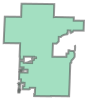

In [36]:
#Print out the precinct with duplicates
print(counties_shapes[counties_shapes["unique_ID"]=="097Jackson West"])
counties_shapes.loc[counties_shapes["unique_ID"]=="097Jackson West","geometry"].unary_union

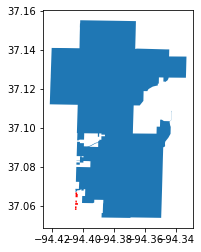

In [37]:
ax = counties_shapes.loc[[123],"geometry"].plot()
ind_list = [118,119,120,121,122]
for i in ind_list:
    counties_shapes.loc[[i],"geometry"].plot(ax = ax,color="red")

In [38]:
new_geom = counties_shapes[counties_shapes["unique_ID"]=="097Jackson West"].unary_union
counties_shapes.iat[123,2]=new_geom
counties_shapes = counties_shapes[~counties_shapes.index.isin([118,119,120,121,122])]
counties_shapes.reset_index(drop=True,inplace=True)

#Confirm there is only one Jackson West left
counties_shapes[counties_shapes["unique_ID"]=="097Jackson West"]

,unique_ID,VTDST,geometry
118,097Jackson West,n/a,"MULTIPOLYGON (((-94.40521 37.05849, -94.40520 ..."


#### Use Redistricting Phase 2 Shapefiles for those we couldn't find from the counties

In [39]:
#Filter out the counties that VEST got from elsewhere
no_county_source_names = ["Audrain", "Bates","Caldwell","Callaway","Camden","Cape Girardeau","Cedar","Cooper","Franklin","Greene","Jackson","Jefferson", 
               "Laclede", "Lafayette","Lawrence", "Marion", "Mcdonald","Miller","Nodaway",
               "Osage", "Ozark", "Pemiscot","Pike", "Randolph", "Scott","Ste Genevieve", "Texas", "Warren", "Washington", "Worth", "Wright"]
fips_to_take = fips_file[fips_file["County Name"].isin(no_county_source_names)]
no_county_source_names = fips_to_take["FIPS County"].tolist()

#Use the Census Redistricting Phase 2 file for these
no_county_source_shapes = full_shapefiles_census[full_shapefiles_census["COUNTYFP"].isin(no_county_source_names)]

In [40]:
#Create a unique ID for these counties
no_county_source_shapes["unique_ID"] = no_county_source_shapes["COUNTYFP"]+no_county_source_shapes["NAME"]

#Check to make sure there aren't duplicates
print(no_county_source_shapes["unique_ID"].value_counts())

print(no_county_source_shapes[no_county_source_shapes["unique_ID"]=="095KC 811"])

no_county_source_shapes.loc[no_county_source_shapes["VTDST"]=="K16811","unique_ID"]="095KC16811"

print(no_county_source_shapes["unique_ID"].value_counts())
no_county_source_shapes = no_county_source_shapes[["unique_ID","VTDST","geometry"]]

095KC 811                 2
095KC 1913                1
095Sni-A-Bar 05           1
0772nd Jackson            1
071OAK GROVE VILLAGE      1
                         ..
07742C                    1
219North Hickory Grove    1
099House Springs          1
099De Soto W-1            1
095Prairie 59             1
Name: unique_ID, Length: 1354, dtype: int64
     STATEFP COUNTYFP   VTDST NAMELSAD VTDI LSAD CHNG_TYPE ORIG_NAME  \
1425      29      095  000484   KC 811    P   00      None      None   
1576      29      095  K16811   KC 811    P   00      None      None   

     ORIG_CODE RELATE    NAME VINTAGE FUNCSTAT JUSTIFY  MTFCC  \
1425      None   None  KC 811      90        S    None  G5240   
1576      None   None  KC 811      90        S    None  G5240   

                                               geometry  unique_ID  
1425  POLYGON Z ((-94.58023 38.99266 0.00000, -94.58...  095KC 811  
1576  POLYGON Z ((-94.58589 39.00327 0.00000, -94.58...  095KC 811  
095KC 1913                1


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
#### Check the crs of the files before the merge

In [42]:
#Check the crs for these
print(counties_shapes.crs)
print(no_county_source_shapes.crs)
print(shapefiles_census.crs)

epsg:4269
epsg:4269
epsg:4269


In [43]:
#### Merge the various files into one file

In [44]:
#Make a geodataframe with all the different sources
global source_shapefiles
source_shapefiles = pd.concat([counties_shapes,no_county_source_shapes,shapefiles_census], axis=0, ignore_index=True)
source_shapefiles["COUNTYFP"]=source_shapefiles["unique_ID"].str[0:3]

### Attempt to join to election results

#### Clean up the Unique ID

In [45]:
#Make the IDs in "015","043","071","131","143","213" lower case except for the first letter of the words
source_shapefiles.loc[:,"unique_ID"] = source_shapefiles.loc[:,"unique_ID"].apply(lambda x: x.title() if x[0:3] in (["015","043","071","131","143","213"]) else x)

In [46]:
#Rename the unique ID column so that it matches what we set up for the shapefiles
filtered_election["unique_ID"] = filtered_election["join_col"]

#Attempt a join using the unique ID
join_one = pd.merge(source_shapefiles,filtered_election,how="outer",on="unique_ID",indicator=True)
print(join_one["_merge"].value_counts())

left_only = join_one[join_one["_merge"]=="left_only"]
right_only = join_one[join_one["_merge"]=="right_only"]

#Export these to CSV
#left_only.to_csv("./exported_csvs/only_shapefiles.csv")
#right_only.to_csv("./exported_csvs/only_elections.csv")


left_only     2353
both          2274
right_only     999
Name: _merge, dtype: int64


### Shapefile Precinct Modifications to Increase Matches

#### Name Changes

In [47]:
#Define a function that can change the precinct names
def name_change(old_id,new_id):
    source_shapefiles.loc[source_shapefiles["unique_ID"]==old_id,"unique_ID"]=new_id

#A list of precinct names to change
name_change('003Savannah Southeast','003Southeast')
name_change('003Savannah Southwest','003Southwest')
name_change('007I E Cuivre','007East Cuivre')
name_change('007Wilson/Salt River','007Salt River/Wilson')
name_change('017Drum-Dongola','017Drum Dungola')
name_change('023Hill View','023Hillview')
name_change('033Prarie/Egypt','033Prairie/Egypt')
name_change('037No. 1 - Sherman','03701 Sherman')
name_change('037No. 2 - Dayton','03702 Dayton')
name_change('037No. 6 - Everett','03706 Everett')
name_change('037No. 7 - Coldwater','03707 Drexel')
name_change('037No. 8 - West Dolan','03708 West Dolan')
name_change('037No. 9 - Dolan','03709 Dolan')
name_change('037No. 10 - Grand River','03710 Grand River Rural')
name_change('037No. 11 - Grand River, Ward 1','03711 Harrisonville Ward 1')
name_change('037No. 12 - Grand River, Ward 2','03712 Harrisonville Ward 2')
name_change('037No. 13 - Grand River, Ward 3','03713 Harrisonville Ward 3')
name_change('037No. 14 - Grand River, Ward 4','03714 Harrisonville Ward 4')
name_change('037No. 16 - Camp Branch','03716 East Lynne')
name_change('037No. 18 - Index','03718 Gunn City')
name_change('037No. 19 - Polk','03719 Polk')
name_change('037No. 20 - Pleasant Hill','03720 Pleasant Hill')
name_change('037No. 21 - Pleasant Hill','03721 Pleasant Hill East')
name_change('037No. 22 - Pleasant Hill','03722 Pleasant Hill')
name_change('037No. 23 - Pleasant Hill','03723 Pleasant Hill Rural')
name_change('037No. 24 - Peculiar','03724 Peculiar Rural')
name_change('037No. 25 - West Peculiar','03725 West Peculiar Rural')
name_change('037No. 26 - West Peculiar','03726 West Peculiar City')
name_change('037No. 27 - Union','03727 Union')
name_change('037No. 28 - Big Creek','03728 Big Creek Rural')
name_change('037No. 29 - Big Creek','03729 Winnebago')
name_change('037No. 30 - Raymore','03730 Raymore Rural')
name_change('037No. 31 - Raymore, Ward 3','03731 Raymore Ward 3')
name_change('037No. 32 - Raymore, Ward 2','03732 Raymore Ward 2')
name_change('037No. 33 - Raymore, Ward 2','03733 Raymore Ward 2')
name_change('037No. 34 - Raymore, Wards 3 & 4','03734 Raymore Wards 3 & 4')
name_change('037No. 35 - Raymore, Ward 4','03735 Raymore Ward 4')
name_change('037No. 36 - Kansas City','03736 Mt Pleasant Rural')
name_change('037No. 37 - Mt Pleasant','03737 Pleasant Prairie')
name_change('037No. 38 - Mt Pleasant, NE Ward 1','03738 Belton NE Ward 1')
name_change('037No. 39 - Mt Pleasant, NE Ward 1','03739 Belton NE Ward 1')
name_change('037No. 40 - Mt Pleasant, NW Ward 2','03740 Belton NW Ward 2')
name_change('037No. 41 - Mt Pleasant, NW Ward 2','03741 Belton NW Ward 2')
name_change('037No. 42 - Mt Pleasant, SW Ward 3','03742 Belton SW Ward 3')
name_change('037No. 43 - Mt Pleasant, SW Ward 3','03743 Belton SW Ward 3')
name_change('037No. 44 - Mt Pleasant, SW Ward 4','03744 Belton SW Ward 4')
name_change('037No. 45 - Mt Pleasant, SE Ward 4','03745 Belton SE Ward 4')
name_change('037No. 46 - Mt Pleasant','03746 East Creek')
name_change('037No. 47 - Raymore, Ward 1','03747 Raymore Ward 1')
name_change('043Cassidy','043Cassidy 1')
name_change('051Clark Township\nBrazito Precinct','051Clark Township Brazito')
name_change('051Clark Township\nEugene Precinct','051Clark Township Eugene')
name_change('051Jefferson Township\nExpressway Rental\nPrecinct','051Jefferson Township Expressway Rental')
name_change('051Jefferson Township CC General Precinct','051Jefferson Township CC General')
name_change('051Jefferson Township JC Fair Precinct','051Jefferson Township JC Fair')
name_change('051Jefferson Township Scott Station Precinct','051Jefferson Township Scott Station')
name_change('051Ward 2 Precinct 2','051JC-Ward 2 Precinct 2')
name_change('071Beaufort- Lyon','071Beaufort-Lyon')
name_change('0771st N Camp','0771st N Campbell')
name_change('0772nd N Camp','0772nd N Campbell')
name_change('0773rd N Camp A','0773rd N Campbell A')
name_change('077Republic North','077North Republic')
name_change('083Bearcreek / Deepwater','083Bearcreek/Deepwater')
name_change('083Springfield / Tebo','083Springfield/Tebo')
name_change('095Prairie 08','095Prairie  08')
name_change('095Prarie 01','095Prairie 01')
name_change('095Prarie 02','095Prairie 02')
name_change('095Prarie 10','095Prairie 10')
name_change('095Prarie 25','095Prairie 25')
name_change('095Prarie 53','095Prairie 53')
name_change('095Prarie 54','095Prairie 54')
name_change('095Prarie 55','095Prairie 55')
name_change('095Prarie 57','095Prairie 57')
name_change('095Prarie 58','095Prairie 58')
name_change('095Prarie 61','095Prairie 61')
name_change('095Prarie 63','095Prairie 63')
name_change('107Waverly 1st,2nd,East & West','107Waverly 1st/2nd/East & West')
name_change('131St.Elizabeth','131St. Elizabeth')
name_change('137Monroe City 1, 2, & 3/Indian Creek 4','137Monroe City 1 & 2 & 3/Indian Creek 4')
name_change('145Neosho No. 3','145Neosho #3')
name_change('151Masonic Hall','151Linn 2 South (St. John)')
name_change('151St. George','151Linn 1 North (St. George)')
name_change('177Knox','177Knoxville')
name_change('181Flatwoods & Johnson P2 & Washington','181Flatwoods/Johnson P2/Washington')
name_change('181Gatewood & Union','181Gatewood/Union')
name_change('181Harris & Varner P1','181Harris/Varner P1')
name_change('181Shirley & Kelly & Pine','181Shirley/Kelly/Pine')
name_change('181Thomas & Varner P2','181Thomas/Varner P2')
name_change('189CLA046','189CLA046/CLA048')
name_change('189LAF005','189LAF005/LAF048')
name_change('189LAF020','189LAF020/LAF021')
name_change('189MHT015','189MHT015/NW038/NW053')
name_change('201Ward 1','201Sikeston Ward 1/Rural')
name_change('201Ward 2','201Sikeston Ward 2')
name_change('201Ward 3','201Sikeston Ward 3')
name_change('201Ward 4','201Sikeston Ward 4')
name_change('209Ruth B Rural/Kimberling City','209Ruth B Rural')
name_change('219Elkhorn North','219North Elkhorn')
name_change('219North Hickory Grove','219Hickory Grove North')
name_change('219South Hickory Grove','219Hickory Grove South')
name_change('227Fletchall East','227East Fletchall')
name_change('227Fletchall West','227West Fletchall')
name_change('227Union','227West Union')
name_change('510ST 1-4','510STL 1-4')

#### Precinct Merges

In [48]:
#Define a function to merge precincts
source_shapefiles_crs = source_shapefiles.crs

def precinct_merger(precinct_list,new_precinct):
    global source_shapefiles
    prec_holder = []
    print("Merging pcts: "+str(precinct_list)+ " -> "+new_precinct)
    for i in precinct_list:
        prec_holder.append(source_shapefiles.loc[source_shapefiles["unique_ID"]==i])
    new_geom = pd.concat(prec_holder, ignore_index=True).unary_union
    new_prec = gp.GeoDataFrame(geometry=[new_geom],columns=["geometry","unique_ID"],crs = source_shapefiles_crs)
    new_prec["unique_ID"]=new_precinct
    source_shapefiles = source_shapefiles.append(new_prec)
    source_shapefiles = source_shapefiles[~source_shapefiles["unique_ID"].isin(precinct_list)]
    source_shapefiles.reset_index(inplace=True,drop=True)

In [49]:
#List of precincts that need to be merged
precinct_merger(['007Mexico No. 2','007Mexico No. 3','007Mexico No. 4'],'007Mexico No. 2/3/4')
precinct_merger(['027Fulton No. 1','027Fulton No. 2'],'027Fulton No. 1&2')
precinct_merger(['027Holts Summit No. 1','027Holts Summit No. 2'],'027Holts Summit No. 1&2')
precinct_merger(['029Osage Beach 1','029Osage Beach 2','029Osage Beach 3'],'029Osage Beach 1/2/3')
precinct_merger(['029Sunrise Beach 2','029Sunrise Beach 3','029Wilson Bend'],'029Wilson Bend/Sunrise Beach 2&3')
precinct_merger(['031Byrd No. 5','031Byrd No. 6'],'031Byrd No. 5/6')
precinct_merger(['031Delta City No. 1','031Delta City No. 2','031Delta Out County'],'031Delta')
precinct_merger(['033Carrollton Ward 2','033Carrollton Ward 3'],'033Carrollton Ward 2/3')
precinct_merger(['037No. 3 - Garden City','037No. 15 - Camp Branch','037No. 17 - Index'],'03703 Garden City/15 Camp Branch/17 Index')
precinct_merger(['037No. 4 - Austin','037No. 5 - Austin'],'03704 Austin/05 Archie')
precinct_merger(['045Clay/Des Moines No. 1/Des Moines No. 2','045Vernon'],'045Clay/Des Moines 1&2/Vernon')
precinct_merger(['045Jackson No. 1/Jefferson/Madison','045Jackson No. 2','045Union'],'045Jackson1&2/Jefferson/Madison/Union')
precinct_merger(['051Jefferson Township Apache Flats Precinct','051Jefferson Township Apache Flats Precinct Ward North','051Jefferson Township Apache Flats Precinct Ward South'],'051Jefferson Township Apache Flats')
precinct_merger(['051Liberty Township Taos Precinct','051Liberty Township Taos Precinct Ward 1','051Liberty Township Taos Precinct Ward 2'],'051Liberty Township Taos')
precinct_merger(['051Marion Township Centertown Precinct','051Marion Township Centertown Precinct Ward 1'],'051Marion Township Centertown')
precinct_merger(['051Marion Township St Martins Precinct','051Marion Township St Martins Precinct Ward North','051Marion Township St Martins Precinct Ward South'],'051Marion Township St Martins')
precinct_merger(['051Moreau Township Lohman Precinct','051Moreau Township Lohman Precinct Ward 1','051Moreau Township Lohman Precinct Ward 2'],'051Moreau Township Lohman')
precinct_merger(['051Moreau Township Russellville Precinct','051Moreau Township Russellville Precinct Ward East','051Moreau Township Russellville Precinct Ward West'],'051Moreau Township Russellville')
precinct_merger(['051Osage Township St. Thomas Precinct','051Osage Township St. Thomas Precinct Ward 1'],'051Osage Township St. Thomas')
precinct_merger(['051Osage Township Wardsville Precinct','051Osage Township Wardsville Precinct Ward 1'],'051Osage Township Wardsville')
precinct_merger(['071Beaufort/ Union','071Pea Ridge'],'071Pea Ridge/Beaufort/Union')
precinct_merger(['071Charmwood','071Stanton'],'071Stanton/Charmwood/Dry Branch')
precinct_merger(['071Miramiguoa Village','071Oak Grove Village','071Sullivan Out Of Town'],'071Miramiguoa/Oak Grove/Sullivan Out Of Town')
precinct_merger(['071Pacific Ward 2','071Pacific Ward 3'],'071Pacific Ward 2/3')
precinct_merger(['0771st Camp','0771st Boone'],'07711/1st Campbell')
precinct_merger(['0771st Robberson A','0771st Robberson B'],'0771st Robberson A/B')
precinct_merger(['0772nd Camp A','0772nd Camp C'],'0772nd Campbell A/C')
precinct_merger(['0772nd Camp B','0772nd Camp CN'],'0772nd Campbell B/CN')
precinct_merger(['07736A','0773rd N Camp B'],'07736A/3rd N Campbell B')
precinct_merger(['077Wilson C','077Wilson CW'],'077Wilson C/CW')
precinct_merger(['095KC 1303','095KC1314'],'095KC 1303/1314')
precinct_merger(['095KC 1601','095KC 1606'],'095KC 1601/1603/1606')
precinct_merger(['095KC 1701','095KC 1702','095KC 1704'],'095KC 1701/1702/1704/1715/1716')
precinct_merger(['095KC 204','095KC WD2 PCT205','095KC WD2 PCT206','095KC 207','095KC 209','095KC 214','095KC 215','095KC 217'],'095KC 204/205/206/207/209/214/215/217')
precinct_merger(['095KC 210','095KC WD2 PCT211','095KC 213'],'095KC 210/211/213')
precinct_merger(['095KC 601','095KC 602'],'095KC 601/602/616')
precinct_merger(['095KC 603','095KC 604','095KC 605','095KC 606'],'095KC 603/604/605/606/617')
precinct_merger(['095KC 807','095KC 808','095KC WD8 PCT810','095KC 811'],'095KC 807/808/810/811')
precinct_merger(['095KC 905','095KC 913'],'095KC 905/912/913')
precinct_merger(['097Carterville - Ward 1','097Carterville - Ward 2','097Carterville - Ward 3','097Carterville - Ward 4'],'097Carterville Wards 1-4')
precinct_merger(['099Crystal City W-1','099Crystal City W-2','099Crystal City W-3','099Crystal City W-4'],'099Crystal City W 1-4')
precinct_merger(['099De Soto W-1','099De Soto W-4'],'099De Soto W 1&4')
precinct_merger(['099De Soto W-2','099De Soto W-3'],'099De Soto W 2&3')
precinct_merger(['099Herculaneum','099Herculaneum W-2','099Herculaneum W-3'],'099Herculaneum W 1-3')
precinct_merger(['099Hillsboro W-1','099Hillsboro W-2','099Hillsboro W-3','099Hillsboro W-4'],'099Hillsboro W 1-4')
precinct_merger(['099Lake Tekawitha','099Meramec Valley'],'099Meramec Valley/Lake Tekakwitha')
precinct_merger(['099Pevely W-1','099Pevely W-2','099Pevely W-3','099Pevely W-4'],'099Pevely W 1-4')
precinct_merger(['101Warrensburg Northeast','101Warrensburg Southeast No. 2'],'101Warrensburg SE-2/NE')
precinct_merger(['101Warrensburg Northwest','101Warrensburg Southwest'],'101Warrensburg SW/NW')
precinct_merger(['105Conway 1','105Conway 2'],'105Conway')
precinct_merger(['105Spring Hollow 1','105Spring Hollow 2'],'105Spring Hollow 1 & 2')
precinct_merger(['107S. Odessa I & II','107Lake Lafayette 1-2'],'107S Odessa/Lake Lafayette')
precinct_merger(['119Pineville North','119Pineville South'],'119Pineville North/South')
precinct_merger(['133Anniston Rural','133Anniston Ward 1','133Anniston Ward 2'],'133Anniston Ward 1/Ward 2/Rural')
precinct_merger(['133Bertrand Rural','133Bertrand Ward 1','133Bertrand Ward 2'],'133Bertrand Ward 1/Ward 2/Rural')
precinct_merger(['133Charleston 1A','133Charleston 1B','133Charleston 2'],'133Charleston Ward 1A/Ward 1B/Ward 2')
precinct_merger(['133Charleston 3','133Charleston 4'],'133Charleston Ward 3/Ward 4')
precinct_merger(['133East Prairie Ward 1','133East Prairie Ward 2','133East Prairie Ward 3'],'133East Prairie Ward 1/Ward 2/Ward 3')
precinct_merger(['133Wilson City','133Wyatt Rural','133Wyatt Ward 1','133Wyatt Ward 2'],'133Wilson City/Wyatt Ward 1/Ward 2/Rural')
precinct_merger(['141Barnett I','141Barnett II'],'141Barnett I & II')
precinct_merger(['141Fairgrounds South','141Versailles'],'141Versailles South Fairgrounds South')
precinct_merger(['141Syracuse North','141Syracuse South'],'141Syracuse North & South')
precinct_merger(['141Versailles North','141Excelsior','141Fairgrounds North'],'141Versailles North Excelsior & Fairgrounds North')
precinct_merger(['143Anderson 1','143Anderson 2'],'143Anderson 1&2')
precinct_merger(['143Big Prairie 1','143Big Prairie 2'],'143Big Prairie 1&2')
precinct_merger(['143Como 1','143Como 2'],'143Como 1&2')
precinct_merger(['143Como 3','143Como 4'],'143Como 3&4')
precinct_merger(['143Lafont 1','143Lafont 2','143Lafont 3'],'143Lafont 1&2&3')
precinct_merger(['143West 1','143West 2'],'143West 1&2')
precinct_merger(['143West 3','143West 4'],'143West 3&4')
precinct_merger(['155Hayti 1','155Hayti Heights 1,2,3'],'155Hayti 1/Hayti Heights 1/2/3')
precinct_merger(['155Steele 1,2,Rural','155Holland'],'155Steele 1/2/Rural/Holland')
precinct_merger(['1591st Ward 1st Precinct','1591st Ward 2nd Precinct','1591st Ward 3rd Precinct'],'1591st Ward')
precinct_merger(['1592nd Ward 1st Precinct','1592nd Ward 2nd Precinct','1592nd Ward 3rd Precinct'],'1592nd Ward')
precinct_merger(['1593rd Ward 1st Precinct','1593rd Ward 2nd Precinct','1593rd Ward 3rd Precinct'],'1593rd Ward')
precinct_merger(['1594th Ward 1st Precinct','1594th Ward 2nd Precinct','1594th Ward 3rd Precinct'],'1594th Ward')
precinct_merger(['159Smithton E & W/Lake Creek','159Smithton W BP'],'159Smithton W BP/Smithton E & W/Lake Creek')
precinct_merger(['161Dawson','161St. James Ward No. 1','161St. James Ward No. 2','161St. James Ward No. 3'],'161Dawson/St. James 1&2&3')
precinct_merger(['161Doolittle Outside','161Doolittle Ward No. 1','161Doolittle Ward No. 2','161Doolittle Ward No. 3'],'161Doolittle')
precinct_merger(['161Edgar Springs North','161Edgar Springs South','161Spring Creek East','161Spring Creek West'],'161Edgar Springs/Spring Creek')
precinct_merger(['161Meramec','161St. James East','161St. James Ward No. 4','161St. James West'],'161Meramec/St. James 4&E&W')
precinct_merger(['161Miller East','161Miller West','161Rolla Outside North'],'161Miller/Rolla North')
precinct_merger(['161Newburg Ward No. 1','161Newburg Ward No. 2','161Liberty East','161Liberty West'],'161Newburg/Liberty')
precinct_merger(['165Houston Lake 4','165South-East 37'],'165Houston Lake 4/Southeast 27')
precinct_merger(['167Flemington','167Johnson'],'167Johnson/Flemington/Campbell/Jefferson')
precinct_merger(['167North Benton','167South Benton','167South Greene'],'167N&S Benton/S Greene')
precinct_merger(['175Huntsville','177Elkhorn','177Elmira','177Excelsior Springs'],'175Huntsville 1-4')
precinct_merger(['177Ward 1','177Ward 2'],'177Richmond 1&2')
precinct_merger(['177Ward 3','177Ward 4'],'177Richmond 3&4')
precinct_merger(['185Appleton No. 1','185Appleton No. 2'],'185Appleton')
precinct_merger(['185Butler East','185Butler West'],'185Butler')
precinct_merger(['189AP014','189AP015','189AP016','189NOR027','189NOR031'],'189AP014/AP015/AP016/NOR027/NOR31')
precinct_merger(['189AP050','189AP045','189AP051','189NOR021','189NOR056'],'189AP045/AP050/AP051/NOR21/NOR56')
precinct_merger(['189BON013','189BON023','189BON026','189BON029'],'189BON013/BON23/BON026/BON029')
precinct_merger(['189LAF037','189LAF040','189LAF041'],'189LAF037/LAF040/LAF041/LAF047')
precinct_merger(['189OAK001','189OAK006'],'189OAK001/OAK0006')
precinct_merger(['189QUE017','189QUE020','189QUE040','189QUE042'],'189QUE017/QUE20/QUE40/QUE42')
precinct_merger(['205Salt River East','205Salt River West/Lentner'],'205Salt River/Lentner')
precinct_merger(['209Flat Creek A','209Flat Creek B'],'209Flat Creek A/B')
precinct_merger(['223Peach Tree','223Piedmont Ward No. 1','223Piedmont Ward No. 2'],'223Peach Tree/Piedmont Ward 1/Ward 2')

Merging pcts: ['007Mexico No. 2', '007Mexico No. 3', '007Mexico No. 4'] -> 007Mexico No. 2/3/4
Merging pcts: ['027Fulton No. 1', '027Fulton No. 2'] -> 027Fulton No. 1&2
Merging pcts: ['027Holts Summit No. 1', '027Holts Summit No. 2'] -> 027Holts Summit No. 1&2
Merging pcts: ['029Osage Beach 1', '029Osage Beach 2', '029Osage Beach 3'] -> 029Osage Beach 1/2/3
Merging pcts: ['029Sunrise Beach 2', '029Sunrise Beach 3', '029Wilson Bend'] -> 029Wilson Bend/Sunrise Beach 2&3
Merging pcts: ['031Byrd No. 5', '031Byrd No. 6'] -> 031Byrd No. 5/6
Merging pcts: ['031Delta City No. 1', '031Delta City No. 2', '031Delta Out County'] -> 031Delta
Merging pcts: ['033Carrollton Ward 2', '033Carrollton Ward 3'] -> 033Carrollton Ward 2/3
Merging pcts: ['037No. 3 - Garden City', '037No. 15 - Camp Branch', '037No. 17 - Index'] -> 03703 Garden City/15 Camp Branch/17 Index
Merging pcts: ['037No. 4 - Austin', '037No. 5 - Austin'] -> 03704 Austin/05 Archie
Merging pcts: ['045Clay/Des Moines No. 1/Des Moines No. 2

Merging pcts: ['161Meramec', '161St. James East', '161St. James Ward No. 4', '161St. James West'] -> 161Meramec/St. James 4&E&W
Merging pcts: ['161Miller East', '161Miller West', '161Rolla Outside North'] -> 161Miller/Rolla North
Merging pcts: ['161Newburg Ward No. 1', '161Newburg Ward No. 2', '161Liberty East', '161Liberty West'] -> 161Newburg/Liberty
Merging pcts: ['165Houston Lake 4', '165South-East 37'] -> 165Houston Lake 4/Southeast 27
Merging pcts: ['167Flemington', '167Johnson'] -> 167Johnson/Flemington/Campbell/Jefferson
Merging pcts: ['167North Benton', '167South Benton', '167South Greene'] -> 167N&S Benton/S Greene
Merging pcts: ['175Huntsville', '177Elkhorn', '177Elmira', '177Excelsior Springs'] -> 175Huntsville 1-4
Merging pcts: ['177Ward 1', '177Ward 2'] -> 177Richmond 1&2
Merging pcts: ['177Ward 3', '177Ward 4'] -> 177Richmond 3&4
Merging pcts: ['185Appleton No. 1', '185Appleton No. 2'] -> 185Appleton
Merging pcts: ['185Butler East', '185Butler West'] -> 185Butler
Merging

#### Automated Precinct Mergers

In [50]:
count = 0
for val in list(filtered_election["unique_ID"]):
    if "/" in val:
        pieces = val.split("/")
        if "095KC " in val:
            fips = pieces[0][0:6]
        elif ("095Brooking " in val):
            fips = pieces[0][0:16]
        elif ("095Sni-A-Bar " in val):
            fips = pieces[0][0:13]
        elif ("095Blue " in val):
            fips = pieces[0][0:8]
        elif ("095Prairie " in val):
            fips = pieces[0][0:11]
        elif ("095Van Buren " in val):
            fips = pieces[0][0:13]    
        elif ("095Fort Osage " in val):
            fips = pieces[0][0:14]
        elif ("095Washington " in val):
            fips = pieces[0][0:14]
        else:
            fips = pieces[0][0:3]
        holder = []
        holder.append(pieces[0])
        fun_call = True
        for i in range(1,len(pieces)):
            test_val = fips+pieces[i]
            if test_val not in (list(source_shapefiles["unique_ID"])):
                #print("Can't join: " + test_val)
                fun_call = False
            holder.append(fips+pieces[i])
        if (fun_call):
            precinct_merger(holder,val)
            a = 1

Merging pcts: ['003John Glenn', '003Country Club', '003Beeler'] -> 003John Glenn/Country Club/Beeler
Merging pcts: ['003Platte West', '003Rosendale', '003Bolckow'] -> 003Platte West/Rosendale/Bolckow
Merging pcts: ['003Fillmore', '003Clay'] -> 003Fillmore/Clay
Merging pcts: ['003Platte East', '003Empire East'] -> 003Platte East/Empire East
Merging pcts: ['003Savannah Northeast', '003Southeast'] -> 003Savannah Northeast/Southeast
Merging pcts: ['003Savannah Northwest', '003Southwest'] -> 003Savannah Northwest/Southwest
Merging pcts: ['007Rush Hill', '007Benton City'] -> 007Rush Hill/Benton City
Merging pcts: ['009McDonald', '009Butterfield'] -> 009McDonald/Butterfield
Merging pcts: ['009Cassville Rural', '009Mineral'] -> 009Cassville Rural/Mineral
Merging pcts: ['009Kings Prairie', '009Pleasant Ridge'] -> 009Kings Prairie/Pleasant Ridge
Merging pcts: ['009Monett', '009Capps Creek'] -> 009Monett/Capps Creek
Merging pcts: ['009Ozark', '009Crane Creek'] -> 009Ozark/Crane Creek
Merging pcts

Merging pcts: ['095Brooking No. 5', '095Brooking No. 20'] -> 095Brooking No. 5/20
Merging pcts: ['095Brooking No. 8', '095Brooking No. 13'] -> 095Brooking No. 8/13
Merging pcts: ['095Brooking No. 11', '095Brooking No. 15'] -> 095Brooking No. 11/15
Merging pcts: ['095Fort Osage 03', '095Fort Osage 04', '095Fort Osage 05', '095Fort Osage 09'] -> 095Fort Osage 03/04/05/09
Merging pcts: ['095Fort Osage 06', '095Fort Osage 10'] -> 095Fort Osage 06/10
Merging pcts: ['095Prairie 03', '095Prairie 04'] -> 095Prairie 03/04
Merging pcts: ['095Prairie 08', '095Prairie 10'] -> 095Prairie 08/10
Merging pcts: ['095Prairie 13', '095Prairie 14'] -> 095Prairie 13/14
Merging pcts: ['095Prairie 21', '095Prairie 22'] -> 095Prairie 21/22
Merging pcts: ['095Prairie 30', '095Prairie 31'] -> 095Prairie 30/31
Merging pcts: ['095Prairie 41', '095Prairie 42'] -> 095Prairie 41/42
Merging pcts: ['095Prairie 43', '095Prairie 45'] -> 095Prairie 43/45
Merging pcts: ['095Prairie 46', '095Prairie 59'] -> 095Prairie 46/5

Merging pcts: ['165New Market 23', '165Dearborn 24'] -> 165New Market 23/Dearborn 24
Merging pcts: ['165Hoover 29', '165Shiloh 43'] -> 165Hoover 29/Shiloh 43
Merging pcts: ['165Ferrelview 30', '165Mid-Continent 31', '165Linkville 33'] -> 165Ferrelview 30/Mid-Continent 31/Linkville 33
Merging pcts: ['165Beverly 16', '165Tracy 17', "165Settle's Station 28"] -> 165Beverly 16/Tracy 17/Settle's Station 28
Merging pcts: ['165Edgerton 25', '165Ridgely 26'] -> 165Edgerton 25/Ridgely 26
Merging pcts: ['167E&W Madison', '167Campbell'] -> 167E&W Madison/Campbell
Merging pcts: ['167N Greene', '167McKinley', '167Jefferson'] -> 167N Greene/McKinley/Jefferson
Merging pcts: ['167Northwest Marion', '167Cliquot'] -> 167Northwest Marion/Cliquot
Merging pcts: ['167West Looney', '167Wishart'] -> 167West Looney/Wishart
Merging pcts: ['171Union NE', '171Sherman', '171Richland'] -> 171Union NE/Sherman/Richland
Merging pcts: ['171Wilson', '171Union SW', '171Jackson'] -> 171Wilson/Union SW/Jackson
Merging pcts:

Merging pcts: ['189CON020', '189CON050'] -> 189CON020/CON050
Merging pcts: ['189CON021', '189CON022'] -> 189CON021/CON022
Merging pcts: ['189CON024', '189CON044'] -> 189CON024/CON044
Merging pcts: ['189CON025', '189CON031', '189CON048'] -> 189CON025/CON031/CON048
Merging pcts: ['189CON026', '189CON037'] -> 189CON026/CON037
Merging pcts: ['189CON003', '189CON041', '189TSF014'] -> 189CON003/CON041/TSF014
Merging pcts: ['189CON036', '189CON038'] -> 189CON036/CON038
Merging pcts: ['189CON047', '189CON052'] -> 189CON047/CON052
Merging pcts: ['189CON005', '189GRA042'] -> 189CON005/GRA042
Merging pcts: ['189CON008', '189CON027'] -> 189CON008/CON027
Merging pcts: ['189CON007', '189CON019', '189CON051'] -> 189CON007/CON019/CON051
Merging pcts: ['189FER012', '189FER020', '189FER031', '189FER032'] -> 189FER012/FER020/FER031/FER032
Merging pcts: ['189FER014', '189FER043'] -> 189FER014/FER043
Merging pcts: ['189FER017', '189FER018', '189FER019'] -> 189FER017/FER018/FER019
Merging pcts: ['189FER002'

Merging pcts: ['189MHT039', '189MR013', '189MR052', '189MR055'] -> 189MHT039/MR013/MR052/MR055
Merging pcts: ['189MHT046', '189NW029'] -> 189MHT046/NW029
Merging pcts: ['189MHT051', '189MHT055'] -> 189MHT051/MHT055
Merging pcts: ['189MHT054', '189MHT056'] -> 189MHT054/MHT056
Merging pcts: ['189MHT006', '189MHT049'] -> 189MHT006/MHT049
Merging pcts: ['189MHT008', '189MHT028'] -> 189MHT008/MHT028
Merging pcts: ['189MID010', '189MID018', '189MID055'] -> 189MID010/MID018/MID055
Merging pcts: ['189MID014', '189NOR023'] -> 189MID014/NOR023
Merging pcts: ['189MID015', '189NOR025', '189NOR043', '189NOR052'] -> 189MID015/NOR025/NOR043/NOR052
Merging pcts: ['189MID016', '189MID041'] -> 189MID016/MID041
Merging pcts: ['189MID017', '189MID029', '189MID034', '189MID037', '189MID044', '189MID045', '189MID049', '189MID051'] -> 189MID017/MID029/MID034/MID037/MID044/MID045/MID049/MID051
Merging pcts: ['189MID002', '189MID031'] -> 189MID002/MID031
Merging pcts: ['189MID021', '189MID047'] -> 189MID021/MI

Merging pcts: ['189UNV025', '189UNV026'] -> 189UNV025/UNV026
Merging pcts: ['189UNV028', '189UNV043'] -> 189UNV028/UNV043
Merging pcts: ['189UNV030', '189UNV045'] -> 189UNV030/UNV045
Merging pcts: ['189UNV032', '189UNV041'] -> 189UNV032/UNV041
Merging pcts: ['189UNV033', '189UNV039', '189UNV040'] -> 189UNV033/UNV039/UNV040
Merging pcts: ['189UNV005', '189UNV006', '189UNV007', '189UNV008', '189UNV009', '189UNV011', '189UNV012', '189UNV013'] -> 189UNV005/UNV006/UNV007/UNV008/UNV009/UNV011/UNV012/UNV013
Merging pcts: ['189WH013', '189WH021'] -> 189WH013/WH021
Merging pcts: ['189WH015', '189WH024', '189WH029'] -> 189WH015/WH024/WH029
Merging pcts: ['189WH019', '189WH020', '189WH022'] -> 189WH019/WH020/WH022
Merging pcts: ['189WH002', '189WH005', '189WH007', '189WH026', '189WH028'] -> 189WH002/WH005/WH007/WH026/WH028
Merging pcts: ['189WH032', '189WH038', '189WH044'] -> 189WH032/WH038/WH044
Merging pcts: ['189WH034', '189WH043'] -> 189WH034/WH043
Merging pcts: ['189WH006', '189WH040', '189W

Merging pcts: ['095KC 2407', '095KC 2414', '095KC 2425', '095KC 2426', '095KC 2430'] -> 095KC 2407/2414/2425/2426/2430
Merging pcts: ['095KC 2501', '095KC 2505', '095KC 2506'] -> 095KC 2501/2505/2506
Merging pcts: ['095KC 2510', '095KC 2511'] -> 095KC 2510/2511
Merging pcts: ['095KC 2503', '095KC 2512', '095KC 2513', '095KC 2514'] -> 095KC 2503/2512/2513/2514
Merging pcts: ['095KC 2504', '095KC 2507', '095KC 2509'] -> 095KC 2504/2507/2509
Merging pcts: ['095KC 2502', '095KC 2508'] -> 095KC 2502/2508
Merging pcts: ['095KC 2601', '095KC 2611', '095KC 2613'] -> 095KC 2601/2611/2613
Merging pcts: ['095KC 2610', '095KC 2612'] -> 095KC 2610/2612
Merging pcts: ['095KC 2605', '095KC 2606', '095KC 2608'] -> 095KC 2605/2606/2608
Merging pcts: ['095KC 301', '095KC 310', '095KC 315'] -> 095KC 301/310/315
Merging pcts: ['095KC 306', '095KC 307', '095KC 314'] -> 095KC 306/307/314
Merging pcts: ['095KC 317', '095KC 318'] -> 095KC 317/318
Merging pcts: ['095KC 302', '095KC 303', '095KC 304', '095KC 30

### Final Merge

#### Join the Shapefiles and Election Results

In [51]:
filtered_election["unique_ID"] = filtered_election["join_col"]

join_two = pd.merge(source_shapefiles,filtered_election,how="outer",on="unique_ID",indicator=True)
print(join_two["_merge"].value_counts())

left_only = join_two[join_two["_merge"]=="left_only"]
right_only = join_two[join_two["_merge"]=="right_only"]
both = join_two[join_two["_merge"]=="both"]

#left_only.to_csv("./exported_csvs/only_shapefiles.csv")
#right_only.to_csv("./exported_csvs/only_elections.csv")

both          3180
left_only      159
right_only      93
Name: _merge, dtype: int64


In [52]:
count = 0
for i in left_only["unique_ID"].str[0:3]:
    if i in no_county_source_names:
        count+=1
print("Of the "+str(len(left_only["unique_ID"]))+" unjoined precinct shps " +str(count)+" of them are in the counties where we used a different source")

count = 0
for i in right_only["unique_ID"].str[0:3]:
    if i in no_county_source_names:
        count+=1
print("Of the "+str(len(right_only["unique_ID"]))+" unjoined precinct election results " +str(count)+" of them are in the counties where we used a different source")


Of the 159 unjoined precinct shps 89 of them are in the counties where we used a different source
Of the 93 unjoined precinct election results 51 of them are in the counties where we used a different source


In [53]:
print(no_county_source_names)

['007', '013', '025', '027', '029', '031', '039', '053', '071', '077', '095', '099', '105', '107', '109', '119', '127', '131', '147', '151', '153', '155', '163', '175', '186', '201', '215', '219', '221', '227', '229']


## Join Sourcefiles to VEST file

In [54]:
final_merge = pd.merge(join_two[join_two["_merge"]=="both"],vest_mo_16,how="outer",on="join_col",indicator="final_merge")
print(final_merge["final_merge"].value_counts())

both          3180
right_only      93
left_only        0
Name: final_merge, dtype: int64


### Check the Shapefiles

In [55]:
both = final_merge[final_merge["final_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_mo_16.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_mo_16.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    3115
True       65
dtype: int64


1) For 097Rex difference in area is 1.8806229362501115
2) For 007Friendship difference in area is 3.481958637604284
3) For 007Thompson difference in area is 3.4819274625467016
4) For 007Community difference in area is 1.6654691736063312
5) For 007South Fork difference in area is 1.6776704248934875
6) For 027Calwood difference in area is 1.2243818721162676
7) For 039South Linn difference in area is 5.731801289480337
8) For 039Madison difference in area is 5.664933821179576
9) For 099Grubville difference in area is 2.2281912747298955
10) For 099Romaine Creek difference in area is 2.1451871857110856
11) For 099Otto difference in area is 2.117535715311415
12) For 105East Lebanon 1 difference in area is 1.0266359028468168
13) For 105Gasconade difference in area is 6.315063426760308
14) For 105East Lebanon 2A difference in area is 4.792727077960672
15) For 105Washington difference in area is 17.8995474778391
16) For 107Bates City difference in area is 11.767079629910514
17) For 107Lexington 

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 131Eldon North difference in area is 1.4217839512542347
23) For 131Olean difference in area is 1.59906040020052
24) For 131Iberia City & Rural difference in area is 1.0580655441029425
25) For 131Brumley difference in area is 1.808750319566739
26) For 131St. Elizabeth difference in area is 1.5316622888801914
27) For 131St. Anthony difference in area is 1.4800077987205122
28) For 131Tuscumbia difference in area is 1.144001202501434
29) For 147Lincoln difference in area is 1.0821622287922412
30) For 147Polk A difference in area is 15.824438177106055
31) For 147Polk B difference in area is 13.352612322914043
32) For 151Chamois difference in area is 4.092892969793437
33) For 153Thornfield difference in area is 1.123323408784939
34) For 153Barren Fork difference in area is 1.7519684096071373
35) For 163Ashley NO/Hartford PQ difference in area is 1.2881621894650277
36) For 163Calumet F difference in area is 22.53310174314004
37) For 163Cuivre JL difference in area is 8.599520909438231

147) For 219South Elkhorn/Macedonia difference in area is 12.150204537918267


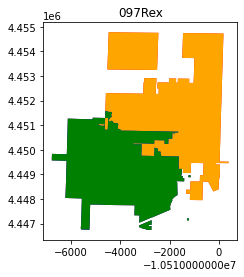

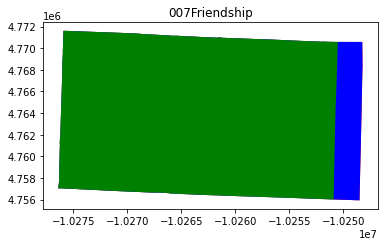

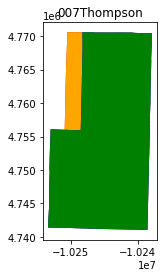

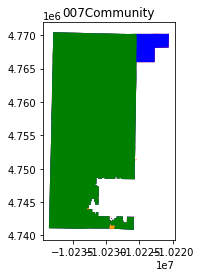

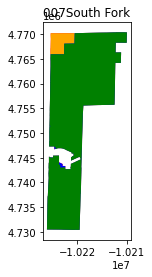

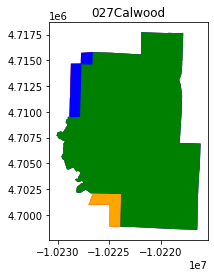

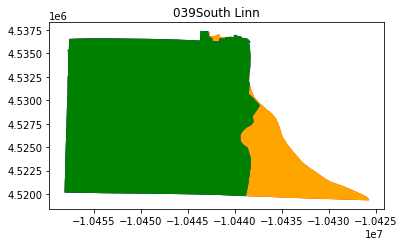

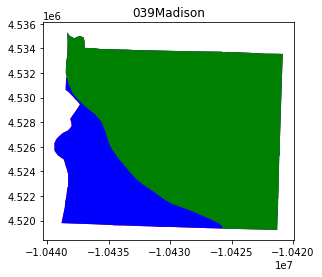

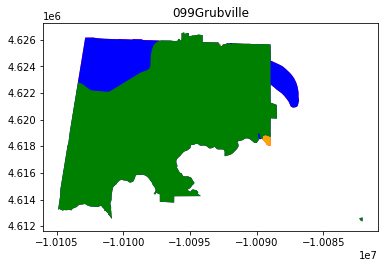

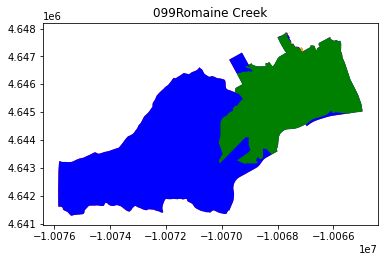

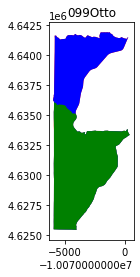

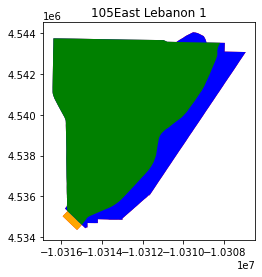

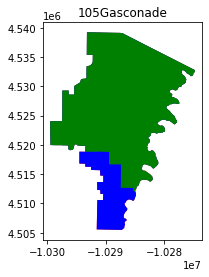

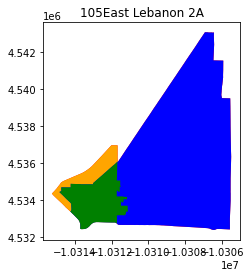

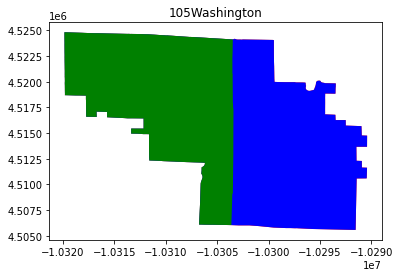

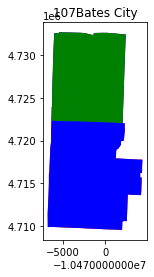

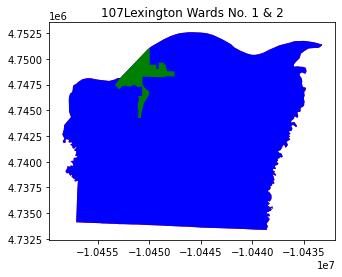

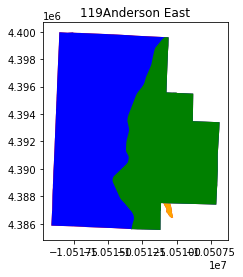

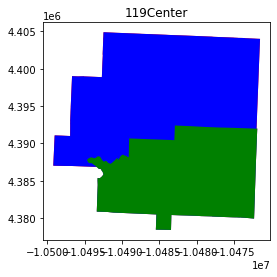

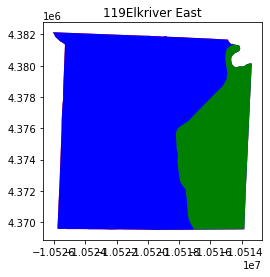

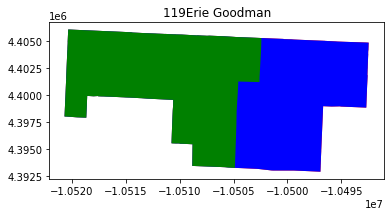

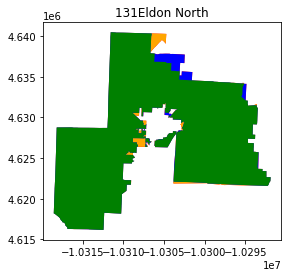

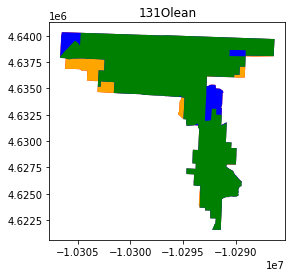

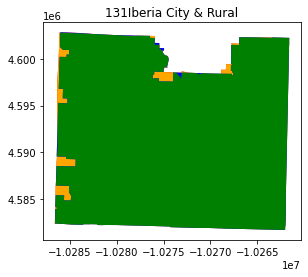

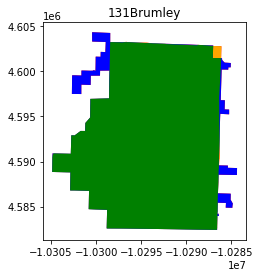

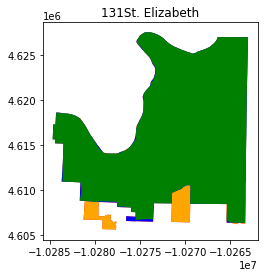

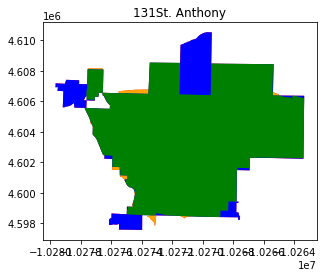

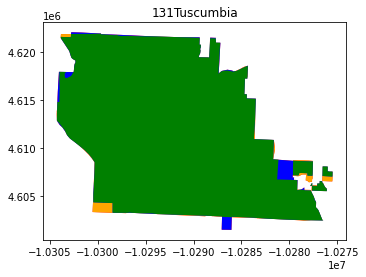

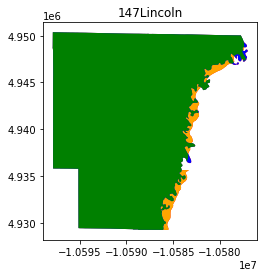

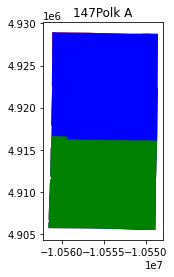

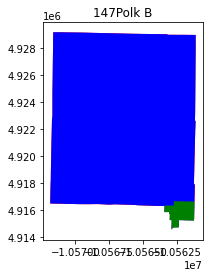

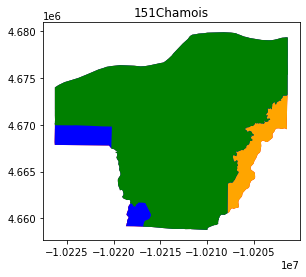

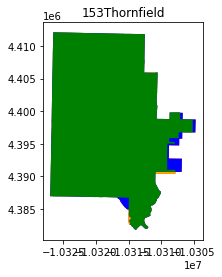

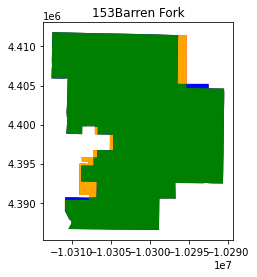

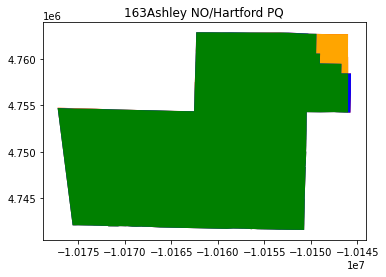

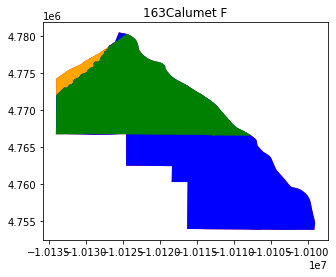

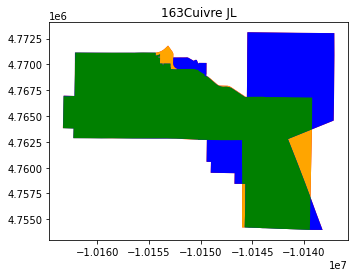

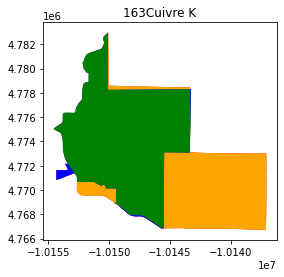

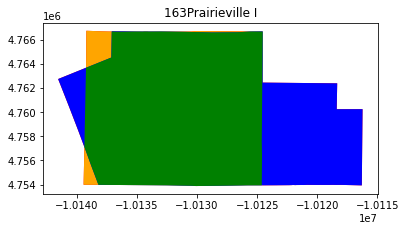

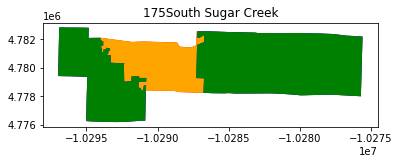

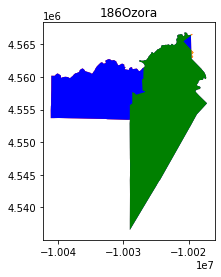

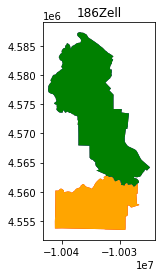

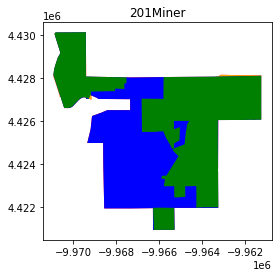

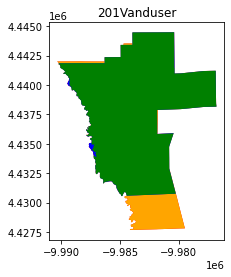

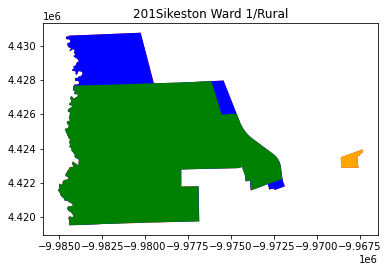

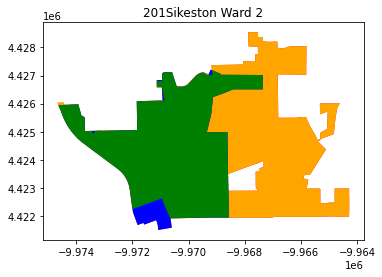

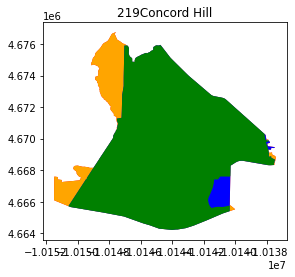

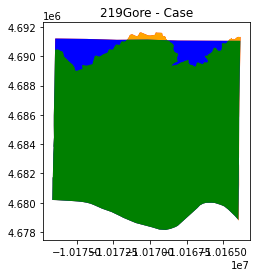

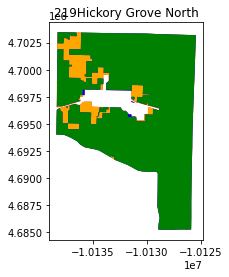

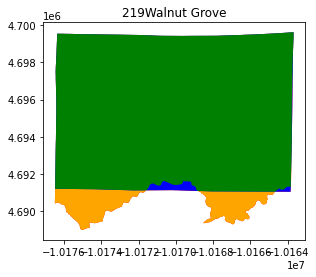

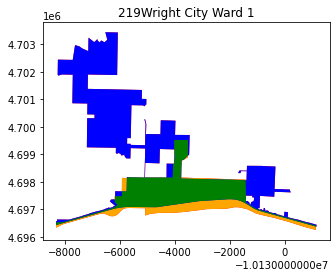

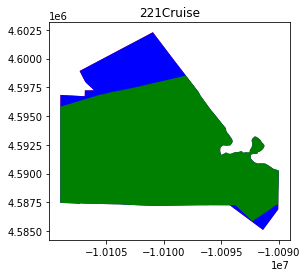

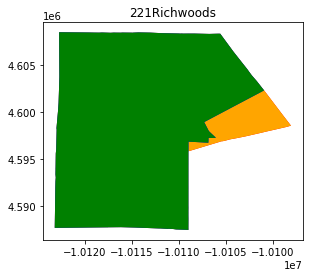

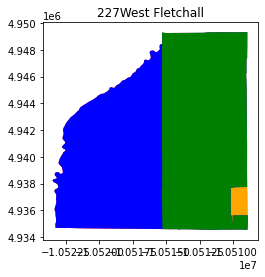

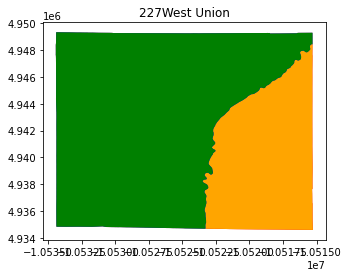

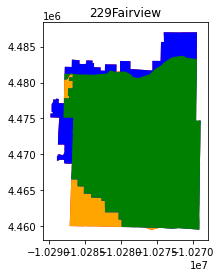

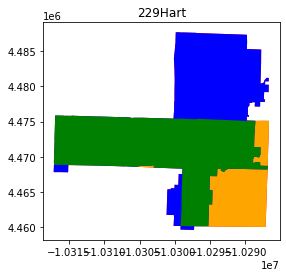

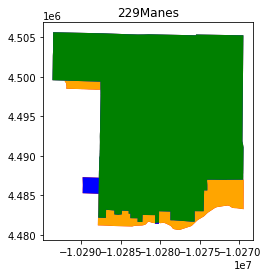

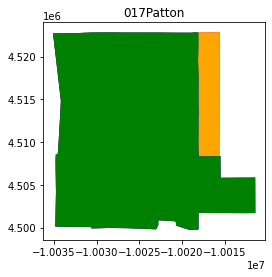

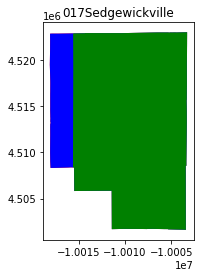

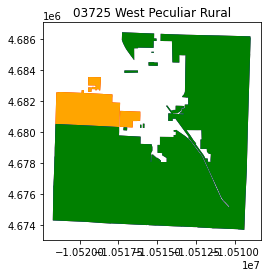

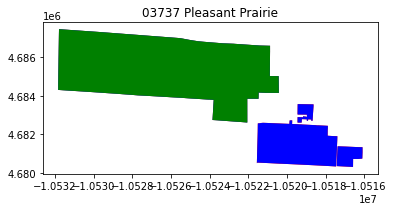

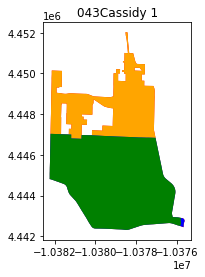

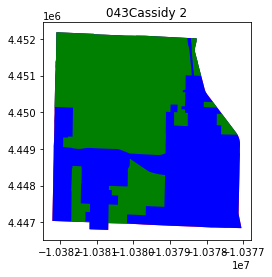

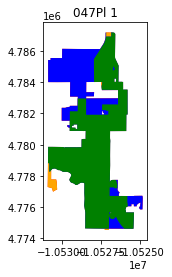

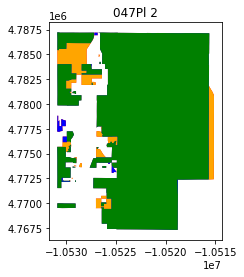

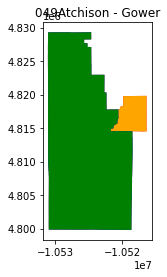

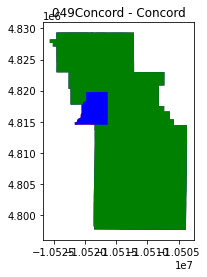

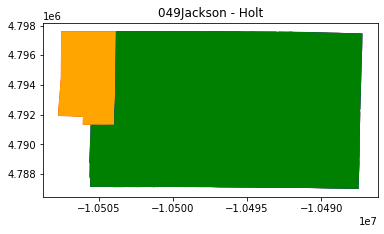

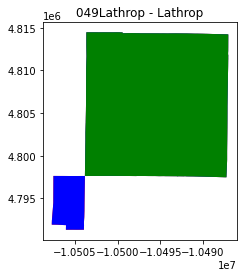

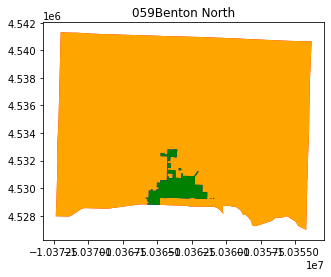

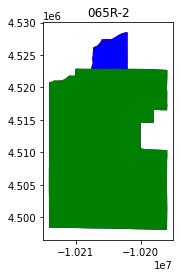

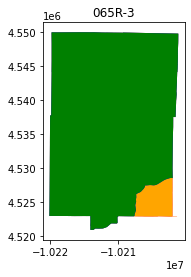

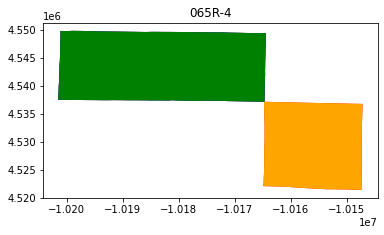

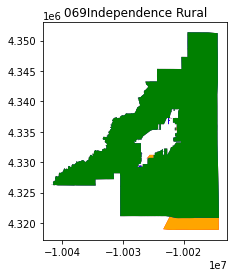

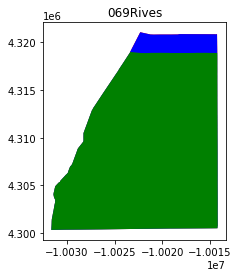

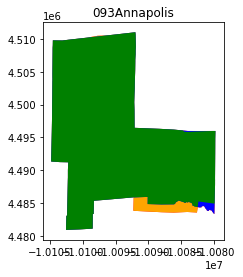

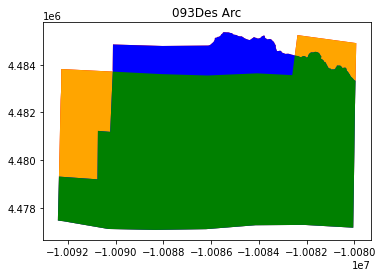

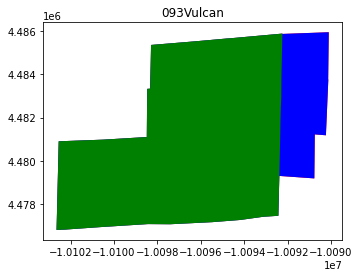

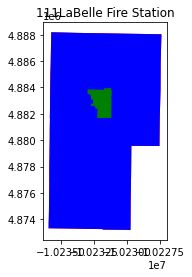

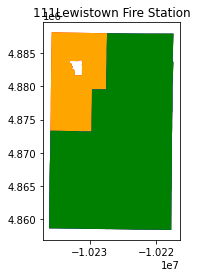

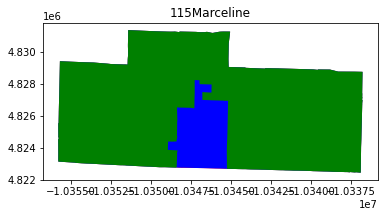

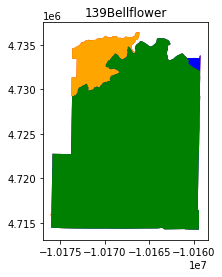

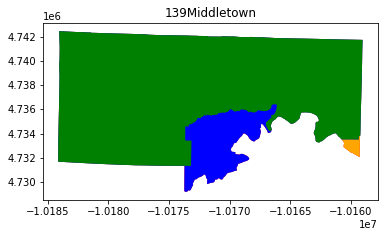

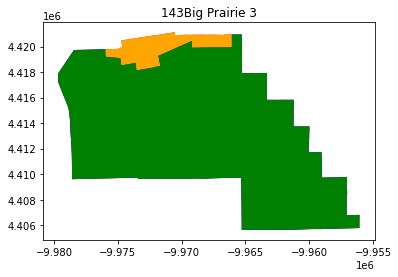

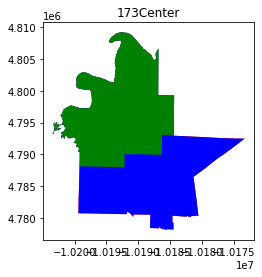

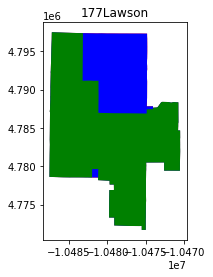

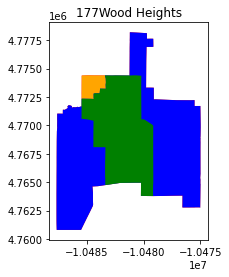

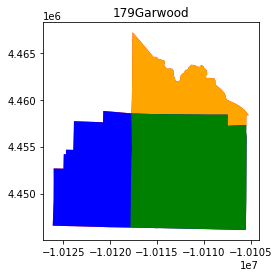

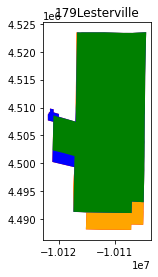

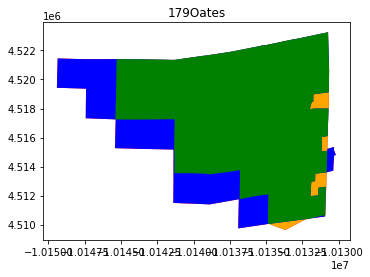

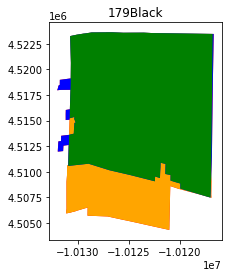

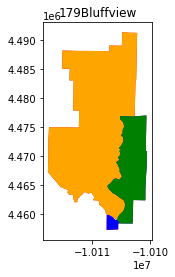

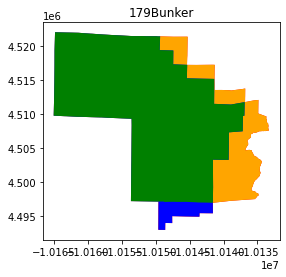

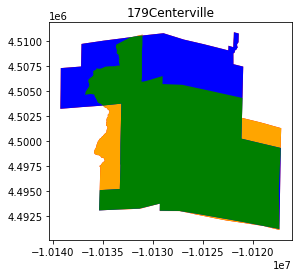

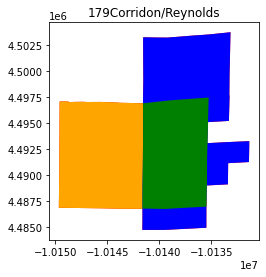

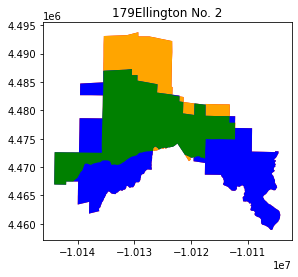

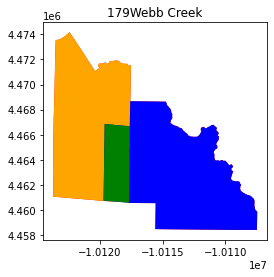

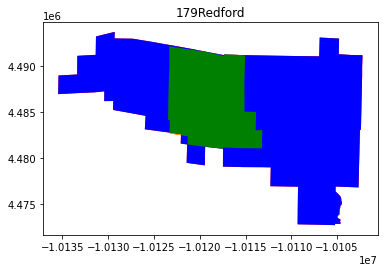

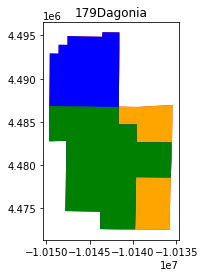

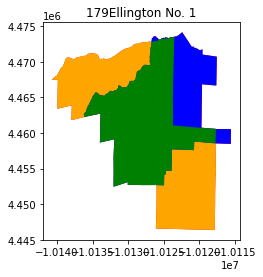

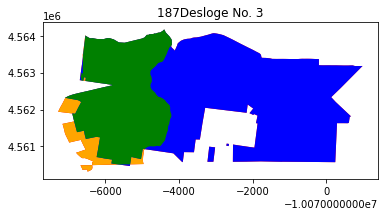

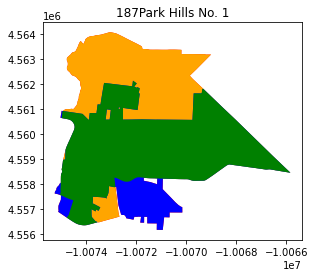

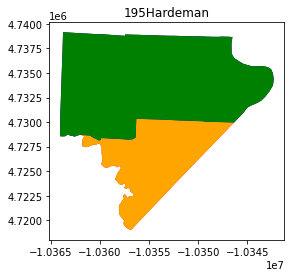

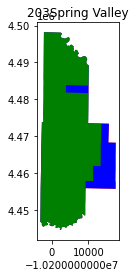

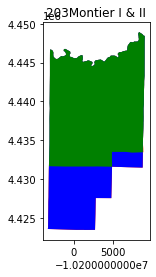

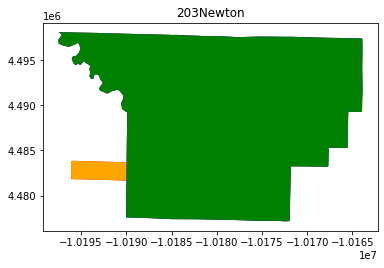

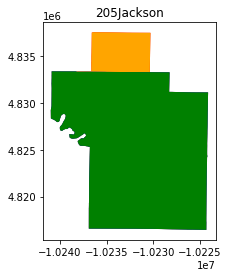

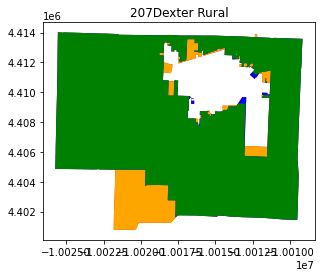

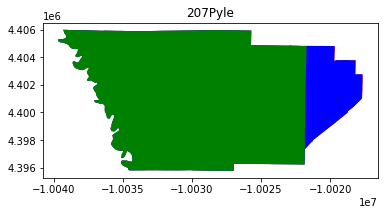

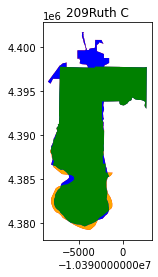

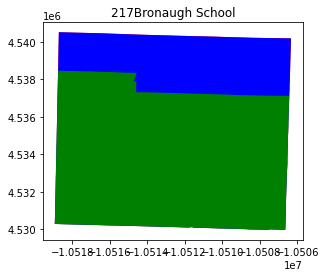

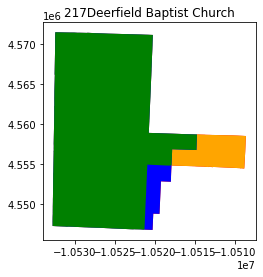

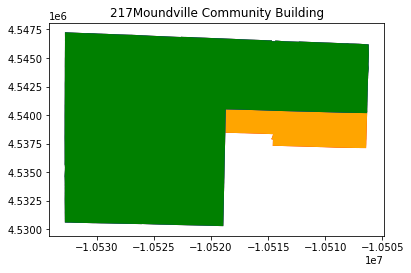

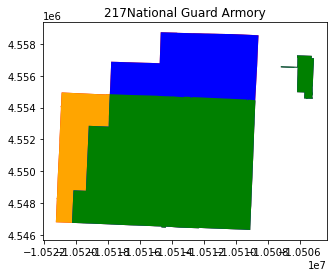

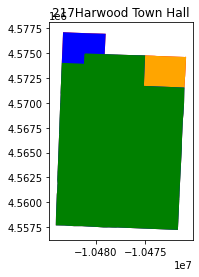

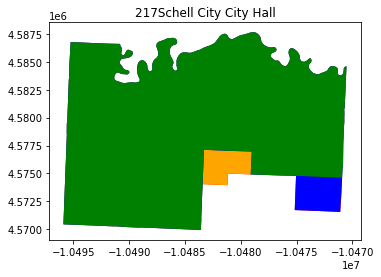

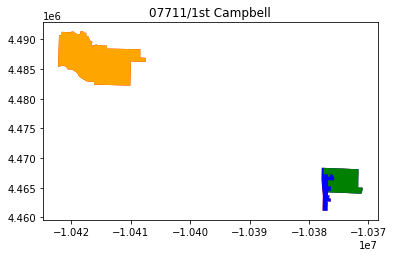

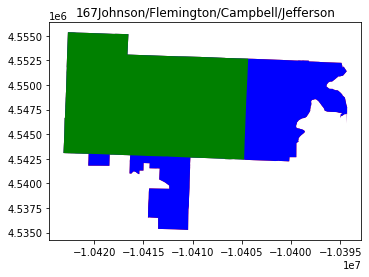

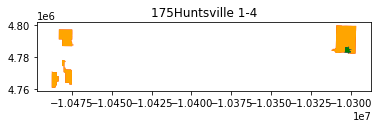

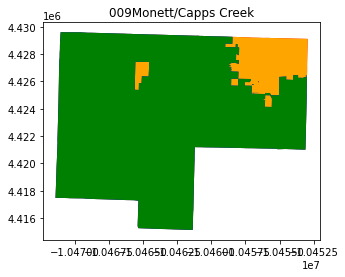

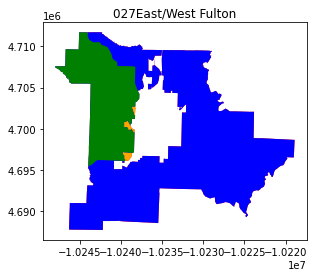

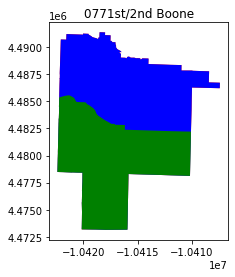

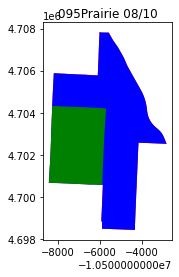

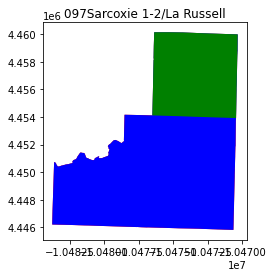

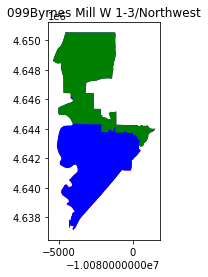

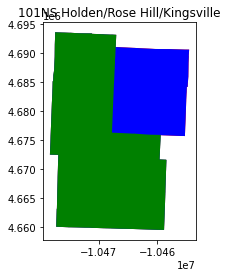

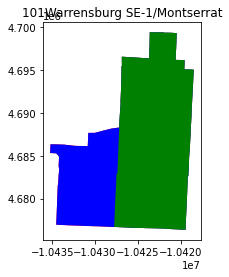

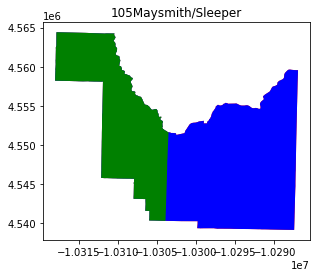

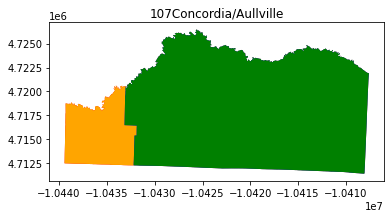

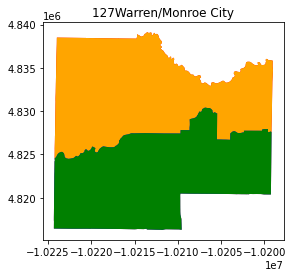

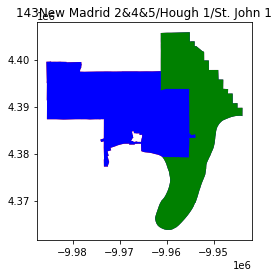

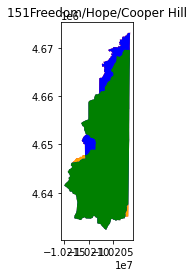

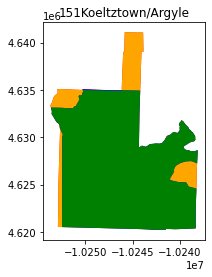

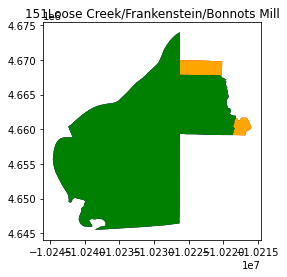

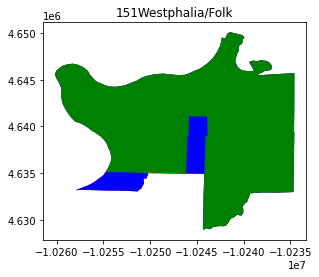

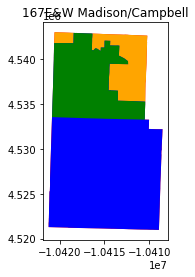

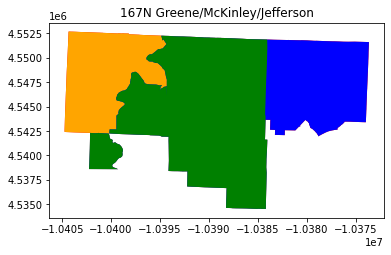

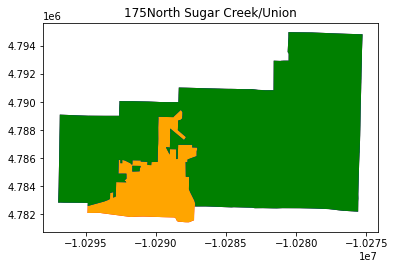

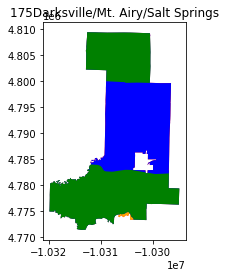

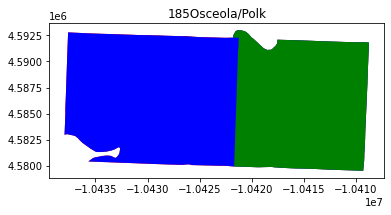

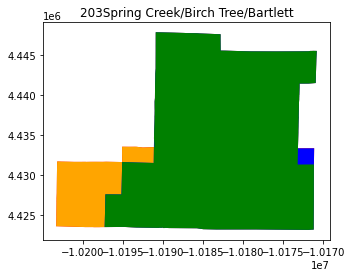

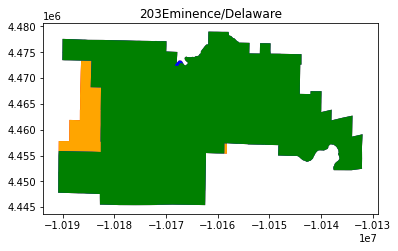

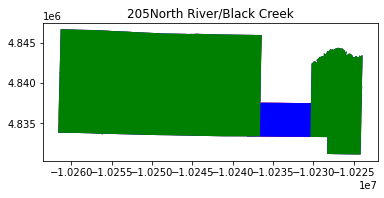

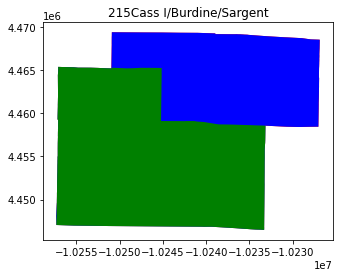

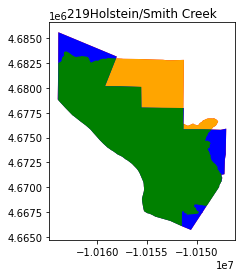

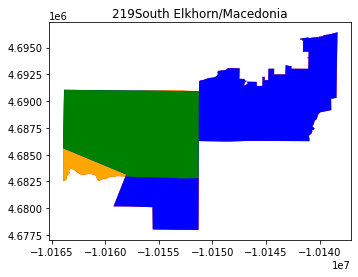

In [56]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"join_col"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [57]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(3180, 1)
106 precincts w/ a difference of 0 km^2
2675 precincts w/ a difference between 0 and .1 km^2
185 precincts w/ a difference between .1 and .5 km^2
67 precincts w/ a difference between .5 and 1 km^2
45 precincts w/ a difference between 1 and 2 km^2
40 precincts w/ a difference between 2 and 5 km^2
62 precincts w/ a difference greater than 5 km^2


In [58]:
print(no_county_source_names)

['007', '013', '025', '027', '029', '031', '039', '053', '071', '077', '095', '099', '105', '107', '109', '119', '127', '131', '147', '151', '153', '155', '163', '175', '186', '201', '215', '219', '221', '227', '229']


In [67]:
big_diff.reset_index(inplace=True,drop=False)

In [70]:
count = 0
for i in big_diff["index"].str[0:3]:
    if i in no_county_source_names:
        count+=1
print("Of the "+str(len(big_diff["index"]))+" shapefiles with a diff > 1km^2 " +str(count)+" of them are in the counties where we used a different source")


Of the 147 shapefiles with a diff > 1km^2 75 of them are in the counties where we used a different source
